In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to your CSV file
csv_file_path = r'C:\Users\John\Desktop\import\data_import\HYDRA\GITT\TE_0000003262.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Convert Time_h from hours to seconds if needed
df['Time_h'] = df['Time_h'] * 3600

# Find the total number of discharge cycles using the 'Line == 35' (discharge pulse event)
df_pulses = df[df['Line'] == 15]  # Assuming Line == 15 is the pulse event
cycles_dch = max(df_pulses['Cyc_Count'])

# Initialize lists to store pulse and cycle data
all_cycles_data = []

# Directory to save the extracted cycle data
save_dir = r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\pulses'

# Ensure the directory exists; if not, create it
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Confirm the directory exists
print(f"Directory exists: {os.path.exists(save_dir)}")

# Loop through all the discharge cycles
for i in range(1, cycles_dch):
    # Filter the data for the current cycle
    # The last point on the old cycle is the first point of the new cycle
    dfs_pulses = df_pulses[df_pulses['Cyc_Count'] == i]
    dfs_pulses = dfs_pulses.drop(dfs_pulses.index[-1])  # Drop the last point of the new cycle

    dfs_pulses_old = df_pulses[df_pulses['Cyc_Count'] == i-1]
    dfs_pulses = pd.concat([dfs_pulses_old.iloc[[-1]], dfs_pulses], ignore_index=False)  # Add the last point of the previous cycle

    # The time between two cycles is the relaxation time
    dfs_pulses_next = df_pulses[df_pulses['Cyc_Count'] == i+1]
    first_index = dfs_pulses.index[-1] + 1
    last_index = dfs_pulses_next.index[0] - 1
    dfs_relaxation = df.loc[first_index:last_index]

    # Concatenate the pulses and relaxation data
    dfs_plot = pd.concat([dfs_pulses, dfs_relaxation], ignore_index=False)

    # Voltage before pulse (Line == 34 for discharge)
    E0 = dfs_pulses.iloc[0]
    
    # Voltage at the end of the pause (Line == 44 for discharge)
    E4 = dfs_pulses.iloc[-1]
    
    # Pulse data (Line == 35 for discharge)
    E_pulse = dfs_pulses
    
    # Store the extracted data for this cycle
    cycle_data = {
        'Cycle': i,
        'Voltage_before_pulse': E0,
        'Voltage_after_pulse': E4,
        'Pulse_data': E_pulse
    }
    
    # Append to the list of cycles
    all_cycles_data.append(cycle_data)
    
    # Save each cycle's data as a CSV file
    cycle_file_name = f'cycle_{i}_discharge_data.csv'
    cycle_file_path = os.path.join(save_dir, cycle_file_name)

    # Save data and handle errors
    try:
        dfs_plot[['Time_h', 'U_V', 'I_A', 'Line', 'Cyc_Count']].to_csv(cycle_file_path, index=False)
        print(f'Successfully saved Discharge Cycle {i} data to: {cycle_file_path}')
    except Exception as e:
        print(f"Error saving Discharge Cycle {i} data: {e}")

    # Plot the 60th cycle for visualization
    if i == 60:
        fig, ax1 = plt.subplots()

        # Plot Voltage vs Time
        ax1.plot(dfs_plot['Time_h'], dfs_plot['U_V'], label="Voltage (U_V)")
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Voltage (V)', color='b')
        ax1.tick_params(axis='y', labelcolor='b')

        # Plot Current vs Time on secondary y-axis
        ax2 = ax1.twinx()
        ax2.plot(dfs_plot['Time_h'], dfs_plot['I_A'], 'r', label="Current (I_A)")
        ax2.set_ylabel('Current (A)', color='r')
        ax2.tick_params(axis='y', labelcolor='r')

        # Save the plot
        plot_save_path = r'E:\GITT\cycle_60_plot.png'
        plt.title('Voltage and Current vs Time (Cycle 60)')
        plt.tight_layout()
        try:
            plt.savefig(plot_save_path)
            print(f"Plot saved to: {plot_save_path}")
        except Exception as e:
            print(f"Error saving plot: {e}")

        # Show the plot
        plt.show()

# Output the extracted cycle data for the first discharge cycle
if all_cycles_data:
    print("\nData for the first discharge cycle:")
    print(all_cycles_data[0])

# Optional: Save all cycles' data into one consolidated CSV file
consolidated_file_path = os.path.join(save_dir, 'all_discharge_cycles_data.csv')
try:
    df.to_csv(consolidated_file_path, index=False)
    print(f'All discharge cycles data saved to: {consolidated_file_path}')
except Exception as e:
    print(f"Error saving consolidated data: {e}")



In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to your CSV file
#csv_file_path = r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\pulses\all_discharge_cycles_data.csv'
csv_file_path = r'C:\Users\John\Desktop\import\data_import\HYDRA\GITT\TE_0000003262.csv'


# Load the CSV file into a DataFrame
data = pd.read_csv(csv_file_path)

# Define the directory to save the plot
save_plot_dir = r'D:\DLR_Projects\test'

# Ensure the directory exists; if not, create it
if not os.path.exists(save_plot_dir):
    os.makedirs(save_plot_dir)

# Define the filename to save the plot
plot_filename = os.path.join(save_plot_dir, 'voltage_current_plot_cycle_60.png')

# Check if the required columns are present
if 'Time_h' in data.columns and 'U_V' in data.columns and 'I_A' in data.columns:
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot U_V vs Time_h on the primary y-axis
    ax1.plot(data['Time_h'], data['U_V'], label='Voltage (U_V)', color='b')
    ax1.set_xlabel('Time (hours)')
    ax1.set_ylabel('Voltage (V)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Add a grid and title
    plt.title('Voltage and Current vs Time')

    # Create a secondary y-axis to plot the current
    ax2 = ax1.twinx()
    ax2.plot(data['Time_h'], data['I_A'], label='Current (I_A)', color='r')
    ax2.set_ylabel('Current (A)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Show the legend and the plot
    fig.tight_layout()  # Adjust layout to prevent overlapping
    plt.grid(True)

    # Save the plot to the specified directory
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Plot saved to: {plot_filename}")

else:
    print("The required columns 'Time_h', 'U_V', or 'I_A' are not in the CSV file.")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\John\Desktop\import\data_import\HYDRA\GITT\all_discharge_cycles_sorted_with_scaled_SOC.csv')  # Replace with your actual file path
#data2 = pd.read_csv(r'C:\Users\John\Desktop\import\data_import\HYDRA\GITT\all_discharge_cycles_sorted_with_SOC.csv')  # Replace with your actual file path
data3 = pd.read_csv(r'C:\Users\John\Desktop\import\data_import\HYDRA\GITT\all_discharge_cycles_sorted2.csv')  # Replace with your actual file path

# Extract OCV and SOC data
OCV = data3['U_V'].values
SOC = data['SOC'].values

plt.figure(figsize=(10, 6))
plt.scatter(SOC, OCV, label='Adjusted SOC vs OCV', color='green')
plt.xlabel('Adjusted State of Charge (SOC)')
plt.ylabel('Open Circuit Voltage (U_V)')
plt.title('Adjusted SOC vs OCV')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

#code for combining all the pulses into a single dataset to allow computation of SOC (during charging)
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path to the original CSV
csv_file_path = r'C:\Users\John\Desktop\import\data_import\HYDRA\GITT\TE_0000003262.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Convert 'Time_h' from hours to seconds if needed
df['Time_h'] = df['Time_h']# * 3600

# Filter data to select only pulse events (assuming Line == 15 represents pulses)
df_pulses = df[df['Line'] == 15]

# Get the number of unique discharge cycles based on 'Cyc_Count'
cycles_dch = df_pulses['Cyc_Count'].nunique()

# Initialize an empty DataFrame to store consolidated data
all_pulses_data = pd.DataFrame()

# Loop through each discharge cycle and gather data
for i in range(1, cycles_dch + 1):
    # Extract data for the current cycle
    dfs_pulses = df_pulses[df_pulses['Cyc_Count'] == i]

    # Select only columns 'Time_h', 'U_V', and 'I_A'
    dfs_pulses = dfs_pulses[['Time_h', 'U_V', 'I_A']]

    # Add data from each cycle into the consolidated DataFrame
    all_pulses_data = pd.concat([all_pulses_data, dfs_pulses], ignore_index=True)

# Filter the consolidated data where 'I_A' (current) is negative and sort by 'Time_h' in ascending order
sorted_data = all_pulses_data[all_pulses_data['I_A'] < 0].sort_values(by='Time_h')

# Save the sorted data to a new CSV file
output_csv_path = r'C:\Users\John\Desktop\import\data_import\HYDRA\GITT\all_discharge_cycles_sorted2.csv'
sorted_data.to_csv(output_csv_path, index=False)
print(f"Consolidated and sorted data saved to {output_csv_path}")

# Plot Voltage (U_V) vs. Time (Time_h) for the sorted data
plt.figure(figsize=(10, 6))
plt.plot(sorted_data['Time_h'], sorted_data['U_V'], label="Voltage (U_V)", color='blue')#, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs. Time for Negative Current (I_A < 0) across All Cycles')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
#working on this 
import numpy as np
import pandas as pd
import pybop
import pybamm
import logging
from scipy.interpolate import interp1d
import sys
import os

import sys
import os
from pathlib import Path
#root_dir = Path(r'C:\Users\John\Desktop\import\Pybop')
root_dir = Path(r'C:\Users\John\Desktop\import\Pybop\pybop')
sys.path.insert(0, str(root_dir))



# import sys
# import os
# from pathlib import Path
# root_dir = Path(r'C:\Users\John\Desktop\import\Pybop\pybop')
# sys.path.insert(0, str(root_dir))

sys.path.append(r'C:\Users\John\Desktop\import\Pybop\pybop')
from models.lithium_ion.echem import DFN, SPM, SPMe, MPM, MSMR, WeppnerHuggins

#sys.path.append(r'C:\Users\John\Desktop\import\Pybop\pybob_downloaded\PyBOP-develop\pybop\models')
# from models.lithium_ion.echem import DFN, SPM, SPMe, MPM, MSMR


# Add the path to the parameter set to the system path
sys.path.append('C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')

# Import the parameter set
import Christina2023_2

# Assuming Christina2023 has a function named get_parameter_values that returns a dictionary
# parameter_values_dict = Christina2023_2.get_parameter_values()
# parameter_set = pybamm.ParameterValues(parameter_values_dict)
parameter_set = pybop.ParameterSet.pybamm("Chen2020")




# Load the parameter set
# Marquis2019
# Chen2020
data_path= r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\pulses\cycle_10_discharge_data.csv'

data = pd.read_csv(data_path)

# Extract necessary columns
time_data = data.iloc[:, 0].values  # Assuming the first column is Time^
time_data =time_data*3600
voltage_data = data.iloc[:, 2].values  # Assuming the third column is Voltage
current_data = data.iloc[:, 1].values  # Assuming the second column is Current

# If you need to invert the current data, uncomment the following line
current_data = current_data #* -1
#capacity_data = data.iloc[:, 3].values

dataset = pybop.Dataset(
    {
        "Time [s]": time_data,  # Convert to numpy array if not already
        "Current function [A]": current_data,
        "Voltage [V]": voltage_data,
    }
)

# Define model
# parameter_set = pybamm.ParameterValues(Christina2023_2.parameters)
# model = pybop.models.lithium_ion.SPM(
#     parameter_set=parameter_set
# )

model = DFN(
    parameter_set=parameter_set
)
# model = SPM(
#     parameter_set=parameter_set
# )
# Fitting parameters

parameters = [
    pybop.Parameter(
    "Negative particle diffusivity [m2.s-1]",
    prior=pybop.Gaussian(5e-14, 1e-13),
    bounds=[1e-16, 1e-11],
    ),
    pybop.Parameter(
        "Negative electrode active material volume fraction",
        prior=pybop.Gaussian(0.55, 0.05),  # Adjusted initial value
        bounds=[0.4, 0.6])
 ]

#"Negative electrode diffusivity [m2.s-1]": 3.3e-14,
problem = pybop.FittingProblem(model, parameters, dataset)
cost = pybop.SumSquaredError(problem)

#cost = pybop.SumSquaredError(problem)

#optim = pybop.Optimisation(cost, optimiser=pybop.SciPyDifferentialEvolution)
#optim = pybop.Optimisation(cost, optimiser=pybop.CMAES)
#optim = pybop.Optimisation(cost, optimiser=pybop.PSO) #much better
# optim = pybop.Optimisation(cost, optimiser=pybop.SNES) #much better
#optim = pybop.Optimisation(cost, optimiser=pybop.Adam)
# optim = pybop.Optimisation(cost=cost, optimiser=pybop.SciPyMinimize)
optim = pybop.Optimisation(cost, optimiser=pybop.XNES)
optim.set_max_iterations(500)
# Run the optimization
x, final_cost = optim.run()
pybop.quick_plot(problem, problem_inputs=x, title="Optimised Comparison")


In [ ]:
import numpy as np
import pandas as pd
import pybop
import pybamm
import logging
from scipy.interpolate import interp1d
import sys
import os

from pathlib import Path
root_dir = Path(r'C:\Users\John\Desktop\import\Pybop\pybop')
sys.path.insert(0, str(root_dir))

from models.lithium_ion.echem import DFN, SPM, SPMe, MPM, MSMR, WeppnerHuggins

# Define model
parameter_set = pybop.ParameterSet.pybamm("Xu2019")
#parameter_set = pybop.ParameterSet.pybamm("Chen2020")
# Form dataset
data_path= r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\pulses\cycle_10_discharge_data.csv'

data = pd.read_csv(data_path)
data =data[6:-50]
# Extract necessary columns
time_data = data.iloc[:, 0].values  # Assuming the first column is Time
time_data = time_data * 3600
voltage_data = data.iloc[:, 1].values  # Assuming the second column is Voltage
current_data = data.iloc[:, 2].values  # Assuming the fourth column is Current
current_data = current_data*-1
# Form dataset
dataset = pybop.Dataset(
    {
        "Time [s]": time_data,
        "Current function [A]": current_data,
        "Voltage [V]": voltage_data,
    }
)

# Define parameter set
parameter_set.update(
    {
        "Reference OCP [V]": 0.086,
        "Derivative of the OCP wrt stoichiometry [V]": -1.38636,
    },
    check_already_exists=False,
)

parameters = pybop.Parameter(
    "Negative particle diffusivity [m2.s-1]",
    prior=pybop.Gaussian(5e-14, 1e-13),
    bounds=[1e-16, 1e-11],
    true_value=parameter_set["Negative particle diffusivity [m2.s-1]"],
)



# Define the WeppnerHuggins model
model = pybop.lithium_ion.WeppnerHuggins(parameter_set=parameter_set)
# model = pybop.lithium_ion.DFN(parameter_set=parameter_set)
# Retrieve and print all parameters used by the WeppnerHuggins model
#print("Parameters used by the WeppnerHuggins model:")
#for param, value in parameter_set.items():
#    print(f"{param}: {value}")

# Define the parameter to optimize
parameters = pybop.Parameter(
    "Negative particle diffusivity [m2.s-1]",
    prior=pybop.Gaussian(5e-14, 1e-13),
    bounds=[1e-16, 1e-11],
    true_value=parameter_set["Negative particle diffusivity [m2.s-1]"],
)

problem = pybop.FittingProblem(
    model,
    parameters,
    dataset,
    signal=["Voltage [V]"],
)

cost = pybop.RootMeanSquaredError(problem)

# Build the optimisation problem
optim = pybop.PSO(cost=cost, verbose=True)
optim.set_max_iterations(50)
# Run the optimisation problem
x, final_cost = optim.run()
#print("Estimated parameters:", x)

# Plot the timeseries output
pybop.quick_plot(problem, problem_inputs=x, title="Optimised Comparison")

In [ ]:
#working on this 
import numpy as np
import pandas as pd
import pybop
import pybamm
import logging
from scipy.interpolate import interp1d
import sys
import os

import sys
import os
from pathlib import Path
#root_dir = Path(r'C:\Users\John\Desktop\import\Pybop')
root_dir = Path(r'C:\Users\John\Desktop\import\Pybop\pybop')
sys.path.insert(0, str(root_dir))



# import sys
# import os
# from pathlib import Path
# root_dir = Path(r'C:\Users\John\Desktop\import\Pybop\pybop')
# sys.path.insert(0, str(root_dir))

sys.path.append(r'C:\Users\John\Desktop\import\Pybop\pybop')
from models.lithium_ion.echem import DFN, SPM, SPMe, MPM, MSMR, WeppnerHuggins

#sys.path.append(r'C:\Users\John\Desktop\import\Pybop\pybob_downloaded\PyBOP-develop\pybop\models')
# from models.lithium_ion.echem import DFN, SPM, SPMe, MPM, MSMR

# Add the path to the parameter set to the system path
sys.path.append('C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')

# Import the parameter set
import Christina2023_2

# Assuming Christina2023 has a function named get_parameter_values that returns a dictionary
# parameter_values_dict = Christina2023_2.get_parameter_values()
# parameter_set = pybamm.ParameterValues(parameter_values_dict)
parameter_set = pybop.ParameterSet.pybamm("Chen2020")

# Load the parameter set
# Marquis2019
# Chen2020
data_path= r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\pulses\cycle_10_discharge_data.csv'

data = pd.read_csv(data_path)

# Extract necessary columns
time_data = data.iloc[:, 0].values  # Assuming the first column is Time^
time_data =time_data*3600
voltage_data = data.iloc[:, 2].values  # Assuming the third column is Voltage
current_data = data.iloc[:, 1].values  # Assuming the second column is Current

# If you need to invert the current data, uncomment the following line
current_data = current_data #* -1
#capacity_data = data.iloc[:, 3].values

dataset = pybop.Dataset(
    {
        "Time [s]": time_data,  # Convert to numpy array if not already
        "Current function [A]": current_data,
        "Voltage [V]": voltage_data,
    }
)

# Define model
# parameter_set = pybamm.ParameterValues(Christina2023_2.parameters)
# model = pybop.models.lithium_ion.SPM(
#     parameter_set=parameter_set
# )

# model = DFN(
#     parameter_set=parameter_set
# )
model = SPM(
    parameter_set=parameter_set
)
# Fitting parameters

parameters = [
    pybop.Parameter(
    "Negative particle diffusivity [m2.s-1]",
    prior=pybop.Gaussian(5e-14, 1e-13),
    bounds=[1e-16, 1e-11],
    ),
    pybop.Parameter(
        "Negative electrode active material volume fraction",
        prior=pybop.Gaussian(0.55, 0.05),  # Adjusted initial value
        bounds=[0.4, 0.6]),
    pybop.Parameter(
        "Negative particle radius [m]",
        prior=pybop.Gaussian(7.3e-06, 1e-06),
        bounds=[1e-07, 1e-05],  # Adjusted upper bound
    )
 ]

#"Negative electrode diffusivity [m2.s-1]": 3.3e-14,
problem = pybop.FittingProblem(model, parameters, dataset)
cost = pybop.SumSquaredError(problem)

#cost = pybop.SumSquaredError(problem)

# optim = pybop.Optimisation(cost, optimiser=pybop.SciPyDifferentialEvolution)
#optim = pybop.Optimisation(cost, optimiser=pybop.CMAES)
#optim = pybop.Optimisation(cost, optimiser=pybop.PSO) #much better
# optim = pybop.Optimisation(cost, optimiser=pybop.SNES) #much better
#optim = pybop.Optimisation(cost, optimiser=pybop.Adam)
# optim = pybop.Optimisation(cost=cost, optimiser=pybop.SciPyMinimize)
optim = pybop.Optimisation(cost, optimiser=pybop.XNES)
# optim.set_max_iterations(500)
# Run the optimization
x, final_cost = optim.run()
pybop.quick_plot(problem, problem_inputs=x, title="Optimised Comparison")


In [ ]:
import numpy as np
import plotly.graph_objects as go
import pybamm
import pandas as pd
import pybop
np.random.seed(8)

parameter_set = pybop.ParameterSet.pybamm("Chen2020")
parameter_set = pybamm.get_size_distribution_parameters(parameter_set)
# synth_model = pybop.lithium_ion.DFN(
#     parameter_set=parameter_set, options={"particle size": "distribution"}
# )



data_path= r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\pulses\cycle_15_discharge_data.csv'

data = pd.read_csv(data_path)

# Extract necessary columns
time_data = data.iloc[:, 0].values  # Assuming the first column is Time^
time_data =time_data*3600
voltage_data = data.iloc[:, 1].values  # Assuming the third column is Voltage
current_data = data.iloc[:, 2].values  # Assuming the second column is Current
voltage_data =voltage_data
# If you need to invert the current data, uncomment the following line
current_data = current_data* -1
#capacity_data = data.iloc[:, 3].values

dataset = pybop.Dataset(
    {
        "Time [s]": time_data,  # Convert to numpy array if not already
        "Current function [A]": current_data,
        "Voltage [V]": voltage_data,
    }
)
go.Figure(
    data=go.Scatter(x=time_data, y=voltage_data, mode="lines"),
    layout=go.Layout(title="voltage_data"),
)


In [ ]:
parameters = pybop.Parameters(
    pybop.Parameter(
        "Positive electrode thickness [m]",
        prior=pybop.Gaussian(7.56e-05, 0.05e-05),
        bounds=[65e-06, 85e-06],
        true_value=parameter_set["Positive electrode thickness [m]"],
    ),
    pybop.Parameter(
        "Negative electrode thickness [m]",
        prior=pybop.Gaussian(8.52e-05, 0.05e-05),
        bounds=[75e-06, 95e-06],
        true_value=parameter_set["Negative electrode thickness [m]"],
    ),
)

models = [
    pybop.lithium_ion.SPMe(parameter_set=parameter_set),
 
]
 #  pybop.lithium_ion.SPMe(parameter_set=parameter_set),
optims = []
xs = []
initial_state = {"Initial SoC": 0.1}
for model in models:
    print(f"Running {model.name}")
    model.set_initial_state(initial_state)
    problem = pybop.FittingProblem(model, parameters, dataset)
    cost = pybop.SumSquaredError(problem)
    optim = pybop.XNES(
        cost, verbose=True, max_iterations=60, max_unchanged_iterations=15
    )
    x, final_cost = optim.run()
    optims.append(optim)
    xs.append(x)

for optim, x in zip(optims, xs):
    print(f"| Model: {optim.cost.problem.model.name} | Results: {x} |")
for optim, x in zip(optims, xs):
    pybop.quick_plot(
        optim.cost.problem, problem_inputs=x, title=optim.cost.problem.model.name
    )

In [ ]:
import pybamm
import pybop

parameters = pybop.Parameters(
    pybop.Parameter(
        "Positive electrode thickness [m]",
        prior=pybop.Gaussian(7.56e-05, 0.05e-05),
        bounds=[65e-06, 85e-06],
        true_value=parameter_set["Positive electrode thickness [m]"],
    ),
    pybop.Parameter(
        "Negative electrode thickness [m]",
        prior=pybop.Gaussian(8.52e-05, 0.05e-05),
        bounds=[75e-06, 95e-06],
        true_value=parameter_set["Negative electrode thickness [m]"],
    ),
)

# Define the models to run
models = [
    pybop.lithium_ion.DFN(parameter_set=parameter_set),
    # You can also add other models, like SPMe, here if needed.
]

optims = []
xs = []

initial_state = {"Initial SoC": 0.5}

for model in models:
    print(f"Running {model.name}")
    
    # Set the initial state of charge
    model.set_initial_state(initial_state)
    
    # Create the fitting problem with the model and parameters
    problem = pybop.FittingProblem(model, parameters, dataset)
    cost = pybop.SumSquaredError(problem)
    
    # Setup the optimizer
    optim = pybop.XNES(
        cost, verbose=True, max_iterations=60, max_unchanged_iterations=15
    )
    
    # Adjust the solver settings for better convergence
    solver = pybamm.CasadiSolver(atol=1e-6, rtol=1e-4, dt_max=5, mode="safe")
    model.solver = solver  # Assign the solver to the model
    
    # Run the optimization
    x, final_cost = optim.run()
    
    # Store results
    optims.append(optim)
    xs.append(x)

# Print results for each optimization
for optim, x in zip(optims, xs):
    print(f"| Model: {optim.cost.problem.model.name} | Results: {x} |")

# Plot the results for each model
for optim, x in zip(optims, xs):
    pybop.quick_plot(
        optim.cost.problem, problem_inputs=x, title=optim.cost.problem.model.name
    )


In [ ]:
import numpy as np
import plotly.graph_objects as go
import pybamm

import pybop

parameter_set = pybop.ParameterSet.pybamm("Chen2020")
parameter_set = pybamm.get_size_distribution_parameters(parameter_set)
synth_model = pybop.lithium_ion.DFN(
    parameter_set=parameter_set, options={"particle size": "distribution"}
)
parameter_set["Lower voltage cut-off [V]"] = 0.08  # Set lower voltage cut-off
parameter_set["Upper voltage cut-off [V]"] = 1.   # Set upper voltage cut-off
n_points = 450
t_eval = np.linspace(0, 1600 + 1000, n_points)
current = np.concatenate(
    [np.ones(200) * parameter_set["Nominal cell capacity [A.h]"], np.zeros(250)]
)
initial_state = {"Initial SoC": 0.7}

dataset = pybop.Dataset(
    {
        "Time [s]": t_eval,
        "Current function [A]": current,
    }
)
synth_model.build(dataset=dataset, initial_state=initial_state)
synth_model.signal = ["Voltage [V]"]
values = synth_model.simulate(t_eval=t_eval, inputs={})

sigma = 0.001
corrupt_values = values["Voltage [V]"].data + np.random.normal(
    0, sigma, len(values["Voltage [V]"].data)
)
go.Figure(
    data=go.Scatter(x=t_eval, y=corrupt_values, mode="lines"),
    layout=go.Layout(title="Corrupted Voltage", width=800, height=600),
)

In [ ]:
dataset = pybop.Dataset(
    {
        "Time [s]": t_eval,
        "Current function [A]": current,
        "Voltage [V]": corrupt_values,
    }
)
parameters = pybop.Parameters(
    pybop.Parameter(
        "Positive electrode thickness [m]",
        prior=pybop.Gaussian(7.56e-05, 0.05e-05),
        bounds=[65e-06, 85e-06],
        true_value=parameter_set["Positive electrode thickness [m]"],
    ),
    pybop.Parameter(
        "Negative electrode thickness [m]",
        prior=pybop.Gaussian(8.52e-05, 0.05e-05),
        bounds=[75e-06, 95e-06],
        true_value=parameter_set["Negative electrode thickness [m]"],
    ),
)

models = [
    pybop.lithium_ion.SPM(parameter_set=parameter_set),
    pybop.lithium_ion.SPMe(parameter_set=parameter_set),
]

optims = []
xs = []
for model in models:
    print(f"Running {model.name}")
    model.set_initial_state(initial_state)
    problem = pybop.FittingProblem(model, parameters, dataset)
    cost = pybop.SumSquaredError(problem)
    optim = pybop.XNES(
        cost, verbose=True, max_iterations=60, max_unchanged_iterations=15
    )
    x, final_cost = optim.run()
    optims.append(optim)
    xs.append(x)

for optim, x in zip(optims, xs):
    print(f"| Model: {optim.cost.problem.model.name} | Results: {x} |")

for optim, x in zip(optims, xs):
    pybop.quick_plot(
        optim.cost.problem, problem_inputs=x, title=optim.cost.problem.model.name
    )

In [ ]:
import numpy as np
import pybamm
import pybop
import matplotlib.pyplot as plt

# Load and adjust the parameter set
parameter_set = pybop.ParameterSet.pybamm("Chen2020")
parameter_set = pybamm.get_size_distribution_parameters(parameter_set)

# Set the desired voltage cut-off parameters
parameter_set["Lower voltage cut-off [V]"] = 2.5
parameter_set["Upper voltage cut-off [V]"] = 4.2


# Define the model
synth_model = pybop.lithium_ion.DFN(
    parameter_set=parameter_set, options={"particle size": "distribution"}
)

# Define the time vector
current_duration = 3600  # Discharge duration in seconds (e.g., 2 hours)
rest_duration = 1000     # Rest duration in seconds

t_discharge = np.linspace(0, current_duration, num=400)
t_rest = np.linspace(current_duration, current_duration + rest_duration, num=250)
t_eval = np.concatenate((t_discharge, t_rest))

# Define the current profile
nominal_capacity = parameter_set["Nominal cell capacity [A.h]"]  # in A·h
discharge_current = -nominal_capacity  # Negative sign indicates discharge in A

current_discharge = np.ones_like(t_discharge) * discharge_current
current_rest = np.zeros_like(t_rest)
current = np.concatenate((current_discharge, current_rest))

# Set the initial state of charge
initial_state = {"Initial SoC": 1.0}  # Start at 100% SoC

# Create the dataset
dataset = pybop.Dataset(
    {
        "Time [s]": t_eval,
        "Current function [A]": current,
    }
)

# Build and simulate the model
synth_model.build(dataset=dataset, initial_state=initial_state)
synth_model.signal = ["Voltage [V]"]
values = synth_model.simulate(t_eval=t_eval, inputs={})

# Optionally, add noise to the voltage data
sigma = 0.001  # Standard deviation of noise
corrupt_values = values["Voltage [V]"].data + np.random.normal(
    0, sigma, len(values["Voltage [V]"].data)
)

# Plot the simulated voltage profile
plt.figure(figsize=(10, 6))
plt.plot(t_eval, values["Voltage [V]"].data, label='Simulated Voltage')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Cell Voltage vs. Time')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import pybamm

import pybop

# Load the parameters
parameter_set = pybop.ParameterSet.pybamm("ECM_Example")
parameter_set.update(
    {
        "Cell capacity [A.h]": 3,
        "Nominal cell capacity [A.h]": 3,
        "Element-1 initial overpotential [V]": 0,
        "Upper voltage cut-off [V]": 4.2,
        "Lower voltage cut-off [V]": 2.5,
        "R0 [Ohm]": 1e-3,
        "R1 [Ohm]": 3e-3,
        "C1 [F]": 5e2,
        "Open-circuit voltage [V]": pybop.empirical.Thevenin().default_parameter_values[
            "Open-circuit voltage [V]"
        ],
    }
)
# Optional arguments - only needed for two RC pairs
parameter_set.update(
    {
        "R2 [Ohm]": 2e-3,
        "C2 [F]": 3e4,
        "Element-2 initial overpotential [V]": 0,
    },
    check_already_exists=False,
)

model = pybop.empirical.Thevenin(
    parameter_set=parameter_set,
    options={"number of rc elements": 2},
    solver=pybamm.CasadiSolver(mode="safe", dt_max=40),
)

file_loc = r"C:\Users\John\Desktop\import\Pybop\examples\data\Samsung_INR21700\multipulse_hppc.xlsx"
df = pd.read_excel(file_loc, index_col=None, na_values=["NA"])
df = df.drop_duplicates(subset=["Time"], keep="first")

dataset = pybop.Dataset(
    {
        "Time [s]": df["Time"].to_numpy(),
        "Current function [A]": df["Current"].to_numpy(),
        "Voltage [V]": df["Voltage"].to_numpy(),
    }
)
r0_guess = 0.005
parameters = pybop.Parameters(
    pybop.Parameter(
        "R0 [Ohm]",
        prior=pybop.Gaussian(r0_guess, r0_guess / 10),
        bounds=[0, 0.1],
    ),
    pybop.Parameter(
        "R1 [Ohm]",
        prior=pybop.Gaussian(r0_guess, r0_guess / 10),
        bounds=[0, 0.1],
    ),
    pybop.Parameter(
        "R2 [Ohm]",
        prior=pybop.Gaussian(r0_guess, r0_guess / 10),
        bounds=[0, 0.1],
    ),
    pybop.Parameter(
        "C1 [F]",
        prior=pybop.Gaussian(500, 100),
        bounds=[100, 1000],
    ),
    pybop.Parameter(
        "C2 [F]",
        prior=pybop.Gaussian(2000, 500),
        bounds=[1000, 10000],
    ),
)

# To see current vs time profile.
fig1 = go.Figure()
# Add a line trace for current vs. time
fig1.add_trace(
    go.Scatter(
        x=df["Time"].to_numpy(),
        y=df["Current"].to_numpy(),
        mode="lines",  # 'lines', 'markers', or 'lines+markers'
        name="Current vs Time",
    )
)

# Customize layout
fig1.update_layout(
    title="Current vs Time",
    xaxis_title="Time (s)",
    yaxis_title="Current (A)",
    template="plotly",  # Use a Plotly template (optional)
)

# Show the plot
fig1.show()

In [ ]:
# To see voltage vs time profile.
fig2 = go.Figure()
# Add a line trace for current vs. time
fig2.add_trace(
    go.Scatter(
        x=df["Time"].to_numpy(),
        y=df["Voltage"].to_numpy(),
        mode="lines",  # 'lines', 'markers', or 'lines+markers'
        name="Voltage vs Time",
    )
)

# Customize layout
fig2.update_layout(
    title="Voltage vs Time",
    xaxis_title="Time (s)",
    yaxis_title="Voltage (V)",
    template="plotly",  # Use a Plotly template (optional)
)

# Show the plot
fig2.show()

In [ ]:
model.build(
    initial_state={"Initial open-circuit voltage [V]": df["Voltage"].to_numpy()[0]}
)
problem = pybop.FittingProblem(
    model,
    parameters,
    dataset,
)

cost = pybop.SumSquaredError(problem)
optim = pybop.XNES(
    cost,
    sigma0=[1e-3, 1e-3, 1e-3, 10, 10],
    max_unchanged_iterations=20,
    max_iterations=100,
)
x, final_cost = optim.run()
print("Initial parameters:", optim.x0)
print("Estimated parameters:", x)

pybop.quick_plot(problem, problem_inputs=x, title="Optimised Comparison")

In [ ]:
import pandas as pd
import pybamm

import pybop

pybop.PlotlyManager().pio.renderers.default = "notebook_connected"

parameter_set = pybop.ParameterSet.pybamm("ECM_Example")
parameter_set.update(
    {
        "Cell capacity [A.h]": 3,
        "Nominal cell capacity [A.h]": 3,
        "Element-1 initial overpotential [V]": 0,
        "Upper voltage cut-off [V]": 2.2,
        "Lower voltage cut-off [V]": 1,
        "R0 [Ohm]": 1e-3,
        "R1 [Ohm]": 3e-3,
        "C1 [F]": 5e2,
        "Open-circuit voltage [V]": pybop.empirical.Thevenin().default_parameter_values[
            "Open-circuit voltage [V]"
        ],
    }
)
# Optional arguments - only needed for two RC pairs
parameter_set.update(
    {
        "R2 [Ohm]": 0.002,
        "C2 [F]": 3e4,
        "Element-2 initial overpotential [V]": 0,
    },
    check_already_exists=False,
)
model = pybop.empirical.Thevenin(
    parameter_set=parameter_set,
    options={"number of rc elements": 2},
    solver=pybamm.CasadiSolver(mode="safe", dt_max=10),
)

# file_loc = r"C:\Users\John\Desktop\import\Pybop\examples\data\Samsung_INR21700\sample_hppc_pulse.xlsx"
# df = pd.read_excel(file_loc, index_col=None, na_values=["NA"])
# df = df.drop_duplicates(subset=["Time"], keep="first")

# dataset = pybop.Dataset(
#     {
#         "Time [s]": df["Time"].to_numpy(),
#         "Current function [A]": df["Current"].to_numpy(),
#         "Voltage [V]": df["Voltage"].to_numpy(),
#     }
# )


data_path= r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\pulses\cycle_15_discharge_data.csv'

data = pd.read_csv(data_path)

# Extract necessary columns
time_data = data.iloc[:, 0].values  # Assuming the first column is Time^
time_data =time_data*3600
voltage_data = data.iloc[:, 1].values  # Assuming the third column is Voltage
current_data = data.iloc[:, 2].values  # Assuming the second column is Current
voltage_data =voltage_data
# If you need to invert the current data, uncomment the following line
current_data = current_data#* -1
#capacity_data = data.iloc[:, 3].values

dataset = pybop.Dataset(
    {
        "Time [s]": time_data,  # Convert to numpy array if not already
        "Current function [A]": current_data,
        "Voltage [V]": voltage_data,
    }
)

r_guess = 0.005
parameters = pybop.Parameters(
    pybop.Parameter(
        "R0 [Ohm]",
        prior=pybop.Gaussian(r_guess, r_guess / 10),
        bounds=[0, 0.2],
    ),
    pybop.Parameter(
        "R1 [Ohm]",
        prior=pybop.Gaussian(r_guess, r_guess / 10),
        bounds=[0, 0.2],
    ),
    pybop.Parameter(
        "R2 [Ohm]",
        prior=pybop.Gaussian(r_guess, r_guess / 10),
        bounds=[0, 0.2],
    ),
    pybop.Parameter(
        "C1 [F]",
        prior=pybop.Gaussian(500, 100),
        bounds=[100, 10000],
    ),
    pybop.Parameter(
        "C2 [F]",
        prior=pybop.Gaussian(2000, 500),
        bounds=[100, 10000],
    ),
)



model.build(
    initial_state={"Initial open-circuit voltage [V]": data["Voltage"].to_numpy()[0]}
)
problem = pybop.FittingProblem(
    model,
    parameters,
    dataset,
)

cost = pybop.SumSquaredError(problem)
optim = pybop.XNES(
    cost,
    sigma0=[1e-3, 1e-3, 1e-3, 20, 20],
    max_unchanged_iterations=30,
    max_iterations=100,
)
x, final_cost = optim.run()
print("Initial parameters:", optim.x0)
print("Estimated parameters:", x)
pybop.quick_plot(problem, problem_inputs=x, title="Optimised Comparison")


In [ ]:
import numpy as np
import pandas as pd
import pybop

# Import the ECM parameter set from JSON
# parameter_set = pybop.ParameterSet(
#     json_path="examples/scripts/parameters/initial_ecm_parameters.json"
# )
# parameter_set.import_parameters()

# Alternatively, define the initial parameter set with a dictionary
# Add definitions for R's, C's, and initial overpotentials for any additional RC elements
parameter_set = pybop.ParameterSet(
    params_dict={
        "chemistry": "ecm",
        "Initial SoC": 0.5,
        "Initial temperature [K]": 25 + 273.15,
        "Cell capacity [A.h]": 5,
        "Nominal cell capacity [A.h]": 5,
        "Ambient temperature [K]": 25 + 273.15,
        "Current function [A]": 5,
        "Upper voltage cut-off [V]": 1.2,
        "Lower voltage cut-off [V]": 0.08,
        "Cell thermal mass [J/K]": 1000,
        "Cell-jig heat transfer coefficient [W/K]": 10,
        "Jig thermal mass [J/K]": 500,
        "Jig-air heat transfer coefficient [W/K]": 10,
        "Open-circuit voltage [V]": pybop.empirical.Thevenin().default_parameter_values[
            "Open-circuit voltage [V]"
        ],
        "R0 [Ohm]": 0.001,
        "Element-1 initial overpotential [V]": 0,
        "Element-2 initial overpotential [V]": 0,
        "R1 [Ohm]": 0.0002,
        "R2 [Ohm]": 0.0003,
        "C1 [F]": 10000,
        "C2 [F]": 5000,
        "Entropic change [V/K]": 0.0004,
    }
)

# Define the model
model = pybop.empirical.Thevenin(
    parameter_set=parameter_set, options={"number of rc elements": 2}
)

# Fitting parameters
parameters = pybop.Parameters(
    pybop.Parameter(
        "R0 [Ohm]",
        prior=pybop.Gaussian(0.0002, 0.0001),
        bounds=[1e-4, 1e-2],
    ),
    pybop.Parameter(
        "R1 [Ohm]",
        prior=pybop.Gaussian(0.0001, 0.0001),
        bounds=[1e-5, 1e-2],
    ),
)

# sigma = 0.001
# t_eval = np.arange(0, 900, 3)
# values = model.predict(t_eval=t_eval)
# corrupt_values = values["Voltage [V]"].data + np.random.normal(0, sigma, len(t_eval))

# # Form dataset
# dataset = pybop.Dataset(
#     {
#         "Time [s]": t_eval,
#         "Current function [A]": values["Current [A]"].data,
#         "Voltage [V]": corrupt_values,
#     }
# )



data_path= r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\pulses\cycle_15_discharge_data.csv'

data = pd.read_csv(data_path)

# Extract necessary columns
time_data = data.iloc[:, 0].values  # Assuming the first column is Time^
time_data =time_data*3600
voltage_data = data.iloc[:, 1].values  # Assuming the third column is Voltage
current_data = data.iloc[:, 2].values  # Assuming the second column is Current
voltage_data =voltage_data
# If you need to invert the current data, uncomment the following line
current_data = current_data* -1
#capacity_data = data.iloc[:, 3].values

dataset = pybop.Dataset(
    {
        "Time [s]": time_data,  # Convert to numpy array if not already
        "Current function [A]": current_data,
        "Voltage [V]": voltage_data,
    }
)

# Generate problem, cost function, and optimisation class
problem = pybop.FittingProblem(model, parameters, dataset)
cost = pybop.SumSquaredError(problem)
optim = pybop.CMAES(cost, max_iterations=100)

x, final_cost = optim.run()
print("Estimated parameters:", x)

# Export the parameters to JSON
# parameter_set.export_parameters(
#     r"C:\Users\John\Desktop\import\Pybop\examples\scripts\parameters\initial_ecm_parameters.json", fit_params=parameters
# )

# Plot the time series
#pybop.plot_dataset(dataset)

# Plot the timeseries output
pybop.quick_plot(problem, problem_inputs=x, title="Optimised Comparison")

# Plot convergence
#pybop.plot_convergence(optim)

# Plot the parameter traces
pybop.plot_parameters(optim)

# Plot the cost landscape
#pybop.plot2d(cost, steps=15)

# Plot the cost landscape with optimisation path and updated bounds
bounds = np.asarray([[1e-4, 1e-2], [1e-5, 1e-2]])
pybop.plot2d(optim, bounds=bounds, steps=15)


In [ ]:
parameter_set = pybop.ParameterSet.pybamm("ECM_Example")
print(parameter_set)


In [ ]:
parameter_set

In [ ]:
import numpy as np

import pybop

# Define model
parameter_set = pybop.ParameterSet.pybamm("Xu2019")
# parameter_set = pybop.ParameterSet.pybamm("Chen2020")
model = pybop.lithium_ion.SPM(
    parameter_set=parameter_set, options={"working electrode": "positive"}
)

# Generate data
sigma = 0.005
t_eval = np.arange(0, 150, 2)
values = model.predict(t_eval=t_eval)
corrupt_values = values["Voltage [V]"].data + np.random.normal(0, sigma, len(t_eval))

# Form dataset
dataset = pybop.Dataset(
    {
        "Time [s]": t_eval,
        "Current function [A]": values["Current [A]"].data,
        "Voltage [V]": corrupt_values,
    }
)

# Define parameter set
parameter_set.update(
    {
        "Reference OCP [V]": 4.1821,
        "Derivative of the OCP wrt stoichiometry [V]": -1.38636,
    },
    check_already_exists=False,
)

# Define the cost to optimise
#model = pybop.lithium_ion.WeppnerHuggins(parameter_set=parameter_set)
model = pybop.lithium_ion.DFN(parameter_set=parameter_set)
parameters = pybop.Parameter(
    "Positive particle diffusivity [m2.s-1]",
    prior=pybop.Gaussian(5e-14, 1e-13),
    bounds=[1e-16, 1e-11],
    true_value=parameter_set["Positive particle diffusivity [m2.s-1]"],
)

problem = pybop.FittingProblem(
    model,
    parameters,
    dataset,
    signal=["Voltage [V]"],
)

cost = pybop.RootMeanSquaredError(problem)

# Build the optimisation problem
optim = pybop.PSO(cost=cost, verbose=True)

# Run the optimisation problem
x, final_cost = optim.run()
print("Estimated parameters:", x)

# Plot the timeseries output
pybop.quick_plot(problem, problem_inputs=x, title="Optimised Comparison")

# Plot convergence
pybop.plot_convergence(optim)

# Plot the parameter traces
pybop.plot_parameters(optim)

In [ ]:
import numpy as np
import plotly.graph_objects as go
import pybamm

import pybop

# model = pybamm.lithium_ion.DFN({"working electrode": "negative"})
# param_nmc = pybamm.ParameterValues("Xu2019")

parameter_set = pybop.ParameterSet.pybamm("Chen2020")
parameter_set = pybamm.get_size_distribution_parameters(parameter_set)

synth_model = pybop.lithium_ion.DFN(
    parameter_set=parameter_set, options={"particle size": "distribution"}
)
n_points = 450
t_eval = np.linspace(0, 1600 + 1000, n_points)
current = np.concatenate(
    [np.ones(200) * parameter_set["Nominal cell capacity [A.h]"], np.zeros(250)]
)
initial_state = {"Initial SoC": 0.5}

dataset = pybop.Dataset(
    {
        "Time [s]": t_eval,
        "Current function [A]": current,
    }
)
synth_model.build(dataset=dataset, initial_state=initial_state)
synth_model.signal = ["Voltage [V]"]
values = synth_model.simulate(t_eval=t_eval, inputs={})

sigma = 0.001
corrupt_values = values["Voltage [V]"].data + np.random.normal(
    0, sigma, len(values["Voltage [V]"].data)
)
go.Figure(
    data=go.Scatter(x=t_eval, y=corrupt_values, mode="lines"),
    layout=go.Layout(title="Corrupted Voltage", width=800, height=600),
)
dataset = pybop.Dataset(
    {
        "Time [s]": t_eval,
        "Current function [A]": current,
        "Voltage [V]": corrupt_values,
    }
)
parameters = pybop.Parameters(
    pybop.Parameter(
        "Positive electrode thickness [m]",
        prior=pybop.Gaussian(7.56e-05, 0.05e-05),
        bounds=[65e-06, 85e-06],
        true_value=parameter_set["Positive electrode thickness [m]"],
    ),
    pybop.Parameter(
        "Negative electrode thickness [m]",
        prior=pybop.Gaussian(8.52e-05, 0.05e-05),
        bounds=[75e-06, 95e-06],
        true_value=parameter_set["Negative electrode thickness [m]"],
    ),
)




models =pybop.lithium_ion.SPM(parameter_set=parameter_set)
# optims = []
# xs = []
# for model in models:
#     print(f"Running {model.name}")
#     model.set_initial_state(initial_state)
#     problem = pybop.FittingProblem(model, parameters, dataset)
#     cost = pybop.SumSquaredError(problem)
#     optim = pybop.XNES(
#         cost, verbose=True, max_iterations=60, max_unchanged_iterations=15
#     )
#     x, final_cost = optim.run()
#     optims.append(optim)
#     xs.append(x)

# for optim, x in zip(optims, xs):
#     print(f"| Model: {optim.cost.problem.model.name} | Results: {x} |")

# for optim, x in zip(optims, xs):
#     pybop.quick_plot(
#         optim.cost.problem, problem_inputs=x, title=optim.cost.problem.model.name
#     )
#model.set_initial_state(initial_state)
problem = pybop.FittingProblem(model, parameters, dataset)
cost = pybop.SumSquaredError(problem)
optim = pybop.XNES(
    cost, verbose=True, max_iterations=60, max_unchanged_iterations=15
)
x, final_cost = optim.run()

# Print results
print(f"| Model: {optim.cost.problem.model.name} | Results: {x} |")

# Plot the optimized results
pybop.quick_plot(
    optim.cost.problem, problem_inputs=x, title=optim.cost.problem.model.name
)


In [ ]:
import numpy as np
import plotly.graph_objects as go
import pybamm
import pybop

# Define parameter set
parameter_set = pybop.ParameterSet.pybamm("Chen2020")
parameter_set = pybamm.get_size_distribution_parameters(parameter_set)

# Define the model with "positive" as the working electrode
synth_model = pybop.lithium_ion.SPM(
    parameter_set=parameter_set , options={"working electrode": "positive"}
)

# Define time evaluation and current
n_points = 450
t_eval = np.linspace(0, 1600 + 1000, n_points)
current = np.concatenate(
    [np.ones(200) * parameter_set["Nominal cell capacity [A.h]"], np.zeros(250)]
)

# Initial state of charge
initial_state = {"Initial SoC": 0.5}

# Define dataset for simulation
dataset = pybop.Dataset(
    {
        "Time [s]": t_eval,
        "Current function [A]": current,
    }
)

#Build the model and run simulation
synth_model.build(dataset=dataset, initial_state=initial_state)
synth_model.signal = ["Voltage [V]"]
values = synth_model.simulate(t_eval=t_eval, inputs={})

# Add noise to the voltage values
sigma = 0.001
corrupt_values = values["Voltage [V]"].data + np.random.normal(
    0, sigma, len(values["Voltage [V]"].data)
)

# Plot the corrupted voltage
go.Figure(
    data=go.Scatter(x=t_eval, y=corrupt_values, mode="lines"),
    layout=go.Layout(title="Corrupted Voltage", width=800, height=600),
)

# Define the corrupted dataset
dataset = pybop.Dataset(
    {
        "Time [s]": t_eval,
        "Current function [A]": current,
        "Voltage [V]": corrupt_values,
    }
)

# Define fitting parameters
parameters = pybop.Parameters(
    pybop.Parameter(
        "Positive electrode thickness [m]",
        prior=pybop.Gaussian(7.56e-05, 0.05e-05),
        bounds=[65e-06, 85e-06],
        true_value=parameter_set["Positive electrode thickness [m]"],
    ),
    pybop.Parameter(
        "Negative electrode thickness [m]",
        prior=pybop.Gaussian(8.52e-05, 0.05e-05),
        bounds=[75e-06, 95e-06],
        true_value=parameter_set["Negative electrode thickness [m]"],
    ),
)

# Define the SPM model with the updated options
model = pybop.lithium_ion.SPMe(
    parameter_set=parameter_set#, options={"working electrode": "positive"}
)

# Run optimization
print(f"Running {model.name}")
model.set_initial_state(initial_state)
problem = pybop.FittingProblem(model, parameters, dataset)
cost = pybop.SumSquaredError(problem)
optim = pybop.XNES(
    cost, verbose=True, max_iterations=60, max_unchanged_iterations=15
)
x, final_cost = optim.run()

# Print results
print(f"| Model: {optim.cost.problem.model.name} | Results: {x} |")

# Plot the optimized results
pybop.quick_plot(
    optim.cost.problem, problem_inputs=x, title=optim.cost.problem.model.name
)


In [ ]:
##code to run GITT FITTING
import numpy as np
import pandas as pd
import pybop
import pybamm
import logging
from scipy.interpolate import interp1d
import sys
import os

import sys
import os
from pathlib import Path
# root_dir = Path('C:/Users/John/Desktop/import/Pybop/pybob_downloaded/PyBOP-develop/pybop')
# sys.path.insert(0, str(root_dir))

#sys.path.append(r'C:\Users\John\Desktop\import\Pybop\pybob_downloaded\PyBOP-develop\pybop\models')
#from models.lithium_ion.echem import DFN, SPM, SPMe, MPM, MSMR
# from data_import import IsmImport as z_c #import *

# Add the path to the parameter set to the system path
sys.path.append('C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')

# Import the parameter set
import Christina2023_2

# Assuming Christina2023 has a function named get_parameter_values that returns a dictionary
parameter_values_dict = Christina2023_2.get_custom_parameters()
parameter_set = pybamm.ParameterValues(parameter_values_dict)
print(parameter_set)
# Define model
#parameter_set = pybop.ParameterSet.pybamm("OKane2022_graphite_SiOx_halfcell")
#print (parameter_set)
# model = pybop.lithium_ion.SPM(
#     parameter_set=parameter_set, options={"working electrode": "positive"}
# )

# Generate data
# sigma = 0.005
# t_eval = np.arange(0, 150, 2)
# values = model.predict(t_eval=t_eval)
# corrupt_values = values["Voltage [V]"].data + np.random.normal(0, sigma, len(t_eval))

# # Form dataset
# dataset = pybop.Dataset(
#     {
#         "Time [s]": t_eval,
#         "Current function [A]": values["Current [A]"].data,
#         "Voltage [V]": corrupt_values,
#     }
# )

data_path= r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\pulses\cycle_15_discharge_data.csv'

data = pd.read_csv(data_path)

# Extract necessary columns
time_data = data.iloc[:, 0].values  # Assuming the first column is Time^
time_data =time_data*3600
voltage_data = data.iloc[:, 1].values  # Assuming the third column is Voltage
current_data = data.iloc[:, 2].values  # Assuming the second column is Current
voltage_data =voltage_data
# If you need to invert the current data, uncomment the following line
current_data = current_data* -1
#capacity_data = data.iloc[:, 3].values

dataset = pybop.Dataset(
    {
        "Time [s]": time_data,  # Convert to numpy array if not already
        "Current function [A]": current_data,
        "Voltage [V]": voltage_data,
    }
)





# Define parameter set
# parameter_set.update(
#     {
#         "Reference OCP [V]": 0.15,
#         "Derivative of the OCP wrt stoichiometry [V]": -0.38636,
#     },
#     check_already_exists=False,
# )

# Define the cost to optimise
#model = pybop.lithium_ion.WeppnerHuggins(parameter_set=parameter_set)
model = pybop.lithium_ion.SPMe(parameter_set=parameter_set, options={"working electrode": "positive"})
parameters = pybop.Parameter(
    "Positive particle diffusivity [m2.s-1]",
    prior=pybop.Gaussian(5e-14, 1e-13),
    bounds=[1e-16, 1e-11],
    true_value=parameter_set["Positive particle diffusivity [m2.s-1]"],
)

problem = pybop.FittingProblem(
    model,
    parameters,
    dataset,
    signal=["Voltage [V]"],
)

# cost = pybop.RootMeanSquaredError(problem)

# # Build the optimisation problem
# optim = pybop.PSO(cost=cost, verbose=True)



cost = pybop.SumSquaredError(problem)

# optim = pybop.Optimisation(cost, optimiser=pybop.SciPyDifferentialEvolution)
# optim = pybop.Optimisation(cost, optimiser=pybop.CMAES)
# optim = pybop.Optimisation(cost, optimiser=pybop.PSO) #much better
# optim = pybop.Optimisation(cost, optimiser=pybop.SNES) #much better
# optim = pybop.Optimisation(cost, optimiser=pybop.Adam)
optim = pybop.Optimisation(cost=cost, optimiser=pybop.SciPyMinimize)
# optim = pybop.Optimisation(cost, optimiser=pybop.XNES)
# optim.set_max_iterations(500)


# Run the optimisation problem
x, final_cost = optim.run()
print("Estimated parameters:", x)

# Plot the timeseries output
pybop.quick_plot(problem, problem_inputs=x, title="Optimised Comparison")

# Plot convergence
# pybop.plot_convergence(optim)

# Plot the parameter traces
# pybop.plot_parameters(optim)


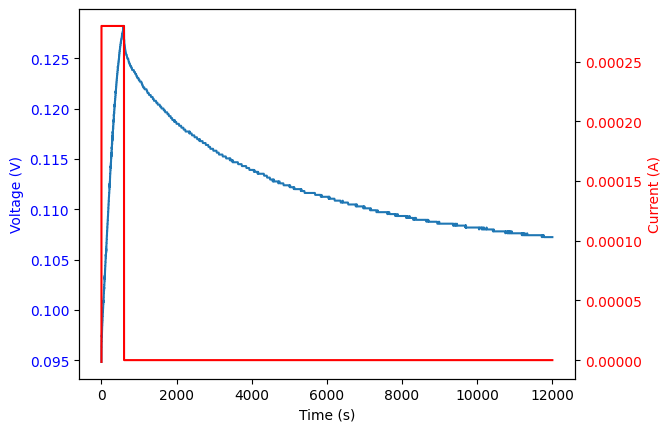

Estimated parameters: [2.00000000e-03 3.00000000e-08 9.03404369e-13]


[Figure({
     'data': [{'fill': 'toself',
               'fillcolor': 'rgba(255,229,204,0.8)',
               'hoverinfo': 'skip',
               'line': {'color': 'rgba(255,255,255,0)'},
               'showlegend': False,
               'type': 'scatter',
               'x': [0.0, 0.0023270000237971544, 0.10029600001871586, ...,
                     0.10029600001871586, 0.0023270000237971544, 0.0],
               'y': [0.3464372204811094, 0.34741792674658256, 0.3474450722741788,
                     ..., 0.33439181222535014, 0.3343646666977539,
                     0.33338396043228075]},
              {'mode': 'markers',
               'name': 'Reference',
               'showlegend': True,
               'type': 'scatter',
               'x': array([0.00000000e+00, 2.32700002e-03, 1.00296000e-01, ..., 1.19861176e+04,
                           1.19961180e+04, 1.20061179e+04]),
               'y': array([0.09482659, 0.09597138, 0.09578058, ..., 0.10722846, 0.10722846,
              

In [17]:
##gitt fitting 

import numpy as np
import pandas as pd
import pybop
import pybamm
import logging
from scipy.interpolate import interp1d
import sys
import os
from pathlib import Path
import matplotlib.pyplot as plt
sys.path.append('C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')

# Import the parameter set
import Christina2023_2

# Assuming Christina2023 has a function named get_parameter_values that returns a dictionary
custom_parameters = Christina2023_2.get_custom_parameters()

# Load the base parameter set
base_parameters = pybamm.ParameterValues("Ecker2015_graphite_halfcell")

# Update the base parameters with your custom values, forcing any that don’t exist
base_parameters.update(custom_parameters, check_already_exists=False)

# Use the updated parameters in your model
parameter_values = pybamm.ParameterValues(base_parameters)


#data_path= r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\pulses\cycle_10_discharge_data.csv'
data_path= r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\discharge\cycle_30_discharge_data.csv'

data = pd.read_csv(data_path)
data =data[:-350]
# Extract necessary columns
time_data = data.iloc[:, 0].values  # Assuming the first column is Time^
time_data =time_data
voltage_data = data.iloc[:, 1].values  # Assuming the third column is Voltage
current_data = data.iloc[:, 2].values  # Assuming the second column is Current
voltage_data =voltage_data
# If you need to invert the current data, uncomment the following line
current_data2 = current_data
current_data = current_data*-1

#capacity_data = data.iloc[:, 3].values
# Extract necessary columns from experimental data
reference_time= time_data[0] 
time_data=(time_data-reference_time)#/3600

# reference_voltage= voltage_data[0] 
# voltage_data=(voltage_data-reference_voltage)


fig, ax1 = plt.subplots()
ax1.plot(time_data, voltage_data, label="Voltage (U_V)")
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

    # Plot Current vs Time on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(time_data, current_data2, 'r', label="Current (I_A)")
ax2.set_ylabel('Current (A)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.show()

dataset = pybop.Dataset(
    {
        "Time [s]": time_data,  # Convert to numpy array if not already
        "Current function [A]": current_data,
        "Voltage [V]": voltage_data,
    }
)

# Define parameter set
parameter_values.update(
    {
        "Reference OCP [V]": 10.3,
        "Derivative of the OCP wrt stoichiometry [V]": -1.38636,
    },
    check_already_exists=False,
)

# Define the cost to optimise
#model = pybop.lithium_ion.WeppnerHuggins(parameter_set=parameter_set)
model = pybop.lithium_ion.DFN(parameter_set=parameter_values, options={"working electrode": "positive"})
# parameters = pybop.Parameter(
#     "Positive particle diffusivity [m2.s-1]",
#     prior=pybop.Gaussian(5e-14, 1e-13),
#     bounds=[1e-16, 1e-11],
#     true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
# )

parameters = [

    pybop.Parameter(
        "Positive electrode thickness [m]",
        prior=pybop.Gaussian(7.56e-05, 0.5e-05),
        bounds=[5e-06, 2e-03],
        true_value=parameter_values["Positive particle radius [m]"],
    ),
    pybop.Parameter(
        "Positive particle radius [m]",
        prior=pybop.Gaussian(5.22e-06, 0.05e-06),
        bounds=[0.3e-07, 0.9e-05],
        true_value=parameter_values["Positive particle radius [m]"],
    ),
    pybop.Parameter(
        "Positive particle diffusivity [m2.s-1]",
        prior=pybop.Gaussian(5e-14, 1e-13),
        bounds=[1e-16, 1e-11],
        true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
        ),
#     pybop.Parameter(
#         "Positive electrode active material volume fraction",
#         prior=pybop.Gaussian(0.48, 0.05),
#         bounds=[0.4, 0.7],
#     ),
]


problem = pybop.FittingProblem(
    model,
    parameters,
    dataset,
    signal=["Voltage [V]"],
)


cost = pybop.RootMeanSquaredError(problem)

# # Build the optimisation problem
# optim = pybop.PSO(cost=cost, verbose=True)

# cost = pybop.SumSquaredError(problem)
solver = pybamm.CasadiSolver(mode="fast")
#solver = pybamm.IDAKLUSolver()
#optim = pybop.Optimisation(cost, optimiser=pybop.SciPyDifferentialEvolution)
# optim = pybop.Optimisation(cost, optimiser=pybop.CMAES) ###requires two or more parameters
# optim = pybop.Optimisation(cost, optimiser=pybop.PSO) #much better
# optim = pybop.Optimisation(cost, optimiser=pybop.SNES) #much better
# optim = pybop.Optimisation(cost, optimiser=pybop.Adam)
optim = pybop.Optimisation(cost=cost, optimiser=pybop.SciPyMinimize, solver=solver)
# optim = pybop.Optimisation(cost, optimiser=pybop.XNES)
# optim.set_max_iterations(500)


# Run the optimisation problem
x, final_cost = optim.run()
print("Estimated parameters:", x)

# Plot the timeseries output
pybop.quick_plot(problem, problem_inputs=x, title="Optimised Comparison")

# Plot convergence
# pybop.plot_convergence(optim)

# Plot the parameter traces
# pybop.plot_parameters(optim)

In [ ]:
##gitt fitting 

import numpy as np
import pandas as pd
import pybop
import pybamm
import logging
from scipy.interpolate import interp1d
import sys
import os
from pathlib import Path
import matplotlib.pyplot as plt
sys.path.append('C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')

# Import the parameter set
import Christina2023_2

# Assuming Christina2023 has a function named get_parameter_values that returns a dictionary
custom_parameters = Christina2023_2.get_custom_parameters()

# Load the base parameter set
base_parameters = pybamm.ParameterValues("Ecker2015_graphite_halfcell")

# Update the base parameters with your custom values, forcing any that don’t exist
base_parameters.update(custom_parameters, check_already_exists=False)

# Use the updated parameters in your model
parameter_values = pybamm.ParameterValues(base_parameters)


data_path= r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\pulses\cycle_12_discharge_data.csv'
# data_path= r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\discharge\cycle_6_discharge_data.csv'

data = pd.read_csv(data_path)
data =data[:-350]
# Extract necessary columns
time_data = data.iloc[:, 0].values  # Assuming the first column is Time^
time_data =time_data
voltage_data = data.iloc[:, 1].values  # Assuming the third column is Voltage
current_data = data.iloc[:, 2].values  # Assuming the second column is Current
voltage_data =voltage_data
# If you need to invert the current data, uncomment the following line
current_data2 = current_data
current_data = current_data*-1

#capacity_data = data.iloc[:, 3].values
# Extract necessary columns from experimental data
reference_time= time_data[0] 
time_data=(time_data-reference_time)#/3600

# reference_voltage= voltage_data[0] 
# voltage_data=(voltage_data-reference_voltage)


fig, ax1 = plt.subplots()
ax1.plot(time_data, voltage_data, label="Voltage (U_V)")
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

    # Plot Current vs Time on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(time_data, current_data2, 'r', label="Current (I_A)")
ax2.set_ylabel('Current (A)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.show()

dataset = pybop.Dataset(
    {
        "Time [s]": time_data,  # Convert to numpy array if not already
        "Current function [A]": current_data,
        "Voltage [V]": voltage_data,
    }
)

# Define parameter set
# parameter_values.update(
#     {
#         "Reference OCP [V]": 10.3,
#         "Derivative of the OCP wrt stoichiometry [V]": -1.38636,
#     },
#     check_already_exists=False,
# )

# Define the cost to optimise
#model = pybop.lithium_ion.WeppnerHuggins(parameter_set=parameter_set)
model = pybop.lithium_ion.DFN(parameter_set=parameter_values, options={"working electrode": "positive"})
# parameters = pybop.Parameter(
#     "Positive particle diffusivity [m2.s-1]",
#     prior=pybop.Gaussian(5e-14, 1e-13),
#     bounds=[1e-16, 1e-11],
#     true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
# )

parameters = [

    pybop.Parameter(
        "Positive electrode thickness [m]",
        prior=pybop.Gaussian(7.56e-05, 0.5e-05),
        bounds=[5e-06, 2e-03],
        true_value=parameter_values["Positive particle radius [m]"],
    ),
    pybop.Parameter(
        "Positive particle radius [m]",
        prior=pybop.Gaussian(5.22e-06, 0.05e-06),
        bounds=[0.3e-07, 0.9e-05],
        true_value=parameter_values["Positive particle radius [m]"],
    ),
    pybop.Parameter(
        "Positive particle diffusivity [m2.s-1]",
        prior=pybop.Gaussian(5e-14, 1e-13),
        bounds=[1e-16, 1e-11],
        true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
        ),
#     pybop.Parameter(
#         "Positive electrode active material volume fraction",
#         prior=pybop.Gaussian(0.48, 0.05),
#         bounds=[0.4, 0.7],
#     ),
]


problem = pybop.FittingProblem(
    model,
    parameters,
    dataset,
    signal=["Voltage [V]"],
)


cost = pybop.RootMeanSquaredError(problem)

# # Build the optimisation problem
# optim = pybop.PSO(cost=cost, verbose=True)

# cost = pybop.SumSquaredError(problem)
solver = pybamm.CasadiSolver(mode="fast")
#solver = pybamm.IDAKLUSolver()
#optim = pybop.Optimisation(cost, optimiser=pybop.SciPyDifferentialEvolution)
# optim = pybop.Optimisation(cost, optimiser=pybop.CMAES) ###requires two or more parameters
# optim = pybop.Optimisation(cost, optimiser=pybop.PSO) #much better
# optim = pybop.Optimisation(cost, optimiser=pybop.SNES) #much better
# optim = pybop.Optimisation(cost, optimiser=pybop.Adam)
optim = pybop.Optimisation(cost=cost, optimiser=pybop.SciPyMinimize, solver=solver)
# optim = pybop.Optimisation(cost, optimiser=pybop.XNES)
# optim.set_max_iterations(500)


# Run the optimisation problem
x, final_cost = optim.run()
print("Estimated parameters:", x)

# Plot the timeseries output
pybop.quick_plot(problem, problem_inputs=x, title="Optimised Comparison")

# Plot convergence
# pybop.plot_convergence(optim)

# Plot the parameter traces
# pybop.plot_parameters(optim)

In [ ]:
##gitt fitting 

import numpy as np
import pandas as pd
import pybop
import pybamm
import logging
from scipy.interpolate import interp1d
import sys
import os
from pathlib import Path
import matplotlib.pyplot as plt
sys.path.append('C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')

# Import the parameter set
import Christina2023_2

# Assuming Christina2023 has a function named get_parameter_values that returns a dictionary
custom_parameters = Christina2023_2.get_custom_parameters()

# Load the base parameter set
base_parameters = pybamm.ParameterValues("Ecker2015_graphite_halfcell")

# Update the base parameters with your custom values, forcing any that don’t exist
base_parameters.update(custom_parameters, check_already_exists=False)

# Use the updated parameters in your model
parameter_values = pybamm.ParameterValues(base_parameters)


data_path= r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\pulses\cycle_9_discharge_data.csv'
# data_path= r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\discharge\cycle_6_discharge_data.csv'

data = pd.read_csv(data_path)
data =data[:-350]
# Extract necessary columns
time_data = data.iloc[:, 0].values  # Assuming the first column is Time^
time_data =time_data
voltage_data = data.iloc[:, 1].values  # Assuming the third column is Voltage
current_data = data.iloc[:, 2].values  # Assuming the second column is Current
voltage_data =voltage_data
# If you need to invert the current data, uncomment the following line
current_data2 = current_data
current_data = current_data*-1

#capacity_data = data.iloc[:, 3].values
# Extract necessary columns from experimental data
reference_time= time_data[0] 
time_data=(time_data-reference_time)#/3600

# reference_voltage= voltage_data[0] 
# voltage_data=(voltage_data-reference_voltage)


fig, ax1 = plt.subplots()
ax1.plot(time_data, voltage_data, label="Voltage (U_V)")
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

    # Plot Current vs Time on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(time_data, current_data2, 'r', label="Current (I_A)")
ax2.set_ylabel('Current (A)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.show()

dataset = pybop.Dataset(
    {
        "Time [s]": time_data,  # Convert to numpy array if not already
        "Current function [A]": current_data,
        "Voltage [V]": voltage_data,
    }
)

# Define parameter set
# parameter_values.update(
#     {
#         "Reference OCP [V]": 10.3,
#         "Derivative of the OCP wrt stoichiometry [V]": -1.38636,
#     },
#     check_already_exists=False,
# )

# Define the cost to optimise
#model = pybop.lithium_ion.WeppnerHuggins(parameter_set=parameter_set)
model = pybop.lithium_ion.DFN(parameter_set=parameter_values, options={"working electrode": "positive"})
# parameters = pybop.Parameter(
#     "Positive particle diffusivity [m2.s-1]",
#     prior=pybop.Gaussian(5e-14, 1e-13),
#     bounds=[1e-16, 1e-11],
#     true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
# )

parameters = [

    pybop.Parameter(
        "Positive electrode thickness [m]",
        prior=pybop.Gaussian(7.56e-05, 0.5e-05),
        bounds=[5e-06, 2e-03],
        true_value=parameter_values["Positive particle radius [m]"],
    ),
    pybop.Parameter(
        "Positive particle radius [m]",
        prior=pybop.Gaussian(5.22e-06, 0.05e-06),
        bounds=[0.3e-07, 0.9e-05],
        true_value=parameter_values["Positive particle radius [m]"],
    ),
    pybop.Parameter(
        "Positive particle diffusivity [m2.s-1]",
        prior=pybop.Gaussian(5e-14, 1e-13),
        bounds=[1e-16, 1e-11],
        true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
        ),
#     pybop.Parameter(
#         "Positive electrode active material volume fraction",
#         prior=pybop.Gaussian(0.48, 0.05),
#         bounds=[0.4, 0.7],
#     ),
]


problem = pybop.FittingProblem(
    model,
    parameters,
    dataset,
    signal=["Voltage [V]"],
)


cost = pybop.RootMeanSquaredError(problem)

# # Build the optimisation problem
# optim = pybop.PSO(cost=cost, verbose=True)

# cost = pybop.SumSquaredError(problem)
solver = pybamm.CasadiSolver(mode="fast")
#solver = pybamm.IDAKLUSolver()
#optim = pybop.Optimisation(cost, optimiser=pybop.SciPyDifferentialEvolution)
# optim = pybop.Optimisation(cost, optimiser=pybop.CMAES) ###requires two or more parameters
# optim = pybop.Optimisation(cost, optimiser=pybop.PSO) #much better
# optim = pybop.Optimisation(cost, optimiser=pybop.SNES) #much better
# optim = pybop.Optimisation(cost, optimiser=pybop.Adam)
optim = pybop.Optimisation(cost=cost, optimiser=pybop.SciPyMinimize, solver=solver)
# optim = pybop.Optimisation(cost, optimiser=pybop.XNES)
# optim.set_max_iterations(500)


# Run the optimisation problem
x, final_cost = optim.run()
print("Estimated parameters:", x)

# Plot the timeseries output
pybop.quick_plot(problem, problem_inputs=x, title="Optimised Comparison")

# Plot convergence
# pybop.plot_convergence(optim)

# Plot the parameter traces
# pybop.plot_parameters(optim)

In [ ]:
##gitt fitting 

import numpy as np
import pandas as pd
import pybop
import pybamm
import logging
from scipy.interpolate import interp1d
import sys
import os
from pathlib import Path
import matplotlib.pyplot as plt
sys.path.append('C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')

# Import the parameter set
import Christina2023_2

# Assuming Christina2023 has a function named get_parameter_values that returns a dictionary
custom_parameters = Christina2023_2.get_custom_parameters()

# Load the base parameter set
base_parameters = pybamm.ParameterValues("Ecker2015_graphite_halfcell")

# Update the base parameters with your custom values, forcing any that don’t exist
base_parameters.update(custom_parameters, check_already_exists=False)

# Use the updated parameters in your model
parameter_values = pybamm.ParameterValues(base_parameters)


data_path= r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\pulses\cycle_20_discharge_data.csv'
# data_path= r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\discharge\cycle_6_discharge_data.csv'

data = pd.read_csv(data_path)
data =data[:-350]
# Extract necessary columns
time_data = data.iloc[:, 0].values  # Assuming the first column is Time^
time_data =time_data
voltage_data = data.iloc[:, 1].values  # Assuming the third column is Voltage
current_data = data.iloc[:, 2].values  # Assuming the second column is Current
voltage_data =voltage_data
# If you need to invert the current data, uncomment the following line
current_data2 = current_data
current_data = current_data*-1

#capacity_data = data.iloc[:, 3].values
# Extract necessary columns from experimental data
reference_time= time_data[0] 
time_data=(time_data-reference_time)#/3600

# reference_voltage= voltage_data[0] 
# voltage_data=(voltage_data-reference_voltage)


fig, ax1 = plt.subplots()
ax1.plot(time_data, voltage_data, label="Voltage (U_V)")
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

    # Plot Current vs Time on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(time_data, current_data2, 'r', label="Current (I_A)")
ax2.set_ylabel('Current (A)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.show()

dataset = pybop.Dataset(
    {
        "Time [s]": time_data,  # Convert to numpy array if not already
        "Current function [A]": current_data,
        "Voltage [V]": voltage_data,
    }
)

# Define parameter set
parameter_values.update(
    {
        "Reference OCP [V]": 10.3,
        "Derivative of the OCP wrt stoichiometry [V]": -1.38636,
    },
    check_already_exists=False,
)

# Define the cost to optimise
#model = pybop.lithium_ion.WeppnerHuggins(parameter_set=parameter_set)
model = pybop.lithium_ion.DFN(parameter_set=parameter_values, options={"working electrode": "positive"})
# parameters = pybop.Parameter(
#     "Positive particle diffusivity [m2.s-1]",
#     prior=pybop.Gaussian(5e-14, 1e-13),
#     bounds=[1e-16, 1e-11],
#     true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
# )

parameters = [

    pybop.Parameter(
        "Positive electrode thickness [m]",
        prior=pybop.Gaussian(7.56e-05, 0.5e-05),
        bounds=[5e-06, 2e-03],
        true_value=parameter_values["Positive particle radius [m]"],
    ),
    pybop.Parameter(
        "Positive particle radius [m]",
        prior=pybop.Gaussian(5.22e-06, 0.05e-06),
        bounds=[0.3e-07, 0.9e-05],
        true_value=parameter_values["Positive particle radius [m]"],
    ),
    pybop.Parameter(
        "Positive particle diffusivity [m2.s-1]",
        prior=pybop.Gaussian(5e-14, 1e-13),
        bounds=[1e-16, 1e-11],
        true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
        ),
#     pybop.Parameter(
#         "Positive electrode active material volume fraction",
#         prior=pybop.Gaussian(0.48, 0.05),
#         bounds=[0.4, 0.7],
#     ),
]


problem = pybop.FittingProblem(
    model,
    parameters,
    dataset,
    signal=["Voltage [V]"],
)


cost = pybop.RootMeanSquaredError(problem)

# # Build the optimisation problem
# optim = pybop.PSO(cost=cost, verbose=True)

# cost = pybop.SumSquaredError(problem)
solver = pybamm.CasadiSolver(mode="fast")
#solver = pybamm.IDAKLUSolver()
#optim = pybop.Optimisation(cost, optimiser=pybop.SciPyDifferentialEvolution)
# optim = pybop.Optimisation(cost, optimiser=pybop.CMAES) ###requires two or more parameters
# optim = pybop.Optimisation(cost, optimiser=pybop.PSO) #much better
# optim = pybop.Optimisation(cost, optimiser=pybop.SNES) #much better
# optim = pybop.Optimisation(cost, optimiser=pybop.Adam)
optim = pybop.Optimisation(cost=cost, optimiser=pybop.SciPyMinimize, solver=solver)
# optim = pybop.Optimisation(cost, optimiser=pybop.XNES)
# optim.set_max_iterations(500)


# Run the optimisation problem
x, final_cost = optim.run()
print("Estimated parameters:", x)

# Plot the timeseries output
pybop.quick_plot(problem, problem_inputs=x, title="Optimised Comparison")

# Plot convergence
# pybop.plot_convergence(optim)

# Plot the parameter traces
# pybop.plot_parameters(optim)

In [ ]:
##gitt fitting 

import numpy as np
import pandas as pd
import pybop
import pybamm
import logging
from scipy.interpolate import interp1d
import sys
import os
from pathlib import Path
import matplotlib.pyplot as plt
sys.path.append('C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')

# Import the parameter set
import Christina2023_2

# Assuming Christina2023 has a function named get_parameter_values that returns a dictionary
custom_parameters = Christina2023_2.get_custom_parameters()

# Load the base parameter set
base_parameters = pybamm.ParameterValues("Ecker2015_graphite_halfcell")

# Update the base parameters with your custom values, forcing any that don’t exist
base_parameters.update(custom_parameters, check_already_exists=False)

# Use the updated parameters in your model
parameter_values = pybamm.ParameterValues(base_parameters)


data_path= r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\charge_new3\pulse_23_data.csv'

data = pd.read_csv(data_path)
data = data[:-350]
# Extract necessary columns
time_data = data.iloc[:, 0].values  # Assuming the first column is Time^
time_data =time_data
voltage_data = data.iloc[:, 1].values  # Assuming the third column is Voltage
current_data = data.iloc[:, 2].values  # Assuming the second column is Current
voltage_data =voltage_data
# If you need to invert the current data, uncomment the following line
current_data = current_data*-1
#capacity_data = data.iloc[:, 3].values
# Extract necessary columns from experimental data
reference_time= time_data[0] 
time_data=time_data-reference_time

# reference_voltage= voltage_data[0] 
# voltage_data=voltage_data-reference_voltage

# Plotting the results
plt.figure(figsize=(7, 5))
plt.plot(time_data, voltage_data, label='Experiment', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs. Time')
plt.legend()
plt.grid(True)
plt.show()



dataset = pybop.Dataset(
    {
        "Time [s]": time_data,  # Convert to numpy array if not already
        "Current function [A]": current_data,
        "Voltage [V]": voltage_data,
    }
)

# # Define parameter set
# parameter_values.update(
#     {
#         "Reference OCP [V]": 0.2,
#         "Derivative of the OCP wrt stoichiometry [V]": -1.38636,
#     },
#     check_already_exists=False,
# )

# Define the cost to optimise
#model = pybop.lithium_ion.WeppnerHuggins(parameter_set=parameter_set)
model = pybop.lithium_ion.DFN(parameter_set=parameter_values, options={"working electrode": "positive"})
# parameters = pybop.Parameter(
#     "Positive particle diffusivity [m2.s-1]",
#     prior=pybop.Gaussian(5e-14, 1e-13),
#     bounds=[1e-16, 1e-11],
#     true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
# )

parameters = [
    pybop.Parameter(
        "Positive electrode Bruggeman coefficient",
        prior=pybop.Gaussian(0.6, 0.7),
        bounds=[0.5, 1.5],
        true_value=parameter_values["Positive electrode Bruggeman coefficient"],
    ),
    pybop.Parameter(
        "Positive electrode thickness [m]",
        prior=pybop.Gaussian(7.56e-05, 0.5e-05),
        bounds=[5e-06, 2e-03],
        true_value=parameter_values["Positive particle radius [m]"],
        ),
    # pybop.Parameter(
    #     "Positive particle radius [m]",
    #     prior=pybop.Gaussian(5.22e-06, 0.05e-06),
    #     bounds=[0.3e-07, 0.9e-05],
    #     true_value=parameter_values["Positive particle radius [m]"],
    # ),
    # pybop.Parameter(
    #     "Cation transference number",
    #     prior=pybop.Gaussian(0.1, 0.5),
    #     bounds=[0.01, 2],
    #     true_value=parameter_values["Cation transference number"],
    # ),
    pybop.Parameter(
        "Positive particle diffusivity [m2.s-1]",
        prior=pybop.Gaussian(5e-14, 1e-13),
        bounds=[1e-16, 1e-11],
        true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
    ),
    pybop.Parameter(
        "Positive electrode exchange-current density [A.m-2]",
        prior=pybop.Gaussian(1, 5),  # Initial guess is 1e-3 A/m² with some uncertainty
        bounds=[1e0, 1e4],  # Bounds based on typical literature values for lithium electrodes
        true_value=parameter_values["Positive electrode exchange-current density [A.m-2]"],  # Default true value
    ),    
    ]

problem = pybop.FittingProblem(
    model,
    parameters,
    dataset,
    signal=["Voltage [V]"],
)

cost = pybop.RootMeanSquaredError(problem)

# # Build the optimisation problem
# optim = pybop.PSO(cost=cost, verbose=True)



# cost = pybop.SumSquaredError(problem)
# solver = pybamm.CasadiSolver(mode="fast")
solver = pybamm.IDAKLUSolver()
#optim = pybop.Optimisation(cost, optimiser=pybop.SciPyDifferentialEvolution)
# optim = pybop.Optimisation(cost, optimiser=pybop.CMAES) ###requires two or more parameters
# optim = pybop.Optimisation(cost, optimiser=pybop.PSO) #much better
# optim = pybop.Optimisation(cost, optimiser=pybop.SNES) #much better
# optim = pybop.Optimisation(cost, optimiser=pybop.Adam)
optim = pybop.Optimisation(cost=cost, optimiser=pybop.SciPyMinimize, solver=solver)
# optim = pybop.Optimisation(cost, optimiser=pybop.XNES)
# optim.set_max_iterations(500)


# Run the optimisation problem
x, final_cost = optim.run()
print("Estimated parameters:", x)

# Plot the timeseries output
pybop.quick_plot(problem, problem_inputs=x, title="Optimised Comparison")

# Plot convergence
# pybop.plot_convergence(optim)

# Plot the parameter traces
# pybop.plot_parameters(optim)

In [ ]:
### looping the fitting

import numpy as np
import pandas as pd
import pybop
import pybamm
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path




# Add the plotting folder to the system path
root_dir = Path(r'C:\Users\John\Desktop\import\Pybop\pybop\plotting')
sys.path.insert(0, str(root_dir))

from extract_model import extract_model_data



# Assuming 'Christina2023_2' and the custom parameters are the same as before
sys.path.append('C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')
import Christina2023_2

# Get custom parameters
custom_parameters = Christina2023_2.get_custom_parameters()

# Load the base parameter set
base_parameters = pybamm.ParameterValues("Ecker2015_graphite_halfcell")
base_parameters.update(custom_parameters, check_already_exists=False)

# Folder containing all the pulse data files
data_folder = r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\charge3'

# Get a list of all CSV files in the folder
data_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]

# Loop over all the CSV files
for data_file in data_files:
    data_path = os.path.join(data_folder, data_file)
    
    # Load the pulse data from the file
    data = pd.read_csv(data_path)
    data = data[:-350]  # Remove last 350 rows
    time_data = data.iloc[:, 0].values
    voltage_data = data.iloc[:, 1].values
    current_data = data.iloc[:, 2].values * -1  # Invert current data

    # Adjust time data
    reference_time = time_data[0]
    time_data = (time_data - reference_time)

    # Create the dataset for PyBaMM
    dataset = pybop.Dataset(
        {
            "Time [s]": time_data,
            "Current function [A]": current_data,
            "Voltage [V]": voltage_data,
        }
    )

    # Use the updated parameters in your model
    parameter_values = pybamm.ParameterValues(base_parameters)

    # Define the PyBaMM model (SPMe in this case)
    model = pybop.lithium_ion.SPMe(parameter_set=parameter_values, options={"working electrode": "positive"})

    # Define the parameters to optimize
    parameters = [
        pybop.Parameter(
            "Positive electrode thickness [m]",
            prior=pybop.Gaussian(7.56e-05, 0.5e-05),
            bounds=[5e-06, 2e-03],
            true_value=parameter_values["Positive electrode thickness [m]"],
        ),
        pybop.Parameter(
            "Positive particle radius [m]",
            prior=pybop.Gaussian(5.22e-06, 0.05e-06),
            bounds=[0.3e-07, 0.9e-05],
            true_value=parameter_values["Positive particle radius [m]"],
        ),
        pybop.Parameter(
            "Positive particle diffusivity [m2.s-1]",
            prior=pybop.Gaussian(5e-14, 1e-13),
            bounds=[1e-16, 1e-11],
            true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
        ),
    ]

    # Define the fitting problem
    problem = pybop.FittingProblem(
        model,
        parameters,
        dataset,
        signal=["Voltage [V]"],
    )

    # Define the cost function
    cost = pybop.RootMeanSquaredError(problem)

    # Use the Casadi solver for optimization
    solver = pybamm.CasadiSolver(mode="fast")
    optim = pybop.Optimisation(cost=cost, optimiser=pybop.SciPyMinimize, solver=solver)

    # Run the optimization
    x, final_cost = optim.run()
    print(f"Estimated parameters for {data_file}: {x}")

    # Extract model data before and after optimization
    data_output_initial = extract_model_data(problem)  # Initial model data
    data_output = extract_model_data(problem, parameter_values=x)  # Optimized model data

    # Access voltage and time data
    voltage_data_initial = data_output_initial['Voltage [V]']
    voltage_data_optimized = data_output['Voltage [V]']

    time_data_initial = voltage_data_optimized['time_data']
    model_output_optimized = voltage_data_optimized['model_output']
    model_output_initial = voltage_data_initial['model_output']

    # Ensure the lengths of time and model outputs match
    if len(time_data_initial) != len(model_output_initial):
        min_length = min(len(time_data_initial), len(model_output_initial))
        time_data_initial = time_data_initial[:min_length]
        model_output_initial = model_output_initial[:min_length]

    # Interpolate the initial model output for comparison
    model_output_interpolated = np.interp(time_data_initial, time_data_initial, model_output_initial)

    # Create a folder for saving the results
    result_folder = os.path.join(data_folder, f"results_{Path(data_file).stem}")
    if not os.path.exists(result_folder):
        os.makedirs(result_folder)

    # Save the estimated parameters in a text file
    param_file = os.path.join(result_folder, "fitted_parameters.txt")
    with open(param_file, 'w') as f:
        f.write(f"Estimated parameters for {data_file}:\n")
        f.write(f"{x}\n")
    
    # Plotting the results
    plt.figure(figsize=(7, 5))
    plt.plot(time_data_initial, model_output_interpolated, '--', label='Initial Model', color='b')
    plt.plot(time_data_initial, model_output_optimized, '--', label='Optimized Model', color='k')
    plt.plot(time_data, voltage_data, '*', label='Experimental Data', color='r')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title(f'Voltage vs. Time - {data_file}')

    plt.legend()
    plt.grid(True)

    # Save the plot in the folder
    plot_filename = os.path.join(result_folder, 'time_vs_voltage_plot.png')
    plt.savefig(plot_filename, dpi=300)  # Save with high resolution
    plt.close()  # Close the plot to prevent overlap in the next iteration

    print(f"Results saved in {result_folder}\n")



In [23]:
import importlib.util

# Specify the module name and path
module_name = 'ocv_curves'
module_file_path = r'C:\Myenv\EP-BOLFI\EP-BOLFI\examples\parameters\models\ocv_curves.py'

# Load the module
spec = importlib.util.spec_from_file_location(module_name, module_file_path)
ocv_curves = importlib.util.module_from_spec(spec)
spec.loader.exec_module(ocv_curves)

# Access the functions from the module
OCV_graphite_precise = ocv_curves.OCV_graphite_precise
OCV_BASF_GITT_Test_cathode = ocv_curves.OCV_BASF_GITT_Test_cathode


In [ ]:
import numpy as np
import pandas as pd
import pybop
import pybamm
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path




# Add the plotting folder to the system path
root_dir = Path(r'C:\Users\John\Desktop\import\Pybop\pybop\plotting')
sys.path.insert(0, str(root_dir))

from extract_model import extract_model_data



#Assuming 'Christina2023_2' and the custom parameters are the same as before
sys.path.append('C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')

#import get_basf_gitt_test_cell_parameters
#print(basf_gitt_test_cell)
# Get custom parameters
from basf_gitt_test_cell import get_basf_gitt_test_cell_parameters

parameters = get_basf_gitt_test_cell_parameters()

#Create a ParameterValues object
parameter_values = pybamm.ParameterValues(parameters)
print(parameter_values)

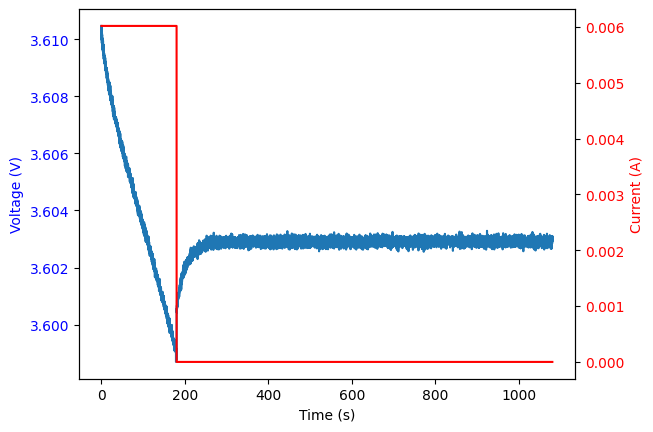

Estimated parameters: [7.80262732e-14]


In [19]:
import numpy as np
import pandas as pd
import pybop
import pybamm
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path
import plotly.graph_objects as go



# Add the plotting folder to the system path
root_dir = Path(r'C:\Users\John\Desktop\import\Pybop\pybop\plotting')
sys.path.insert(0, str(root_dir))

from extract_model import extract_model_data



#Assuming 'Christina2023_2' and the custom parameters are the same as before
sys.path.append('C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')
#import get_basf_gitt_test_cell_parameters
#print(basf_gitt_test_cell)
# Get custom parameters
from basf_gitt_test_cell import get_basf_gitt_test_cell_parameters
#base_parameters = pybamm.basf_gitt_test_cell
parameters = get_basf_gitt_test_cell_parameters()

# Create a ParameterValues object
parameter_values = pybamm.ParameterValues(parameters)

folder = Path(r'D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_noise_data')
folder.mkdir(parents=True, exist_ok=True)
file_name = 'pulse_84.csv'

# Combine folder and file name to create data_path
data_path = Path(folder) / file_name

# Load the data
data = pd.read_csv(data_path)
#data =data[:-350]
# Extract necessary columns
time_data = data.iloc[:, 0].values  # Assuming the first column is Time^
time_data =time_data
voltage_data = data.iloc[:, 2].values  # Assuming the third column is Voltage
#voltage_data = voltage_data*-1
current_data = data.iloc[:, 1].values  # Assuming the second column is Current

# If you need to invert the current data, uncomment the following line
current_data2 = current_data#*-1
#current_data = current_data#*-1

#capacity_data = data.iloc[:, 3].values
# Extract necessary columns from experimental data
reference_time= time_data[0] 
time_data=(time_data-reference_time)#/3600

# reference_voltage= voltage_data[0] 
# voltage_data=(voltage_data-reference_voltage)

# output_dir = Path(r'C:\Users\John\Desktop\Figures')
# output_dir.mkdir(parents=True, exist_ok=True)


fig, ax1 = plt.subplots()
ax1.plot(time_data, voltage_data, label="Voltage (U_V)")
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

    # Plot Current vs Time on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(time_data, current_data2, 'r', label="Current (I_A)")
ax2.set_ylabel('Current (A)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.savefig(folder/ "time_vs_voltage_current.png")
plt.show()

dataset = pybop.Dataset(
    {
        "Time [s]": time_data,  # Convert to numpy array if not already
        "Current function [A]": current_data,
        "Voltage [V]": voltage_data,
    }
)

# Define parameter set
# parameter_values.update(
#     {
#         "Reference OCP [V]": 10.3,
#         "Derivative of the OCP wrt stoichiometry [V]": -1.38636,
#     },
#     check_already_exists=False,
# )

# Define the cost to optimise
#model = pybop.lithium_ion.WeppnerHuggins(parameter_set=parameter_set)
#model = pybop.lithium_ion.SPMe(parameter_set=parameter_values, options={"working electrode": "positive"})
model = pybop.lithium_ion.SPMe(parameter_set=parameter_values)
# parameters = pybop.Parameter(
#     "Positive particle diffusivity [m2.s-1]",
#     prior=pybop.Gaussian(5e-14, 1e-13),
#     bounds=[1e-16, 1e-11],
#     true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
# )

parameters = [
        # pybop.Parameter(
        # "Positive electrode Bruggeman coefficient (electrode)",
        # prior=pybop.Gaussian(0.6, 0.7),
        # bounds=[0.5, 1.5],
        # true_value=parameter_values["Positive electrode Bruggeman coefficient (electrode)"],
        # ),
        # pybop.Parameter(
        # "Positive electrode thickness [m]",
        # prior=pybop.Gaussian(7.56e-05, 0.5e-05),
        # bounds=[5e-06, 2e-03],
        # true_value=parameter_values["Positive electrode thickness [m]"],
        # ),
    # pybop.Parameter(
    #     "Positive particle radius [m]",
    #     prior=pybop.Gaussian(5.22e-06, 0.05e-06),
    #     bounds=[0.3e-07, 0.9e-05],
    #     true_value=parameter_values["Positive particle radius [m]"],
    # ),
    # pybop.Parameter(
    #     "Cation transference number",
    #     prior=pybop.Gaussian(0.1, 0.5),
    #     bounds=[0.01, 2],
    #     true_value=parameter_values["Cation transference number"],
    # ),
    pybop.Parameter(
        "Positive particle diffusivity [m2.s-1]",
        prior=pybop.Gaussian(5e-14, 1e-13),
        bounds=[1e-16, 1e-11],
        true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
    ),
    # pybop.Parameter(
    #     "Positive electrode exchange-current density [A.m-2]",
    #     prior=pybop.Gaussian(1, 5),  # Initial guess is 1e-3 A/m² with some uncertainty
    #     bounds=[1e0, 1e4],  # Bounds based on typical literature values for lithium electrodes
    #     true_value=parameter_values["Positive electrode exchange-current density [A.m-2]"],  # Default true value
    # ),    
    ]

# parameters = [

    # pybop.Parameter(
    #     "Positive electrode thickness [m]",
    #     prior=pybop.Gaussian(7.56e-05, 0.5e-05),
    #     bounds=[5e-06, 2e-03],
    #     true_value=parameter_values["Positive electrode thickness [m]"],
    # ),
    # pybop.Parameter(
    #     "Positive particle radius [m]",
    #     prior=pybop.Gaussian(5.22e-06, 0.05e-06),
    #     bounds=[0.3e-07, 0.9e-05],
    #     true_value=parameter_values["Positive particle radius [m]"],
    # ),
    # pybop.Parameter(
    #     "Positive particle diffusivity [m2.s-1]",
    #     prior=pybop.Gaussian(5e-14, 1e-13),
    #     bounds=[1e-14, 1e-10],
    #     true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
    # ),
    # # pybop.Parameter(
    # #     "Positive electrode exchange-current density [A.m-2]",
    # #     prior=pybop.Gaussian(4, 50),  # Initial guess is 1e-3 A/m² with some uncertainty
    # #     bounds=[0.5, 80],  # Bounds based on typical literature values for lithium electrodes
    # #     true_value=parameter_values["Positive electrode exchange-current density [A.m-2]"],  # Default true value
    # # ),    
    # ]


problem = pybop.FittingProblem(
    model,
    parameters,
    dataset,
    signal=["Voltage [V]"],
)


cost = pybop.RootMeanSquaredError(problem)

# # Build the optimisation problem
# optim = pybop.PSO(cost=cost, verbose=True)

# cost = pybop.SumSquaredError(problem)
solver = pybamm.CasadiSolver(mode="fast")
#solver = pybamm.IDAKLUSolver()
#optim = pybop.Optimisation(cost, optimiser=pybop.SciPyDifferentialEvolution)
# optim = pybop.Optimisation(cost, optimiser=pybop.CMAES) ###requires two or more parameters
# optim = pybop.Optimisation(cost, optimiser=pybop.PSO) #much better
# optim = pybop.Optimisation(cost, optimiser=pybop.SNES) #much better
# optim = pybop.Optimisation(cost, optimiser=pybop.Adam)
optim = pybop.Optimisation(cost=cost, optimiser=pybop.SciPyMinimize, solver=solver)
# optim = pybop.Optimisation(cost, optimiser=pybop.XNES)
# optim.set_max_iterations(500)


# Run the optimisation problem
x, final_cost = optim.run()
print("Estimated parameters:", x)


# Generate and save the optimised comparison plot
figs = pybop.quick_plot(problem, problem_inputs=x, title="Optimised Comparison")
for i, fig in enumerate(figs):
    if isinstance(fig, go.Figure):  # Check if fig is a Plotly figure
        fig.write_image(folder / f"optimised_comparison_{i}.png")  # Save as PNG
        #fig.write_html(folder / f"optimised_comparison_{i}.html")  # Optional: Save as HTML

# Generate and save the convergence plot
figs = pybop.plot_convergence(optim)
for i, fig in enumerate(figs):
    if isinstance(fig, go.Figure):  # Ensure only figure objects are saved
        fig.write_image(folder / f"convergence_plot_{i}.png")  # Save as PNG
        #fig.write_html(folder / f"convergence_plot_{i}.html")  # Optional: Save as HTML

# Generate and save the parameter traces plot
figs = pybop.plot_parameters(optim)
for i, fig in enumerate(figs):
    if isinstance(fig, go.Figure):  # Ensure only figure objects are saved
        fig.write_image(folder / f"parameter_traces_{i}.png")  # Save as PNG
        #fig.write_html(folder / f"parameter_traces_{i}.html")  # Optional: Save as HTML

In [ ]:
import numpy as np
import pandas as pd
import pybop
import pybamm
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path
import plotly.graph_objects as go

# Add the plotting folder to the system path
root_dir = Path(r'C:\Users\John\Desktop\import\Pybop\pybop\plotting')
sys.path.insert(0, str(root_dir))

from extract_model import extract_model_data

# Import custom parameters
sys.path.append('C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')
from basf_gitt_test_cell import get_basf_gitt_test_cell_parameters
parameters = get_basf_gitt_test_cell_parameters()

# Create a ParameterValues object
parameter_values = pybamm.ParameterValues(parameters)

# Load the data
folder = Path(r'D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_noise_data')
file_name = 'pulse_84.csv'
data_path = Path(folder) / file_name
data = pd.read_csv(data_path)

time_data = data.iloc[:, 0].values
voltage_data = data.iloc[:, 4].values
current_data = data.iloc[:, 1].values
reference_time = time_data[0]
time_data = time_data - reference_time

# Plot the experimental data
fig, ax1 = plt.subplots()
ax1.plot(time_data, voltage_data, label="Voltage (U_V)")
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.plot(time_data, current_data, 'r', label="Current (I_A)")
ax2.set_ylabel('Current (A)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.savefig(folder / "time_vs_voltage_current.png")
plt.show()

# Create dataset for PyBOP
dataset = pybop.Dataset({
    "Time [s]": time_data,
    "Current function [A]": current_data,
    "Voltage [V]": voltage_data,
})

# Define your model and parameters for optimization
model = pybop.lithium_ion.SPMe(parameter_set=parameter_values)
parameters = [
    pybop.Parameter(
        "Positive particle diffusivity [m2.s-1]",
        prior=pybop.Gaussian(5e-14, 1e-13),
        bounds=[1e-16, 1e-11],
        true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
    ),
]

# Define calculate_desired_voltage function
def calculate_desired_voltage(
        solution,
        t_eval,
        voltage_scale,
        overpotential,
        three_electrode=None,
        dimensionless_reference_electrode_location=0.5,
        parameters={}
):
    if three_electrode:
        if parameters is None:
            raise ValueError("To calculate potentials for a three-electrode setup, provide the 'parameters' dictionary.")
        if three_electrode not in ["positive", "negative"]:
            raise ValueError("'three_electrode' must be either 'positive', 'negative', or None.")
        L_n = parameters["Negative electrode thickness [m]"]
        L_s = parameters["Separator thickness [m]"]
        L_p = parameters["Positive electrode thickness [m]"]
        dimensional_location = L_n + dimensionless_reference_electrode_location * L_s
        x_working_electrode = 0 if three_electrode == "negative" else L_n + L_s + L_p
        reference_electrode_potential = solution["Electrolyte potential [V]"](t_eval, x=dimensional_location)
        
        if overpotential:
            ocp = np.array([parameters[three_electrode.capitalize() + " electrode OCP [V]"](soc)
                            for soc in solution["Average " + three_electrode + " particle concentration"](t_eval)])
            U = (solution[three_electrode.capitalize() + " electrode potential [V]"](t_eval, x=x_working_electrode)
                 - ocp - reference_electrode_potential) / voltage_scale
        else:
            U = (solution[three_electrode.capitalize() + " electrode potential [V]"](t_eval, x=x_working_electrode)
                 - reference_electrode_potential) / voltage_scale
    else:
        if overpotential:
            U = (solution["Voltage [V]"](t_eval) - solution["Bulk open-circuit voltage [V]"](t_eval)) / voltage_scale
        else:
            U = solution["Voltage [V]"](t_eval) / voltage_scale
    return U

# Define a custom RMSE function
def custom_root_mean_squared_error(problem, problem_inputs, dataset, parameter_values, solver):
    # Solve the model with the current problem inputs
    solution = problem.model.solve(
        inputs=problem_inputs, t_eval=dataset.data["Time [s]"], solver=solver
    )
    
    # Use calculate_desired_voltage to get the voltage profile
    t_eval = dataset.data["Time [s]"]
    model_voltage = calculate_desired_voltage(
        solution,
        t_eval,
        voltage_scale=1.0,
        overpotential=False,
        three_electrode='positive',  # Adjust this based on your requirements
        parameters=parameter_values,
    )
    
    # Calculate Root Mean Squared Error (RMSE) between model and experimental voltage
    error = np.sqrt(np.mean((model_voltage - dataset.data["Voltage [V]"]) ** 2))
    return error

# Define the cost function as a lambda function
cost = lambda problem, problem_inputs: custom_root_mean_squared_error(
    problem, problem_inputs, dataset, parameter_values, solver
)

solver = pybamm.CasadiSolver(mode="fast")

# Set up the optimizer
optim = pybop.Optimisation(cost=cost, optimiser=pybop.SciPyMinimize, solver=solver)

# Run the optimization
x, final_cost = optim.run()
print("Estimated parameters:", x)

# Generate and save the optimized comparison plot
figs = pybop.quick_plot(problem, problem_inputs=x, title="Optimised Comparison")
for i, fig in enumerate(figs):
    if isinstance(fig, go.Figure):
        fig.write_image(folder / f"optimised_comparison_{i}.png")

# Generate and save the convergence plot
figs = pybop.plot_convergence(optim)
for i, fig in enumerate(figs):
    if isinstance(fig, go.Figure):
        fig.write_image(folder / f"convergence_plot_{i}.png")

# Generate and save the parameter traces plot
figs = pybop.plot_parameters(optim)
for i, fig in enumerate(figs):
    if isinstance(fig, go.Figure):
        fig.write_image(folder / f"parameter_traces_{i}.png")


In [ ]:
import numpy as np
import pandas as pd
import pybop
import pybamm
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path
import plotly.graph_objects as go

# Add the plotting folder to the system path
root_dir = Path(r'C:\Users\John\Desktop\import\Pybop\pybop\plotting')
sys.path.insert(0, str(root_dir))

from extract_model import extract_model_data

# Import custom parameters
sys.path.append('C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')
from basf_gitt_test_cell import get_basf_gitt_test_cell_parameters
parameters = get_basf_gitt_test_cell_parameters()

# Create a ParameterValues object
parameter_values = pybamm.ParameterValues(parameters)

# Load the data
folder = Path(r'D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_noise_data')
file_name = 'pulse_84.csv'
data_path = Path(folder) / file_name
data = pd.read_csv(data_path)

time_data = data.iloc[:, 0].values
voltage_data = data.iloc[:, 2].values
current_data = data.iloc[:, 1].values
reference_time = time_data[0]
time_data = time_data - reference_time

# Plot the experimental data
fig, ax1 = plt.subplots()
ax1.plot(time_data, voltage_data, label="Voltage (U_V)")
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.plot(time_data, current_data, 'r', label="Current (I_A)")
ax2.set_ylabel('Current (A)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.savefig(folder / "time_vs_voltage_current.png")
plt.show()

# Create dataset for PyBOP
dataset = pybop.Dataset({
    "Time [s]": time_data,
    "Current function [A]": current_data,
    "Voltage [V]": voltage_data,
})

# Define your model and parameters for optimization
model = pybop.lithium_ion.DFN(parameter_set=parameter_values)
parameters = [
    pybop.Parameter(
        "Positive particle diffusivity [m2.s-1]",
        prior=pybop.Gaussian(5e-14, 1e-13),
        bounds=[1e-16, 1e-11],
        true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
    ),
]

# Define calculate_desired_voltage function
def calculate_desired_voltage(
        solution,
        t_eval,
        voltage_scale,
        overpotential,
        three_electrode=None,
        dimensionless_reference_electrode_location=0.5,
        parameters={}
):
    if three_electrode:
        if parameters is None:
            raise ValueError("To calculate potentials for a three-electrode setup, provide the 'parameters' dictionary.")
        if three_electrode not in ["positive", "negative"]:
            raise ValueError("'three_electrode' must be either 'positive', 'negative', or None.")
        L_n = parameters["Negative electrode thickness [m]"]
        L_s = parameters["Separator thickness [m]"]
        L_p = parameters["Positive electrode thickness [m]"]
        dimensional_location = L_n + dimensionless_reference_electrode_location * L_s
        x_working_electrode = 0 if three_electrode == "negative" else L_n + L_s + L_p
        reference_electrode_potential = solution["Electrolyte potential [V]"](t_eval, x=dimensional_location)
        
        if overpotential:
            ocp = np.array([parameters[three_electrode.capitalize() + " electrode OCP [V]"](soc)
                            for soc in solution["Average " + three_electrode + " particle concentration"](t_eval)])
            U = (solution[three_electrode.capitalize() + " electrode potential [V]"](t_eval, x=x_working_electrode)
                 - ocp - reference_electrode_potential) / voltage_scale
        else:
            U = (solution[three_electrode.capitalize() + " electrode potential [V]"](t_eval, x=x_working_electrode)
                 - reference_electrode_potential) / voltage_scale
    else:
        if overpotential:
            U = (solution["Voltage [V]"](t_eval) - solution["Bulk open-circuit voltage [V]"](t_eval)) / voltage_scale
        else:
            U = solution["Voltage [V]"](t_eval) / voltage_scale
    return U

# Define a custom cost class for RMSE
# Define a custom cost class for RMSE
class CustomRMSECost(pybop.BaseCost):
    def __init__(self, problem):
        super().__init__(problem)
    
    def compute(self, y, dy=None, calculate_grad=False):
        # Get time data directly from the dataset dictionary
        t_eval = self.problem.dataset["Time [s]"]
        
        # Evaluate the model with the current parameters, obtaining model predictions
        y = self.problem.evaluate(self.problem.parameters.as_dict())
        
        # Print available keys to verify names
        print("Available keys in the solution:", y.keys())
        
        # Calculate the desired voltage with calculate_desired_voltage
        model_voltage = calculate_desired_voltage(
            y,
            t_eval,
            voltage_scale=1.0,
            overpotential=False,
            three_electrode='positive',  # Adjust this based on your requirements
            parameters=parameter_values,
        )
        
        # Calculate RMSE between model voltage and target voltage
        error = np.sqrt(np.mean((model_voltage - self.problem.dataset["Voltage [V]"]) ** 2))
        
        return error


# Instantiate the cost function with the problem
problem = pybop.FittingProblem(model, parameters, dataset, signal=["Voltage [V]"])
cost = CustomRMSECost(problem)

solver = pybamm.CasadiSolver(mode="fast")

# Set up the optimizer
optim = pybop.Optimisation(cost=cost, optimiser=pybop.SciPyMinimize, solver=solver)

# Run the optimization
x, final_cost = optim.run()
print("Estimated parameters:", x)

# Generate and save the optimized comparison plot
figs = pybop.quick_plot(problem, problem_inputs=x, title="Optimised Comparison")
for i, fig in enumerate(figs):
    if isinstance(fig, go.Figure):
        fig.write_image(folder / f"optimised_comparison_{i}.png")

# Generate and save the convergence plot
figs = pybop.plot_convergence(optim)
for i, fig in enumerate(figs):
    if isinstance(fig, go.Figure):
        fig.write_image(folder / f"convergence_plot_{i}.png")

# Generate and save the parameter traces plot
figs = pybop.plot_parameters(optim)
for i, fig in enumerate(figs):
    if isinstance(fig, go.Figure):
        fig.write_image(folder / f"parameter_traces_{i}.png")


In [ ]:
import numpy as np
import pandas as pd
import pybop
import pybamm
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path




# Add the plotting folder to the system path
root_dir = Path(r'C:\Users\John\Desktop\import\Pybop\pybop\plotting')
sys.path.insert(0, str(root_dir))

from extract_model import extract_model_data



#Assuming 'Christina2023_2' and the custom parameters are the same as before
sys.path.append('C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')
#import get_basf_gitt_test_cell_parameters
#print(basf_gitt_test_cell)
# Get custom parameters
from basf_gitt_test_cell import get_basf_gitt_test_cell_parameters
#base_parameters = pybamm.basf_gitt_test_cell
parameters = get_basf_gitt_test_cell_parameters()

# Create a ParameterValues object
parameter_values = pybamm.ParameterValues(parameters)

data_path= r'D:\DLR_Projects\simulated_pulses_CEC\pulse_84.csv'

data = pd.read_csv(data_path)
#data =data[:-350]
# Extract necessary columns
time_data = data.iloc[:, 0].values  # Assuming the first column is Time^
time_data =time_data
voltage_data = data.iloc[:, 2].values  # Assuming the third column is Voltage
#voltage_data = voltage_data*-1
current_data = data.iloc[:, 1].values  # Assuming the second column is Current

# If you need to invert the current data, uncomment the following line
current_data2 = current_data#*-1
#current_data = current_data#*-1

#capacity_data = data.iloc[:, 3].values
# Extract necessary columns from experimental data
reference_time= time_data[0] 
time_data=(time_data-reference_time)#/3600

# reference_voltage= voltage_data[0] 
# voltage_data=(voltage_data-reference_voltage)


fig, ax1 = plt.subplots()
ax1.plot(time_data, voltage_data, label="Voltage (U_V)")
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

    # Plot Current vs Time on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(time_data, current_data2, 'r', label="Current (I_A)")
ax2.set_ylabel('Current (A)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.show()

dataset = pybop.Dataset(
    {
        "Time [s]": time_data,  # Convert to numpy array if not already
        "Current function [A]": current_data,
        "Voltage [V]": voltage_data,
    }
)

# Define parameter set
# parameter_values.update(
#     {
#         "Reference OCP [V]": 10.3,
#         "Derivative of the OCP wrt stoichiometry [V]": -1.38636,
#     },
#     check_already_exists=False,
# )

# Define the cost to optimise
#model = pybop.lithium_ion.WeppnerHuggins(parameter_set=parameter_set)
# model = pybop.lithium_ion.SPMe(parameter_set=parameter_values, options={"working electrode": "positive"})
model = pybop.lithium_ion.SPMe(parameter_set=parameter_values)
# parameters = pybop.Parameter(
#     "Positive particle diffusivity [m2.s-1]",
#     prior=pybop.Gaussian(5e-14, 1e-13),
#     bounds=[1e-16, 1e-11],
#     true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
# )

parameters = [
        # pybop.Parameter(
        # "Positive electrode Bruggeman coefficient (electrode)",
        # prior=pybop.Gaussian(0.6, 0.7),
        # bounds=[0.5, 1.5],
        # true_value=parameter_values["Positive electrode Bruggeman coefficient (electrode)"],
        # ),
        # pybop.Parameter(
        # "Positive electrode thickness [m]",
        # prior=pybop.Gaussian(7.56e-05, 0.5e-05),
        # bounds=[5e-06, 2e-03],
        # true_value=parameter_values["Positive electrode thickness [m]"],
        # ),
    # pybop.Parameter(
    #     "Positive particle radius [m]",
    #     prior=pybop.Gaussian(5.22e-06, 0.05e-06),
    #     bounds=[0.3e-07, 0.9e-05],
    #     true_value=parameter_values["Positive particle radius [m]"],
    # ),
    # pybop.Parameter(
    #     "Cation transference number",
    #     prior=pybop.Gaussian(0.1, 0.5),
    #     bounds=[0.01, 2],
    #     true_value=parameter_values["Cation transference number"],
    # ),
    pybop.Parameter(
        "Positive particle diffusivity [m2.s-1]",
        prior=pybop.Gaussian(5e-14, 1e-13),
        bounds=[1e-16, 1e-11],
        true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
    ),
    # pybop.Parameter(
    #     "Positive electrode exchange-current density [A.m-2]",
    #     prior=pybop.Gaussian(1, 5),  # Initial guess is 1e-3 A/m² with some uncertainty
    #     bounds=[1e0, 1e4],  # Bounds based on typical literature values for lithium electrodes
    #     true_value=parameter_values["Positive electrode exchange-current density [A.m-2]"],  # Default true value
    # ),    
    ]

# parameters = [

    # pybop.Parameter(
    #     "Positive electrode thickness [m]",
    #     prior=pybop.Gaussian(7.56e-05, 0.5e-05),
    #     bounds=[5e-06, 2e-03],
    #     true_value=parameter_values["Positive electrode thickness [m]"],
    # ),
    # pybop.Parameter(
    #     "Positive particle radius [m]",
    #     prior=pybop.Gaussian(5.22e-06, 0.05e-06),
    #     bounds=[0.3e-07, 0.9e-05],
    #     true_value=parameter_values["Positive particle radius [m]"],
    # ),
    # pybop.Parameter(
    #     "Positive particle diffusivity [m2.s-1]",
    #     prior=pybop.Gaussian(5e-14, 1e-13),
    #     bounds=[1e-14, 1e-10],
    #     true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
    # ),
    # # pybop.Parameter(
    # #     "Positive electrode exchange-current density [A.m-2]",
    # #     prior=pybop.Gaussian(4, 50),  # Initial guess is 1e-3 A/m² with some uncertainty
    # #     bounds=[0.5, 80],  # Bounds based on typical literature values for lithium electrodes
    # #     true_value=parameter_values["Positive electrode exchange-current density [A.m-2]"],  # Default true value
    # # ),    
    # ]


problem = pybop.FittingProblem(
    model,
    parameters,
    dataset,
    signal=["Voltage [V]"],
)


cost = pybop.RootMeanSquaredError(problem)

# # Build the optimisation problem
# optim = pybop.PSO(cost=cost, verbose=True)

# cost = pybop.SumSquaredError(problem)
solver = pybamm.CasadiSolver(mode="fast")
#solver = pybamm.IDAKLUSolver()
#optim = pybop.Optimisation(cost, optimiser=pybop.SciPyDifferentialEvolution)
# optim = pybop.Optimisation(cost, optimiser=pybop.CMAES) ###requires two or more parameters
# optim = pybop.Optimisation(cost, optimiser=pybop.PSO) #much better
# optim = pybop.Optimisation(cost, optimiser=pybop.SNES) #much better
# optim = pybop.Optimisation(cost, optimiser=pybop.Adam)
optim = pybop.Optimisation(cost=cost, optimiser=pybop.SciPyMinimize, solver=solver)
# optim = pybop.Optimisation(cost, optimiser=pybop.XNES)
# optim.set_max_iterations(500)


# Run the optimisation problem
x, final_cost = optim.run()
print("Estimated parameters:", x)

# Plot the timeseries output
pybop.quick_plot(problem, problem_inputs=x, title="Optimised Comparison")

# Plot convergence
# pybop.plot_convergence(optim)

# Plot the parameter traces
# pybop.plot_parameters(optim)

In [20]:
### looping the fitting

import numpy as np
import pandas as pd
import pybop
import pybamm
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path




# Add the plotting folder to the system path
root_dir = Path(r'C:\Users\John\Desktop\import\Pybop\pybop\plotting')
sys.path.insert(0, str(root_dir))

from extract_model import extract_model_data



# Assuming 'Christina2023_2' and the custom parameters are the same as before
sys.path.append('C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')
import Christina2023_2

# Get custom parameters
custom_parameters = Christina2023_2.get_custom_parameters()

# Load the base parameter set
base_parameters = pybamm.ParameterValues("Ecker2015_graphite_halfcell")
base_parameters.update(custom_parameters, check_already_exists=False)

# Folder containing all the pulse data files
data_folder = r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\charge_new'

# Get a list of all CSV files in the folder
data_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]

# Loop over all the CSV files
for data_file in data_files:
    data_path = os.path.join(data_folder, data_file)
    
    # Load the pulse data from the file
    data = pd.read_csv(data_path)
    data = data[:-350]  # Remove last 350 rows
    time_data = data.iloc[:, 0].values
    voltage_data = data.iloc[:, 1].values
    current_data = data.iloc[:, 2].values * -1  # Invert current data

    # Adjust time data
    reference_time = time_data[0]
    time_data = (time_data - reference_time)

    # Create the dataset for PyBaMM
    dataset = pybop.Dataset(
        {
            "Time [s]": time_data,
            "Current function [A]": current_data,
            "Voltage [V]": voltage_data,
        }
    )

    # Use the updated parameters in your model
    parameter_values = pybamm.ParameterValues(base_parameters)

    # Define the PyBaMM model (SPMe in this case)
    model = pybop.lithium_ion.DFN(parameter_set=parameter_values, options={"working electrode": "positive"})

    # Define the parameters to optimize
    parameters = [
        # pybop.Parameter(
        # "Positive electrode Bruggeman coefficient",
        # prior=pybop.Gaussian(0.6, 0.7),
        # bounds=[0.5, 1.5],
        # true_value=parameter_values["Positive electrode Bruggeman coefficient"],
        # ),
        # pybop.Parameter(
        # "Positive electrode thickness [m]",
        # prior=pybop.Gaussian(7.56e-05, 0.5e-05),
        # bounds=[5e-06, 2e-03],
        # true_value=parameter_values["Positive electrode thickness [m]"],
        # ),
    pybop.Parameter(
        "Positive particle radius [m]",
        prior=pybop.Gaussian(5.22e-06, 0.05e-06),
        bounds=[0.3e-07, 0.9e-05],
        true_value=parameter_values["Positive particle radius [m]"],
    ),
    # pybop.Parameter(
    #     "Cation transference number",
    #     prior=pybop.Gaussian(0.1, 0.5),
    #     bounds=[0.01, 2],
    #     true_value=parameter_values["Cation transference number"],
    # ),
    pybop.Parameter(
        "Positive particle diffusivity [m2.s-1]",
        prior=pybop.Gaussian(5e-14, 1e-13),
        bounds=[1e-16, 1e-11],
        true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
    ),
    pybop.Parameter(
        "Positive electrode exchange-current density [A.m-2]",
        prior=pybop.Gaussian(1, 5),  # Initial guess is 1e-3 A/m² with some uncertainty
        bounds=[1e0, 1e4],  # Bounds based on typical literature values for lithium electrodes
        true_value=parameter_values["Positive electrode exchange-current density [A.m-2]"],  # Default true value
    ),    
    ]

    # Define the fitting problem
    problem = pybop.FittingProblem(
        model,
        parameters,
        dataset,
        signal=["Voltage [V]"],
    )

    # Define the cost function
    cost = pybop.RootMeanSquaredError(problem)

    # Use the Casadi solver for optimization
    solver = pybamm.CasadiSolver(mode="fast")
    optim = pybop.Optimisation(cost=cost, optimiser=pybop.SciPyMinimize, solver=solver)

    # Run the optimization
    x, final_cost = optim.run()
    print(f"Estimated parameters for {data_file}: {x}")

    # Extract model data before and after optimization
    data_output_initial = extract_model_data(problem)  # Initial model data
    data_output = extract_model_data(problem, parameter_values=x)  # Optimized model data

    # Access voltage and time data
    voltage_data_initial = data_output_initial['Voltage [V]']
    voltage_data_optimized = data_output['Voltage [V]']
    time_data_initial = voltage_data_optimized['time_data']
    model_output_optimized = voltage_data_optimized['model_output']
    model_output_initial = voltage_data_initial['model_output']

    # Ensure the lengths of time and model outputs match
    if len(time_data_initial) != len(model_output_initial):
        min_length = min(len(time_data_initial), len(model_output_initial))
        time_data_initial = time_data_initial[:min_length]
        model_output_initial = model_output_initial[:min_length]

    # Interpolate the initial model output for comparison
    model_output_interpolated = np.interp(time_data_initial, time_data_initial, model_output_initial)

    # Create a folder for saving the results
    result_folder = os.path.join(data_folder, f"results_{Path(data_file).stem}")
    if not os.path.exists(result_folder):
        os.makedirs(result_folder)

    # Save the estimated parameters in a text file
    param_file = os.path.join(result_folder, "fitted_parameters.txt")
    with open(param_file, 'w') as f:
        f.write(f"Estimated parameters for {data_file}:\n")
        f.write(f"{x}\n")
    
    # Plotting the results
    plt.figure(figsize=(7, 5))
    plt.plot(time_data_initial, model_output_interpolated, '--', label='Initial Model', color='k')
    plt.plot(time_data_initial, model_output_optimized, '-', label='Optimized Model', color='b')
    plt.plot(time_data, voltage_data, '-', label='Experimental Data', color='r')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title(f'Voltage vs. Time - {data_file}')

    plt.legend()
    plt.grid(True)

    # Save the plot in the folder
    plot_filename = os.path.join(result_folder, 'time_vs_voltage_plot.png')
    plt.savefig(plot_filename, dpi=300)  # Save with high resolution
    plt.close()  # Close the plot to prevent overlap in the next iteration

    print(f"Results saved in {result_folder}\n")



In [ ]:
#extracting fittied parameters

import os
import re
import matplotlib.pyplot as plt

# Folder containing all the results folders
results_folder = r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\charge'

# Initialize lists to store cycle numbers and diffusivity values
cycle_numbers = []
diffusivity_values = []

# Regex pattern to extract the cycle number from the file name (e.g., cycle_20)
cycle_pattern = re.compile(r'cycle_(\d+)_discharge_data')

# Loop through each folder in the results directory
for folder_name in os.listdir(results_folder):
    folder_path = os.path.join(results_folder, folder_name)
    
    # Check if the folder is a result folder (containing 'results_cycle_' in the name)
    if os.path.isdir(folder_path) and folder_name.startswith("results_cycle_"):
        # Extract the cycle number from the folder name using regex
        match = cycle_pattern.search(folder_name)
        if match:
            cycle_number = int(match.group(1))  # Extracted cycle number
            cycle_numbers.append(cycle_number)
        
        # Path to the parameter file
        param_file_path = os.path.join(folder_path, 'fitted_parameters.txt')
        
        # Check if the parameter file exists
        if os.path.exists(param_file_path):
            with open(param_file_path, 'r') as f:
                lines = f.readlines()
                
                # Extract the last parameter from the saved line (diffusivity)
                if len(lines) > 1:
                    param_line = lines[-1].strip()  # Last line of parameters
                    # Extract the last value in the parameter list (diffusivity)
                    params = param_line.strip('[]').split()
                    diffusivity = float(params[-1])  # Last parameter is the diffusivity
                    diffusivity_values.append(diffusivity)

# Ensure the cycle numbers and diffusivity values are sorted based on the cycle number
sorted_data = sorted(zip(cycle_numbers, diffusivity_values))
cycle_numbers, diffusivity_values = zip(*sorted_data)

# Plot the diffusivity against cycle number
plt.figure(figsize=(8, 6))
plt.plot(cycle_numbers, diffusivity_values, 'o-', label="Decreasing SoC →")
plt.xlabel('Pulse Number')
plt.ylabel('Diffusivity [m²/s]')
plt.title('Positive Particle Diffusivity vs. Pulse Number')
plt.yscale('log')
#plt.grid(True)
plt.legend()
plt.show()
print(min(diffusivity_values))
print(max(diffusivity_values))

In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Part 1: Extract and plot diffusivity vs. pulse number

# Folder containing all the results folders
results_folder = r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\all_pulses_spme'

# Initialize lists to store cycle numbers and diffusivity values
cycle_numbers = []
diffusivity_values = []

# Regex pattern to extract the cycle number from the file name (e.g., cycle_20)
#cycle_pattern = re.compile(r'cycle_(\d+)_discharge_data') ##matches the name of file
cycle_pattern = re.compile(r'pulse_(\d+)_data')
# Loop through each folder in the results directory
for folder_name in os.listdir(results_folder):
    folder_path = os.path.join(results_folder, folder_name)
    
    # Check if the folder is a result folder (containing 'results_cycle_' in the name)
    if os.path.isdir(folder_path) and folder_name.startswith("results_pulse_"):
        # Extract the cycle number from the folder name using regex
        match = cycle_pattern.search(folder_name)
        if match:
            cycle_number = int(match.group(1))  # Extracted cycle number
            cycle_numbers.append(cycle_number)
        
        # Path to the parameter file
        param_file_path = os.path.join(folder_path, 'fitted_parameters.txt')
        
        # Check if the parameter file exists
        if os.path.exists(param_file_path):
            with open(param_file_path, 'r') as f:
                lines = f.readlines()
                
                # Extract the last parameter from the saved line (diffusivity)
                if len(lines) > 1:
                    param_line = lines[-1].strip()  # Last line of parameters
                    # Extract the last value in the parameter list (diffusivity)
                    params = param_line.strip('[]').split()
                    diffusivity = float(params[-2])  # Last parameter is the diffusivity
                    diffusivity_values.append(diffusivity)

# Ensure the cycle numbers and diffusivity values are sorted based on the cycle number
sorted_data = sorted(zip(cycle_numbers, diffusivity_values))
cycle_numbers, diffusivity_values = zip(*sorted_data)

# Part 2: Read the CSV file and extract OCV vs. SOC data

csv_file_path = r'C:\Users\John\Desktop\delithiation_transformed2.csv'

# Read the data from the CSV file
df = pd.read_csv(csv_file_path)

# Extract SOC and OCV columns
soc_data = df['SOC_transformed']
ocv_data = df['OCV_transformed']

# Part 3: Create subplots (one plot on top of the other)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6))

# Plot diffusivity vs. pulse number on the first subplot (ax1)
ax1.plot(cycle_numbers, diffusivity_values, 'bo-', label="Direction of increasing SoC →")
ax1.set_xlabel('Pulse Number')
ax1.set_ylabel('Diffusivity [m²/s]')
ax1.set_title('Positive Particle Diffusivity vs. Pulse Number')
#ax1.grid(True)
ax1.set_yscale('log')
ax1.legend()

# Plot OCV vs. SOC on the second subplot (ax2)
ax2.plot(soc_data, ocv_data, 'r-', label="OCV vs SOC")
ax2.set_xlabel('SOC [C]')
ax2.set_ylabel('OCV [V]')
ax2.set_title('Open Circuit Voltage (OCV) vs. State of Charge (SOC)')
#ax2.grid(True)
ax2.legend()

# Adjust the layout to prevent overlap
plt.tight_layout()

# Save the combined figure
plt.savefig(r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\all_pulses_spme\Ds_SPMe.png', dpi=300)

# Show the plot
plt.show()

# Optional: Print the min and max values of diffusivity
print(f"Min diffusivity: {min(diffusivity_values)}")
print(f"Max diffusivity: {max(diffusivity_values)}")


In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Part 1: Extract and plot diffusivity vs. pulse number

# Folder containing all the results folders
results_folder = r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\charge_new'

# Initialize lists to store cycle numbers and diffusivity values
cycle_numbers = []
diffusivity_values = []

# Regex pattern to extract the cycle number from the file name (e.g., cycle_20)
#cycle_pattern = re.compile(r'cycle_(\d+)_discharge_data') ##matches the name of file
cycle_pattern = re.compile(r'pulse_(\d+)_data')
# Loop through each folder in the results directory
for folder_name in os.listdir(results_folder):
    folder_path = os.path.join(results_folder, folder_name)
    
    # Check if the folder is a result folder (containing 'results_cycle_' in the name)
    if os.path.isdir(folder_path) and folder_name.startswith("results_pulse_"):
        # Extract the cycle number from the folder name using regex
        match = cycle_pattern.search(folder_name)
        if match:
            cycle_number = int(match.group(1))  # Extracted cycle number
            cycle_numbers.append(cycle_number)
        
        # Path to the parameter file
        param_file_path = os.path.join(folder_path, 'fitted_parameters.txt')
        
        # Check if the parameter file exists
        if os.path.exists(param_file_path):
            with open(param_file_path, 'r') as f:
                lines = f.readlines()
                
                # Extract the last parameter from the saved line (diffusivity)
                if len(lines) > 1:
                    param_line = lines[-1].strip()  # Last line of parameters
                    # Extract the last value in the parameter list (diffusivity)
                    params = param_line.strip('[]').split()
                    diffusivity = float(params[-2])  # Last parameter is the diffusivity
                    diffusivity_values.append(diffusivity)

# Ensure the cycle numbers and diffusivity values are sorted based on the cycle number
sorted_data = sorted(zip(cycle_numbers, diffusivity_values))
cycle_numbers, diffusivity_values = zip(*sorted_data)

# Part 2: Read the CSV file and extract OCV vs. SOC data

csv_file_path = r'C:\Users\John\Desktop\delithiation_transformed2.csv'

# Read the data from the CSV file
df = pd.read_csv(csv_file_path)

# Extract SOC and OCV columns
soc_data = df['SOC_transformed']
ocv_data = df['OCV_transformed']

# Part 3: Create subplots (one plot on top of the other)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6))

# Plot diffusivity vs. pulse number on the first subplot (ax1)
ax1.plot(cycle_numbers, diffusivity_values, 'bo-', label="Direction of increasing SoC →")
ax1.set_xlabel('Pulse Number')
ax1.set_ylabel('Diffusivity [m²/s]')
ax1.set_title('Positive Particle Diffusivity vs. Pulse Number')
#ax1.grid(True)
ax1.set_yscale('log')
ax1.legend()

# Plot OCV vs. SOC on the second subplot (ax2)
ax2.plot(soc_data, ocv_data, 'r-', label="OCV vs SOC")
ax2.set_xlabel('SOC [C]')
ax2.set_ylabel('OCV [V]')
ax2.set_title('Open Circuit Voltage (OCV) vs. State of Charge (SOC)')
#ax2.grid(True)
ax2.legend()

# Adjust the layout to prevent overlap
plt.tight_layout()

# Save the combined figure
plt.savefig(r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\charge_new\Ds_DFN.png', dpi=300)

# Show the plot
plt.show()

# Optional: Print the min and max values of diffusivity
print(f"Min diffusivity: {min(diffusivity_values)}")
print(f"Max diffusivity: {max(diffusivity_values)}")


In [ ]:
git clone https://github.com/johnmugisa/EP-BOLFI.git

In [ ]:
### original data as obtained from Yannick

import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_file_path = r'C:\Users\John\Desktop\delithiation.csv'

# Read the data from the CSV file
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame (optional)
print(df.head())

# Create a plot of OCV [V] vs SOC [C]
plt.figure(figsize=(10, 6))
plt.plot(df['SOC [C]'], df['OCV [V]'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('SOC [C]')
plt.ylabel('OCV [V]')
plt.title('Open Circuit Voltage (OCV) vs. State of Charge (SOC)')
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_file_path = r'C:\Users\John\Desktop\delithiation.csv'
df = pd.read_csv(csv_file_path)

# Perform the operations
df['SOC_transformed'] = (df['SOC [C]'][::-1] * -1) / 11.193302002330194
df['OCV_transformed'] = df['OCV [V]'][::-1]

# Save the updated DataFrame to a new CSV with comma as the delimiter
output_file_path = r'C:\Users\John\Desktop\delithiation_transformed2.csv'
df.to_csv(output_file_path, index=False, sep=',')  # Ensure comma separation

# Print the transformed DataFrame to verify
print(df[['SOC_transformed', 'OCV_transformed']])


In [ ]:
csv_file_path = r'C:\Users\John\Desktop\delithiation_transformed2.csv'

# Read the data from the CSV file
df = pd.read_csv(csv_file_path)

plt.figure(figsize=(10, 6))
plt.plot(df['SOC_transformed'], df['OCV_transformed'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('SOC [C]')
plt.ylabel('OCV [V]')
plt.title('Open Circuit Voltage (OCV) vs. State of Charge (SOC)')
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
## transformation to the right way
import pandas as pd

# Load the CSV file into a DataFrame
csv_file_path = r'C:\Users\John\Desktop\delithiation.csv'
df = pd.read_csv(csv_file_path)

# Perform the operations
df['SOC_transformed'] = (df['SOC [C]'] * -1) / 11.193302002330194
df['OCV_transformed'] = df['OCV [V]']



# Create a new DataFrame with only the transformed columns
transformed_df = df[['SOC_transformed', 'OCV_transformed']]

# Save the transformed DataFrame to a new CSV with comma as the delimiter
output_file_path = r'C:\Users\John\Desktop\delithiation_transformed2.csv'
transformed_df.to_csv(output_file_path, index=False, sep=',')  # Ensure comma separation

# Print the saved file content to verify
with open(output_file_path, 'r') as f:
    print(f.read())



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


csv_file_path = r'C:\Users\John\Desktop\delithiation_transformed2.csv'

# Read the data from the CSV file
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame (optional)
print(df.head())

# Create a plot of OCV [V] vs SOC [C]
plt.figure(figsize=(10, 6))
plt.plot(df['SOC_transformed'], df['OCV_transformed'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('SOC [C]')
plt.ylabel('OCV [V]')
plt.title('Open Circuit Voltage (OCV) vs. State of Charge (SOC)')
plt.grid(True)
plt.savefig(r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\charge\voltage_soc.png', dpi=300)
# Show the plot
plt.show()

In [ ]:
import pandas as pd

# Load the first dataset with 'SOC_transformed' and 'OCV_transformed'
soc_ocv_file_path = r'C:\Users\John\Desktop\delithiation_transformed2.csv'
df_soc_ocv = pd.read_csv(soc_ocv_file_path)

# Load the second dataset with 'OCV [V]', 'Temperature [degC]', 'dUdT [V/K]'
ocv_temp_file_path = r'C:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\input\parameters\ecm\data\ecm_example_dudt.csv'  # Replace with the correct file path
df_ocv_temp = pd.read_csv(ocv_temp_file_path)

# Replace the 'OCV [V]' column in the second dataset with 'OCV_transformed' from the first dataset
df_ocv_temp['OCV [V]'] = df_soc_ocv['OCV_transformed']

# Save the updated second dataset
output_file_path = r'C:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\input\parameters\ecm\data\ecm_example_dudt.csv'
df_ocv_temp.to_csv(output_file_path, index=False)

# Print the first few rows to verify
print(df_ocv_temp.head())


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import pybamm
import matplotlib.pyplot as plt
import pybop

pybop.PlotlyManager().pio.renderers.default = "notebook_connected"


# Load the parameters
parameter_set = pybop.ParameterSet.pybamm("ECM_Example")
parameter_set.update(
    {
        "Cell capacity [A.h]": 11.355 / 3600,
        "Nominal cell capacity [A.h]": 11.355 / 3600,
        "Element-1 initial overpotential [V]": 0,
        "Upper voltage cut-off [V]": 0.99,
        "Lower voltage cut-off [V]": 0,
        "R0 [Ohm]": 1e-3,
        "R1 [Ohm]": 3e-3,
        "C1 [F]": 5e3,
        "Open-circuit voltage [V]": pybop.empirical.Thevenin().default_parameter_values[
            "Open-circuit voltage [V]"
        ],
    }
)
# Optional arguments - only needed for two RC pairs
parameter_set.update(
    {
        "R2 [Ohm]": 2e-3,
        "C2 [F]": 3e4,
        "Element-2 initial overpotential [V]": 0,
    },
    check_already_exists=False,
)

model = pybop.empirical.Thevenin(
    parameter_set=parameter_set,
    options={"number of rc elements": 2},
    solver=pybamm.CasadiSolver(mode="safe", dt_max=40),
)

# file_loc = r"C:\Users\John\Desktop\import\Pybop\examples\data\Samsung_INR21700\multipulse_hppc.xlsx"
# df = pd.read_excel(file_loc, index_col=None, na_values=["NA"])
# df = df.drop_duplicates(subset=["Time"], keep="first")

# dataset = pybop.Dataset(
#     {
#         "Time [s]": df["Time"].to_numpy(),
#         "Current function [A]": df["Current"].to_numpy(),
#         "Voltage [V]": df["Voltage"].to_numpy(),
#     }
# )


data_path= r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\pulses\cycle_60_discharge_data.csv'

data = pd.read_csv(data_path)

# Extract necessary columns
time_data = data.iloc[:, 0].values  # Assuming the first column is Time
time_data =time_data
voltage_data = data.iloc[:, 1].values  # Assuming the third column is Voltage
current_data = data.iloc[:, 2].values  # Assuming the second column is Current
voltage_data =voltage_data
# If you need to invert the current data, uncomment the following line
current_data = current_data*-1
#capacity_data = data.iloc[:, 3].values
# Extract necessary columns from experimental data
reference_time= time_data[0] 
time_data=time_data-reference_time

# reference_voltage= voltage_data[0] 
# voltage_data=voltage_data-reference_voltage

# Plotting the results
plt.figure(figsize=(7, 5))
plt.plot(time_data, voltage_data, label='Experiment', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs. Time')
plt.legend()
plt.grid(True)
plt.show()



dataset = pybop.Dataset(
    {
        "Time [s]": time_data,  # Convert to numpy array if not already
        "Current function [A]": current_data,
        "Voltage [V]": voltage_data,
    }
)

r0_guess = 0.05
parameters = pybop.Parameters(
    pybop.Parameter(
        "R0 [Ohm]",
        prior=pybop.Gaussian(r0_guess, r0_guess / 10),
        bounds=[0, 0.1],
    ),
    pybop.Parameter(
        "R1 [Ohm]",
        prior=pybop.Gaussian(r0_guess, r0_guess / 10),
        bounds=[0, 0.1],
    ),
    pybop.Parameter(
        "R2 [Ohm]",
        prior=pybop.Gaussian(r0_guess, r0_guess / 10),
        bounds=[0, 0.1],
    ),
    pybop.Parameter(
        "C1 [F]",
        prior=pybop.Gaussian(500, 100),
        bounds=[100, 1000],
    ),
    pybop.Parameter(
        "C2 [F]",
        prior=pybop.Gaussian(2000, 500),
        bounds=[100, 10000],
    ),
)

model.build(
    initial_state={"Initial open-circuit voltage [V]": 0.99}
)
problem = pybop.FittingProblem(
    model,
    parameters,
    dataset,
)

cost = pybop.SumSquaredError(problem)

optim = pybop.XNES(
    cost,
    sigma0=[1e-3, 1e-3, 1e-3, 10, 10],
    max_unchanged_iterations=20,
    max_iterations=1000,
)
x, final_cost = optim.run()
print("Initial parameters:", optim.x0)
print("Estimated parameters:", x)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import sys
# Assuming 'problem' is already defined and initialized properly
# Assuming 'extract_model_data' is working
from pathlib import Path

# Add the plotting folder to the system path
root_dir = Path(r'C:\Users\John\Desktop\import\Pybop\pybop\plotting')
sys.path.insert(0, str(root_dir))

from extract_model import extract_model_data
# Extract model data using the updated function
data_output_initial = extract_model_data(problem)

# Access data for 'Voltage [V]'
voltage_data_initial = data_output_initial['Voltage [V]']
time_data_initial = voltage_data_initial['time_data']
model_output_initial = voltage_data_initial['model_output']

# Check the lengths of the arrays
print(f"Length of time_data_initial: {len(time_data_initial)}")
print(f"Length of model_output_initial: {len(model_output_initial)}")

# Ensure the lengths of time_data_initial and model_output_initial are the same
if len(time_data_initial) != len(model_output_initial):
    min_length = min(len(time_data_initial), len(model_output_initial))
    time_data_initial = time_data_initial[:min_length]
    model_output_initial = model_output_initial[:min_length]

# Load experimental data

data =data

# Extract necessary columns from experimental data
time_data_exp = data.iloc[:, 0].values * 3600  # Convert to seconds
voltage_data_exp = data.iloc[:, 1].values  # Assuming the third column is Voltage

# Interpolate the model output to match the experimental time points
model_output_interpolated = np.interp(time_data_exp, time_data_initial, model_output_initial)

# Plotting the results
plt.figure(figsize=(7, 5))
plt.plot(time_data_exp, model_output_interpolated, '--', label='Modelled (Interpolated)', color='k')
#plt.plot(time_data_exp, voltage_data_exp, label='Experiment', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs. Time')
plt.legend()
plt.grid(True)
plt.show()

# Save the plot
save_directory = 'E:/GITT/'
filename = 'time_vs_voltage_plot_2C.png'

# Ensure the directory exists; if not, create it
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Save the figure
plt.savefig(os.path.join(save_directory, filename))

# Show the plot again (optional)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import sys

# Assuming 'problem' is already defined and initialized properly
# Assuming 'extract_model_data' is working
from pathlib import Path

# Add the plotting folder to the system path
root_dir = Path(r'C:\Users\John\Desktop\import\Pybop\pybop\plotting')
sys.path.insert(0, str(root_dir))

from extract_model import extract_model_data

# Extract model data using the updated function
data_output_initial = extract_model_data(problem)

# Access data for 'Voltage [V]'
voltage_data_initial = data_output_initial['Voltage [V]']
time_data_initial = voltage_data_initial['time_data']
model_output_initial = voltage_data_initial['model_output']

# Check the lengths of the arrays
print(f"Length of time_data_initial: {len(time_data_initial)}")
print(f"Length of model_output_initial: {len(model_output_initial)}")

# Ensure the lengths of time_data_initial and model_output_initial are the same
if len(time_data_initial) != len(model_output_initial):
    min_length = min(len(time_data_initial), len(model_output_initial))
    time_data_initial = time_data_initial[:min_length]
    model_output_initial = model_output_initial[:min_length]

# Load experimental data
data = data  # Assuming 'data' is already defined

# Extract necessary columns from experimental data
time_data_exp = data.iloc[:, 0].values * 3600  # Convert to seconds
voltage_data_exp = data.iloc[:, 1].values  # Assuming the second column is Voltage

# Interpolate the model output to match the experimental time points
model_output_interpolated = np.interp(time_data_exp, time_data_initial, model_output_initial)

# Plotting the results with axis limits and labels
plt.figure(figsize=(7, 5))
plt.plot(time_data_exp, model_output_interpolated, '--', label='Modelled (Interpolated)', color='k')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs. Time')

# Set x and y axis limits
#plt.xlim(0, max(time_data_exp))  # Adjust based on your data or set a custom limit
#plt.ylim(min(model_output_interpolated) , max(model_output_interpolated) )  # Adjust limits with padding

plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Save the plot
save_directory = 'E:/GITT/'
filename = 'time_vs_voltage_plot_2C.png'

# Ensure the directory exists; if not, create it
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Save the figure
plt.savefig(os.path.join(save_directory, filename))

# Show the plot again (optional)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from pathlib import Path

# Assuming 'problem' is already defined and initialized properly
# Assuming 'extract_model_data' is working

# Add the plotting folder to the system path
root_dir = Path(r'C:\Users\John\Desktop\import\Pybop\pybop\plotting')
sys.path.insert(0, str(root_dir))

from extract_model import extract_model_data

# Extract model data using the updated function
data_output_initial = extract_model_data(problem)

# Access data for 'Voltage [V]'
voltage_data_initial = data_output_initial['Voltage [V]']
time_data_initial = voltage_data_initial['time_data']
model_output_initial = voltage_data_initial['model_output']

# Check the lengths of the arrays
print(f"Length of time_data_initial: {len(time_data_initial)}")
print(f"Length of model_output_initial: {len(model_output_initial)}")

# Ensure the lengths of time_data_initial and model_output_initial are the same
if len(time_data_initial) != len(model_output_initial):
    min_length = min(len(time_data_initial), len(model_output_initial))
    time_data_initial = time_data_initial[:min_length]
    model_output_initial = model_output_initial[:min_length]

# Load experimental data
data_path = r'C:\Users\John\Desktop\import\Pybop\examples\notebooks\LG_M50_ECM\GIIT_data\pulses\cycle_50_discharge_data.csv'
data = pd.read_csv(data_path)

# Extract necessary columns from experimental data
time_data_exp = data.iloc[:, 0].values * 3600  # Convert to seconds
voltage_data_exp = data.iloc[:, 1].values  # Assuming the second column is Voltage

# Interpolate the model output to match the experimental time points
model_output_interpolated = np.interp(time_data_exp, time_data_initial, model_output_initial)

# Combine data into a DataFrame
output_data = pd.DataFrame({
    'Time [s]': time_data_exp,
    'Experimental Voltage [V]': voltage_data_exp,
    'Modelled Voltage (Interpolated) [V]': model_output_interpolated
})

# Save the DataFrame as a CSV file
save_directory = 'E:/GITT/'
filename = 'time_vs_voltage_data2.csv'

# Ensure the directory exists; if not, create it
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Save the data to a CSV file
output_csv_path = os.path.join(save_directory, filename)
output_data.to_csv(output_csv_path, index=False)

print(f"Data has been saved to: {output_csv_path}")

# Optionally, plot the results
plt.figure(figsize=(7, 5))
plt.plot(time_data_exp, model_output_interpolated, '--', label='Modelled (Interpolated)', color='k')
plt.plot(time_data_exp, voltage_data_exp, label='Experimental', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs. Time')
plt.legend()
plt.grid(True)
plt.show()


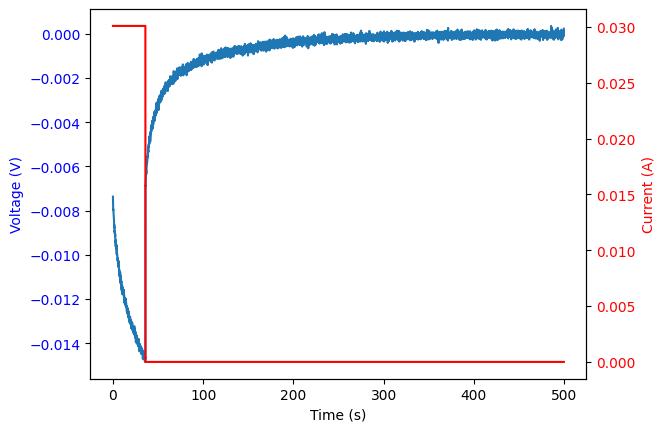

c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'fast' mode
  t_interp = self.process_t_interp(t_interp)
At t = 35.95 and h = 3.05601e-09, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 35.95 and h = 1.528e-09, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 35.95 and h = 1.528e-09, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 35.95 and h = 2.75041e-09, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 35.95 and h = 2.75041e-09, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 35.95 and h = 2.75041e-09, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 35.95 and h = 2.75041e-09, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 35.95 and h = 1.528e-09, the corrector convergence failed repeatedly or with |h| = 

[Figure({
     'data': [{'fill': 'toself',
               'fillcolor': 'rgba(255,229,204,0.8)',
               'hoverinfo': 'skip',
               'line': {'color': 'rgba(255,255,255,0)'},
               'showlegend': False,
               'type': 'scatter',
               'x': [0.0, 0.10013927576073911, 0.20027855152147822, ...,
                     0.20027855152147822, 0.10013927576073911, 0.0],
               'y': [-0.0027639725674832452, -0.0041999118863213095,
                     -0.0047159758252145615, ..., -0.006335594314862399,
                     -0.005819530375969147, -0.004383591057131083]},
              {'mode': 'markers',
               'name': 'Reference',
               'showlegend': True,
               'type': 'scatter',
               'x': array([0.00000000e+00, 1.00139276e-01, 2.00278552e-01, ..., 4.99644848e+02,
                           4.99744847e+02, 4.99844846e+02]),
               'y': array([-7.36884872e-03, -7.70432823e-03, -7.75493601e-03, ..., -1.281852

In [ ]:
##working code for fitting a single pulse 
import numpy as np
import pandas as pd
import pybop
import pybamm
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path
import plotly.graph_objects as go

# Add the plotting folder to the system path
root_dir = Path(r'C:\Users\John\Desktop\import\Pybop\pybop\plotting')
sys.path.insert(0, str(root_dir))

from extract_model import extract_model_data



# Load custom parameters
sys.path.append('C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')
from basf_gitt_test_cell2 import get_basf_gitt_test_cell_parameters
parameters = get_basf_gitt_test_cell_parameters()

# Create a PyBaMM ParameterValues object
parameter_values = pybamm.ParameterValues(parameters)

# Define folder and load experimental data
folder = Path(r'D:\DLR_Projects\pulse_test')
folder.mkdir(parents=True, exist_ok=True)
file_name = 'pulse_78.csv'
data_path = Path(folder) / file_name
data = pd.read_csv(data_path)
data = data[:5000]  # Use only the first 2000 data points
# Extract data columns
time_data = data.iloc[:, 0].values
voltage_data = data.iloc[:,4].values
current_data = data.iloc[:, 1].values

# Normalize time data
reference_time = time_data[0]
time_data = time_data - reference_time

# Plot time vs voltage and current for verification
fig, ax1 = plt.subplots()
ax1.plot(time_data, voltage_data, label="Voltage (U_V)")
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(time_data, current_data, 'r', label="Current (I_A)")
ax2.set_ylabel('Current (A)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.savefig(folder / "time_vs_voltage_current.png")
plt.show()

# Create a PyBOP Dataset
dataset = pybop.Dataset(
    {
        "Time [s]": time_data,
        "Current function [A]": current_data,
        "Voltage [V]": voltage_data,
    }
)

# Define the model
model = pybop.lithium_ion.DFN(parameter_set=parameter_values)

# Define the solver and set it in the model
solver = pybamm.CasadiSolver(mode="fast")
model.solver = solver  # Set the solver in the model

# Define the parameters for optimization
parameters_list = [
    # pybop.Parameter(
    #     "Positive electrode Bruggeman coefficient",
    #     prior=pybop.Gaussian(0.6, 0.7),
    #     bounds=[0.5, 1.5],
    #     true_value=parameter_values["Positive electrode Bruggeman coefficient"],
    #     ),
    # pybop.Parameter(
    #     "Positive electrode thickness [m]",
    #     prior=pybop.Gaussian(7.56e-05, 0.5e-05),
    #     bounds=[5e-06, 2e-03],
    #     true_value=parameter_values["Positive electrode thickness [m]"],
    #     ),
    # pybop.Parameter(
    #     "Positive particle radius [m]",
    #     prior=pybop.Gaussian(5.22e-06, 0.05e-06),
    #     bounds=[0.3e-07, 0.9e-05],
    #     true_value=parameter_values["Positive particle radius [m]"],
    # ),
    # pybop.Parameter(
    #     "Cation transference number",
    #     prior=pybop.Gaussian(0.1, 0.5),
    #     bounds=[0.01, 2],
    #     true_value=parameter_values["Cation transference number"],
    # ),
    pybop.Parameter(
        "Positive particle diffusivity [m2.s-1]",
        prior=pybop.Gaussian(5e-14, 1e-13),
        bounds=[1e-16, 1e-11],
        true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
    ),
    pybop.Parameter(
        "Positive electrode exchange-current density [A.m-2]",
        prior=pybop.Gaussian(1, 5),  # Initial guess is 1e-3 A/m² with some uncertainty
        bounds=[1e0, 1e4],  # Bounds based on typical literature values for lithium electrodes
        true_value=parameter_values["Positive electrode exchange-current density [A.m-2]"],  # Default true value
    ), 
]

# Set up the FittingProblem and cost function
problem = pybop.FittingProblem(
    model,
    parameters_list,
    dataset,
    signal=["Voltage [V]"],
    parameter_values=parameter_values,
    voltage_scale=1,#e-3, 
    overpotential=True, #False,#
    three_electrode='positive',
    dimensionless_reference_electrode_location=0.5
)
cost = pybop.RootMeanSquaredError(problem)

# Define the optimizer
optim = pybop.Optimisation(cost=cost, optimiser=pybop.SciPyMinimize)

# Run the optimization
x, final_cost = optim.run()

pybop.quick_plot(problem, problem_inputs=x, title="Optimised Comparison")


In [2]:
x

array([2.43220191e-05, 1.66700999e-13, 6.29292123e+01])

In [ ]:
import numpy as np
import pandas as pd
import pybop
import pybamm
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path
import logging
from logging.handlers import RotatingFileHandler

# Configure logging with RotatingFileHandler to prevent log file from growing indefinitely
handler = RotatingFileHandler('fitting_log.log', maxBytes=5*1024*1024, backupCount=5)
logging.basicConfig(
    handlers=[handler],
    level=logging.INFO,
    format='%(asctime)s:%(levelname)s:%(message)s'
)

sys.path.append(r'C:\Users\John\Desktop\import\Pybop\pybop\plotting')
from extract_model import get_model_data
# Load custom parameters
sys.path.append(r'C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')
from initial_cell_soc_list import initial_cell_soc_list
from basf_gitt_test_cell import get_basf_gitt_test_cell_parameters

# Define the folder containing your data files
folder = Path(r'D:\DLR_Projects\pulse_test')
folder.mkdir(parents=True, exist_ok=True)

# Get a list of all CSV files in the folder
data_files = [f for f in os.listdir(folder) if f.endswith('.csv')]

# Define the get_model_data function
def get_model_data(problem, parameter_values=None):
    """
    Evaluate the model with given parameters and extract time and voltage data.
    """
    # Prepare inputs by combining default parameters with any provided parameter_values
    inputs = problem.parameters.as_dict()
    if parameter_values is not None:
        inputs.update(parameter_values)

    # Evaluate the model with the given inputs
    model_output = problem.evaluate(inputs)

    # Extract time data from the dataset
    # Use problem._dataset instead of problem.dataset.data
    time_data = problem._dataset.get('Time [s]')
    if time_data is None:
        raise KeyError("Time data 'Time [s]' not found in the dataset.")

    # Attempt to extract 'Desired Voltage' from model_output
    voltage_data = model_output.get('Desired Voltage', None)
    if voltage_data is None:
        # Fall back to 'Voltage [V]' if 'Desired Voltage' is not available
        voltage_data = model_output.get('Voltage [V]', None)
    if voltage_data is None:
        raise KeyError("Voltage data not found in model output.")

    data_dict = {
        'Time [s]': time_data,
        'Voltage [V]': voltage_data
    }

    return data_dict



        # problem = pybop.FittingProblem(
        #     model, parameters_list, dataset,
        #     signal=["Voltage [V]"], parameter_values=parameter_values
        # )
# Define a function to process each pulse
def process_pulse(data_file):
    try:
        logging.info(f"Starting processing for {data_file}")
        print(f"Starting processing for {data_file}")

        # Extract pulse number from filename (e.g., 'pulse_0.csv' -> 0)
        pulse_number_str = Path(data_file).stem.split('_')[-1]
        pulse_number = int(pulse_number_str)

        # Validate pulse number
        if pulse_number < 0 or pulse_number >= len(initial_cell_soc_list):
            logging.warning(f"Pulse number {pulse_number} out of range for {data_file}. Skipping.")
            print(f"Pulse number {pulse_number} out of range for {data_file}. Skipping.")
            return

        # Get initial_cell_SOC for this pulse
        initial_cell_SOC = initial_cell_soc_list[pulse_number]

        logging.info(f"Pulse Number: {pulse_number}, Initial Cell SOC: {initial_cell_SOC}")
        print(f"Pulse Number: {pulse_number}, Initial Cell SOC: {initial_cell_SOC}")

        # Load the pulse data from the file
        data_path = folder / data_file
        data = pd.read_csv(data_path)
        data = data[:7000]  # Adjust as needed

        # Extract data columns
        time_data = data.iloc[:, 0].values
        voltage_data = data.iloc[:, 2].values
        current_data = data.iloc[:, 1].values

        # Normalize time data
        reference_time = time_data[0]
        time_data = time_data - reference_time

        # Plot time vs voltage and current
        fig, ax1 = plt.subplots(figsize=(10, 6))
        ax1.plot(time_data, voltage_data, label="Voltage (U_V)", color='b')
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Voltage (V)', color='b')
        ax1.tick_params(axis='y', labelcolor='b')

        ax2 = ax1.twinx()
        ax2.plot(time_data, current_data, 'r', label="Current (I_A)")
        ax2.set_ylabel('Current (A)', color='r')
        ax2.tick_params(axis='y', labelcolor='r')

        # Add legends and save plot
        ax1.legend(loc='upper right')
        plot_filename = folder / f"{Path(data_file).stem}_time_vs_voltage_current.png"
        plt.savefig(plot_filename, dpi=300)
        plt.close()

        # Create dataset and parameter values
        dataset = pybop.Dataset({
            "Time [s]": time_data,
            "Current function [A]": current_data,
            "Voltage [V]": voltage_data
        })
        parameters = get_basf_gitt_test_cell_parameters(initial_cell_SOC)
        parameter_values = pybamm.ParameterValues(parameters)

        # Define model
        model = pybop.lithium_ion.DFN(parameter_set=parameter_values)
        solver = pybamm.CasadiSolver(atol=1e-3, rtol=1e-3, mode="safe")
        model.solver = solver

        # Set up optimization parameters
        parameters_list = [
            pybop.Parameter(
                "Positive particle diffusivity [m2.s-1]",
                prior=pybop.Gaussian(5e-14, 1e-13),
                bounds=[1e-15, 1e-12],
                true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
            ),
            # pybop.Parameter(
            #     "Positive electrode exchange-current density [A.m-2]",
            #     prior=pybop.Gaussian(1, 5),
            #     bounds=[1e0, 1e2],
            #     true_value=parameter_values["Positive electrode exchange-current density [A.m-2]"],
            # ),
        ]

        # Optimize parameters
        problem = pybop.FittingProblem(
            model,
            parameters_list,
            dataset,
            signal=["Voltage [V]"],
            parameter_values=parameter_values,
            voltage_scale=1,#e-3, 
            overpotential=False, #True,#
            three_electrode='positive',
            dimensionless_reference_electrode_location=0.5
        )
        cost = pybop.RootMeanSquaredError(problem)
        optim = pybop.Optimisation(cost=cost, optimiser=pybop.SciPyMinimize)
        x, final_cost = optim.run()

        # Ensure x is iterable and map to parameter names
        if not isinstance(x, dict):
            if not isinstance(x, (list, np.ndarray)):
                x = [x]
            if len(parameters_list) != len(x):
                raise ValueError("Mismatch between parameter names and optimized values.")
            x_dict = dict(zip([p.name for p in parameters_list], x))
        else:
            x_dict = x

        logging.info(f"Estimated parameters for {data_file}: {x_dict}")
        print(f"Estimated parameters for {data_file}: {x_dict}")

        # Extract model data before and after optimization
        logging.info("Extracting initial model data.")
        print("Extracting initial model data.")
        data_output_initial = get_model_data(problem)

        logging.info("Extracting optimized model data.")
        print("Extracting optimized model data.")
        data_output_optimized = get_model_data(problem, parameter_values=x_dict)

        # Ensure valid data
        for signal in ["Voltage [V]", "Time [s]"]:
            if signal not in data_output_initial or signal not in data_output_optimized:
                raise KeyError(f"'{signal}' not found in model outputs.")
        time_data_model = data_output_initial["Time [s]"]
        voltage_data_initial = data_output_initial["Voltage [V]"]
        voltage_data_optimized = data_output_optimized["Voltage [V]"]

        # Match lengths for plotting
        min_length = min(
            len(time_data_model), len(voltage_data_initial), len(voltage_data_optimized)
        )
        time_data_model = time_data_model[:min_length]
        voltage_data_initial = voltage_data_initial[:min_length]
        voltage_data_optimized = voltage_data_optimized[:min_length]

        # Save and plot results
        result_folder = folder / f"results_{Path(data_file).stem}"
        result_folder.mkdir(parents=True, exist_ok=True)
        with open(result_folder / "fitted_parameters.txt", 'w') as f:
            for param_name, param_value in x_dict.items():
                f.write(f"{param_name}: {param_value}\n")

        plt.figure(figsize=(10, 6))
        plt.plot(time_data_model, voltage_data_initial, '--', label='Initial Model')
        plt.plot(time_data_model, voltage_data_optimized, '-', label='Optimized Model')
        plt.plot(time_data, voltage_data, '-', label='Experimental Data')
        plt.xlabel('Time (s)')
        plt.ylabel('Overpotential (V)')
        plt.legend()
        plt.grid(True)
        plt.savefig(result_folder / 'time_vs_Overpotential_comparison.png', dpi=300)
        plt.close()

        logging.info(f"Results saved in {result_folder}")
        print(f"Results saved in {result_folder}")

    except Exception as e:
        logging.error(f"Error processing {data_file}: {e}", exc_info=True)
        print(f"Error processing {data_file}: {e}")

# Process each data file
for data_file in data_files:
    process_pulse(data_file)


Starting processing for pulse_10.csv
Pulse Number: 10, Initial Cell SOC: 0.10617972335200855


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


In [1]:
import numpy as np
import pandas as pd
import pybop
import pybamm
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path
import logging
from logging.handlers import RotatingFileHandler

# Configure logging with RotatingFileHandler to prevent log file from growing indefinitely
handler = RotatingFileHandler('fitting_log.log', maxBytes=5*1024*1024, backupCount=5)
logging.basicConfig(
    handlers=[handler],
    level=logging.INFO,
    format='%(asctime)s:%(levelname)s:%(message)s'
)

sys.path.append(r'C:\Users\John\Desktop\import\Pybop\pybop\plotting')
from extract_model import get_model_data
# Load custom parameters
sys.path.append(r'C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')
from initial_cell_soc_list import initial_cell_soc_list
from basf_gitt_test_cell import get_basf_gitt_test_cell_parameters

# Define the folder containing your data files
folder = Path(r'D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full')
# folder = Path(r'D:\DLR_Projects\pulse_test2')
folder.mkdir(parents=True, exist_ok=True)

# Get a list of all CSV files in the folder
data_files = [f for f in os.listdir(folder) if f.endswith('.csv')]



def process_pulse(data_file):
    try:
        logging.info(f"Starting processing for {data_file}")
        print(f"Starting processing for {data_file}")

        # Extract pulse number from filename (e.g., 'pulse_0.csv' -> 0)
        pulse_number_str = Path(data_file).stem.split('_')[-1]
        pulse_number = int(pulse_number_str)

        # Validate pulse number
        if pulse_number < 0 or pulse_number >= len(initial_cell_soc_list):
            logging.warning(f"Pulse number {pulse_number} out of range for {data_file}. Skipping.")
            print(f"Pulse number {pulse_number} out of range for {data_file}. Skipping.")
            return

        # Get initial_cell_SOC for this pulse
        initial_cell_SOC = initial_cell_soc_list[pulse_number]

        logging.info(f"Pulse Number: {pulse_number}, Initial Cell SOC: {initial_cell_SOC}")
        print(f"Pulse Number: {pulse_number}, Initial Cell SOC: {initial_cell_SOC}")

        # Load the pulse data from the file
        data_path = folder / data_file
        data = pd.read_csv(data_path)
        data = data[:7000]  # Adjust as needed

        # Extract data columns
        time_data = data.iloc[:, 0].values
        voltage_data = data.iloc[:, 4].values
        current_data = data.iloc[:, 1].values

        # Normalize time data
        reference_time = time_data[0]
        time_data = time_data - reference_time

        # Create dataset and parameter values
        dataset = pybop.Dataset({
            "Time [s]": time_data,
            "Current function [A]": current_data,
            "Voltage [V]": voltage_data
        })
        parameters = get_basf_gitt_test_cell_parameters(initial_cell_SOC)
        parameter_values = pybamm.ParameterValues(parameters)

        # Define model
        model = pybop.lithium_ion.DFN(parameter_set=parameter_values)
        solver = pybamm.CasadiSolver(atol=1e-3, rtol=1e-3, mode="safe")
        model.solver = solver

        # Set up optimization parameters
        parameters_list = [
            # pybop.Parameter(
            #     "Positive electrode Bruggeman coefficient",
            #     prior=pybop.Gaussian(0.6, 0.7),
            #     bounds=[0.5, 1.5],
            #     true_value=parameter_values["Positive electrode Bruggeman coefficient"],
            #     ),
            # pybop.Parameter(
            #     "Positive electrode thickness [m]",
            #     prior=pybop.Gaussian(7.56e-05, 0.5e-05),
            #     bounds=[5e-06, 2e-03],
            #     true_value=parameter_values["Positive electrode thickness [m]"],
            #     ),
            # pybop.Parameter(
            #     "Positive particle radius [m]",
            #     prior=pybop.Gaussian(5.22e-06, 0.05e-06),
            #     bounds=[0.3e-07, 0.9e-05],
            #     true_value=parameter_values["Positive particle radius [m]"],
            # ),
            pybop.Parameter(
                "Cation transference number",
                prior=pybop.Gaussian(0.3, 0.35),
                bounds=[0.2, 0.4],
                true_value=parameter_values["Cation transference number"],
            ),
            pybop.Parameter(
                "Positive particle diffusivity [m2.s-1]",
                prior=pybop.Gaussian(5e-14, 1e-13),
                bounds=[1e-16, 1e-11],
                true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
            ),
            pybop.Parameter(
                "Positive electrode exchange-current density [A.m-2]",
                prior=pybop.Gaussian(1, 5),  # Initial guess is 1e-3 A/m² with some uncertainty
                bounds=[1e0, 1e4],  # Bounds based on typical literature values for lithium electrodes
                true_value=parameter_values["Positive electrode exchange-current density [A.m-2]"],  # Default true value
            ), 
        ]
        # Create fitting problem
        problem = pybop.FittingProblem(
            model,
            parameters_list,
            dataset,
            signal=["Voltage [V]"],
            parameter_values=parameter_values,
            voltage_scale=1,
            overpotential=True,
            three_electrode='positive',
            dimensionless_reference_electrode_location=0.5
        )

        # Extract initial model data
        logging.info("Extracting initial model data.")
        print("Extracting initial model data.")
        initial_model_data = get_model_data(problem, parameter_values=None)

        # Optimize parameters
        cost = pybop.RootMeanSquaredError(problem)
        optim = pybop.Optimisation(cost=cost, optimiser=pybop.SciPyMinimize, options= {'maxiter': 100, 'tol':1e-3})
        x, final_cost = optim.run()

        # Map optimized parameters
        x_dict = dict(zip([p.name for p in parameters_list], x))

        logging.info(f"Estimated parameters for {data_file}: {x_dict}")
        print(f"Estimated parameters for {data_file}: {x_dict}")

        # Extract optimized model data
        logging.info("Extracting optimized model data.")
        print("Extracting optimized model data.")
        data_output_optimized = get_model_data(problem, parameter_values=x_dict)

        # Plot initial, optimized, and experimental data
        time_data_model = initial_model_data["Time [s]"]
        voltage_data_initial = initial_model_data["Voltage [V]"]
        voltage_data_optimized = data_output_optimized["Voltage [V]"]

        # Save and plot results
        result_folder = folder / f"results_{Path(data_file).stem}"
        result_folder.mkdir(parents=True, exist_ok=True)
        with open(result_folder / "fitted_parameters.txt", 'w') as f:
            for param_name, param_value in x_dict.items():
                f.write(f"{param_name}: {param_value}\n")

        plt.figure(figsize=(10, 6))
        #plt.plot(time_data_model, voltage_data_initial, 'k--', label='Initial Model')
        plt.plot(time_data_model, voltage_data_optimized, 'r-', label='Optimized Model')
        plt.plot(time_data, voltage_data, 'b-', label='Experimental Data')
        plt.xlabel('Time (s)')
        plt.ylabel('Overpotential (V)')
        plt.legend()
        plt.grid(True)

        result_folder = folder / f"results_{Path(data_file).stem}"
        result_folder.mkdir(parents=True, exist_ok=True)
        plt.savefig(result_folder / 'time_vs_voltage_comparison.png', dpi=300)
        plt.close()

        logging.info(f"Results saved in {result_folder}")
        print(f"Results saved in {result_folder}")

    except Exception as e:
        logging.error(f"Error processing {data_file}: {e}", exc_info=True)
        print(f"Error processing {data_file}: {e}")

# Process each data file
for data_file in data_files:
    process_pulse(data_file)

Starting processing for pulse_0.csv
Pulse Number: 0, Initial Cell SOC: 0.010610315058648944
Error processing pulse_0.csv: initial condition is outside of variable bounds (Scalar(0x7c6d0aee015d7b63, 0.0, children=[], domains={}), Scalar(-0x32b77880bc600b37, Maximum concentration in positive electrode [mol.m-3], children=[], domains={})) for variable 'Positive particle concentration [mol.m-3]'.
Starting processing for pulse_1.csv
Pulse Number: 1, Initial Cell SOC: 0.010610315058648944
Error processing pulse_1.csv: initial condition is outside of variable bounds (Scalar(0x7c6d0aee015d7b63, 0.0, children=[], domains={}), Scalar(-0x32b77880bc600b37, Maximum concentration in positive electrode [mol.m-3], children=[], domains={})) for variable 'Positive particle concentration [mol.m-3]'.
Starting processing for pulse_10.csv
Pulse Number: 10, Initial Cell SOC: 0.10617972335200855
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_10.csv: {'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 2.552431522487941e-13, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_10
Starting processing for pulse_11.csv
Pulse Number: 11, Initial Cell SOC: 0.11680206000447328
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_11.csv: {'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 1.027989869471512e-13, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_11
Starting processing for pulse_12.csv
Pulse Number: 12, Initial Cell SOC: 0.12742636797970228
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_12.csv: {'Cation transference number': 0.3799744067827163, 'Positive particle diffusivity [m2.s-1]': 1.0999900000000002e-15, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_12
Starting processing for pulse_13.csv
Pulse Number: 13, Initial Cell SOC: 0.13803669258297066
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_13.csv: {'Cation transference number': 0.39998, 'Positive particle diffusivity [m2.s-1]': 1.339479564105144e-13, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_13
Starting processing for pulse_14.csv
Pulse Number: 14, Initial Cell SOC: 0.14865496907759176
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_14.csv: {'Cation transference number': 0.39998, 'Positive particle diffusivity [m2.s-1]': 8.735370111439217e-14, 'Positive electrode exchange-current density [A.m-2]': 3.8773415730459497}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_14
Starting processing for pulse_15.csv
Pulse Number: 15, Initial Cell SOC: 0.15927767401937712
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_15.csv: {'Cation transference number': 0.23910824494037575, 'Positive particle diffusivity [m2.s-1]': 6.7187794205291655e-15, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_15
Starting processing for pulse_16.csv
Pulse Number: 16, Initial Cell SOC: 0.16990199805825912
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_16.csv: {'Cation transference number': 0.3525193447188724, 'Positive particle diffusivity [m2.s-1]': 4.9483168715512535e-14, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_16
Starting processing for pulse_17.csv
Pulse Number: 17, Initial Cell SOC: 0.18051216153502025
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_17.csv: {'Cation transference number': 0.39998, 'Positive particle diffusivity [m2.s-1]': 1.0999900000000002e-15, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_17
Starting processing for pulse_18.csv
Pulse Number: 18, Initial Cell SOC: 0.1911302993615026
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_18.csv: {'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 1.0489874309955111e-13, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_18
Starting processing for pulse_19.csv
Pulse Number: 19, Initial Cell SOC: 0.20175299251273712
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_19.csv: {'Cation transference number': 0.39998, 'Positive particle diffusivity [m2.s-1]': 2.905476610998775e-13, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_19
Starting processing for pulse_2.csv
Pulse Number: 2, Initial Cell SOC: 0.0212284495178146
Error processing pulse_2.csv: initial condition is outside of variable bounds (Scalar(0x7c6d0aee015d7b63, 0.0, children=[], domains={}), Scalar(-0x32b77880bc600b37, Maximum concentration in positive electrode [mol.m-3], children=[], domains={})) for variable 'Positive particle concentration [mol.m-3]'.
Starting processing for pulse_20.csv
Pulse Number: 20, Initial Cell SOC: 0.21237728967911573
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_20.csv: {'Cation transference number': 0.39998, 'Positive particle diffusivity [m2.s-1]': 1.0999900000000002e-15, 'Positive electrode exchange-current density [A.m-2]': 7.208583880874898}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_20
Starting processing for pulse_21.csv
Pulse Number: 21, Initial Cell SOC: 0.2229953489078451
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_21.csv: {'Cation transference number': 0.32345233524178774, 'Positive particle diffusivity [m2.s-1]': 2.2187268528517745e-14, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_21
Starting processing for pulse_22.csv
Pulse Number: 22, Initial Cell SOC: 0.23361769903374635
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_22.csv: {'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 1.0999900000000002e-15, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_22
Starting processing for pulse_23.csv
Pulse Number: 23, Initial Cell SOC: 0.2555044529783389
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_23.csv: {'Cation transference number': 0.39998, 'Positive particle diffusivity [m2.s-1]': 1.0999900000000002e-15, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_23
Starting processing for pulse_24.csv
Pulse Number: 24, Initial Cell SOC: 0.2661147180710306
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_24.csv: {'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 1.0999900000000002e-15, 'Positive electrode exchange-current density [A.m-2]': 2.412457788375624}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_24
Starting processing for pulse_25.csv
Pulse Number: 25, Initial Cell SOC: 0.27673296425016186
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_25.csv: {'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 1.0999900000000002e-15, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_25
Starting processing for pulse_26.csv
Pulse Number: 26, Initial Cell SOC: 0.2873557971944023
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_26.csv: {'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 4.16969147217683e-15, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_26
Starting processing for pulse_27.csv
Pulse Number: 27, Initial Cell SOC: 0.29798010238512135
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_27.csv: {'Cation transference number': 0.2853750685799032, 'Positive particle diffusivity [m2.s-1]': 1.0999900000000002e-15, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_27
Starting processing for pulse_28.csv
Pulse Number: 28, Initial Cell SOC: 0.3085904561821275
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_28.csv: {'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 3.2505855157752807e-14, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_28
Starting processing for pulse_29.csv
Pulse Number: 29, Initial Cell SOC: 0.31920865969408435
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_29.csv: {'Cation transference number': 0.39998, 'Positive particle diffusivity [m2.s-1]': 2.8019384471597228e-14, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_29
Starting processing for pulse_3.csv
Pulse Number: 3, Initial Cell SOC: 0.03185105396394977
Error processing pulse_3.csv: initial condition is outside of variable bounds (Scalar(0x7c6d0aee015d7b63, 0.0, children=[], domains={}), Scalar(-0x32b77880bc600b37, Maximum concentration in positive electrode [mol.m-3], children=[], domains={})) for variable 'Positive particle concentration [mol.m-3]'.
Starting processing for pulse_30.csv
Pulse Number: 30, Initial Cell SOC: 0.3298312349465554
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_30.csv: {'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 2.515281574160703e-13, 'Positive electrode exchange-current density [A.m-2]': 7.344056365925324}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_30
Starting processing for pulse_31.csv
Pulse Number: 31, Initial Cell SOC: 0.3404555472043839
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_31.csv: {'Cation transference number': 0.3371777455426729, 'Positive particle diffusivity [m2.s-1]': 1.0999900000000002e-15, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_31
Starting processing for pulse_32.csv
Pulse Number: 32, Initial Cell SOC: 0.35106593412369863
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_32.csv: {'Cation transference number': 0.387055295368266, 'Positive particle diffusivity [m2.s-1]': 1.0701210183556474e-13, 'Positive electrode exchange-current density [A.m-2]': 16.371864291533527}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_32
Starting processing for pulse_33.csv
Pulse Number: 33, Initial Cell SOC: 0.36168436893849565
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_33.csv: {'Cation transference number': 0.3999933692623676, 'Positive particle diffusivity [m2.s-1]': 9.886218643218581e-14, 'Positive electrode exchange-current density [A.m-2]': 23.31558318757277}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_33
Starting processing for pulse_34.csv
Pulse Number: 34, Initial Cell SOC: 0.37230708398659673
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_34.csv: {'Cation transference number': 0.39987834052152627, 'Positive particle diffusivity [m2.s-1]': 1.1953478844135563e-13, 'Positive electrode exchange-current density [A.m-2]': 10.4352237671299}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_34
Starting processing for pulse_35.csv
Pulse Number: 35, Initial Cell SOC: 0.38293139943239557
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_35.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1e-11, 'Positive electrode exchange-current density [A.m-2]': 8.422495921718223}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_35
Starting processing for pulse_36.csv
Pulse Number: 36, Initial Cell SOC: 0.3935417032609148
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_36.csv: {'Cation transference number': 0.200000000000007, 'Positive particle diffusivity [m2.s-1]': 6.251210815203162e-13, 'Positive electrode exchange-current density [A.m-2]': 29.36910201009013}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_36
Starting processing for pulse_37.csv
Pulse Number: 37, Initial Cell SOC: 0.4041597041026091
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_37.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.2905445194255191e-13, 'Positive electrode exchange-current density [A.m-2]': 14.814351015473592}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_37
Starting processing for pulse_38.csv
Pulse Number: 38, Initial Cell SOC: 0.41478222209264304
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_38.csv: {'Cation transference number': 0.3999999999999999, 'Positive particle diffusivity [m2.s-1]': 1.4189724786922213e-13, 'Positive electrode exchange-current density [A.m-2]': 16.12171770538683}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_38
Starting processing for pulse_39.csv
Pulse Number: 39, Initial Cell SOC: 0.42540654000971573
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_39.csv: {'Cation transference number': 0.399999571068135, 'Positive particle diffusivity [m2.s-1]': 3.2687611451826424e-13, 'Positive electrode exchange-current density [A.m-2]': 5.560269540431701}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_39
Starting processing for pulse_4.csv
Pulse Number: 4, Initial Cell SOC: 0.04247538189596133
Error processing pulse_4.csv: initial condition is outside of variable bounds (Scalar(0x7c6d0aee015d7b63, 0.0, children=[], domains={}), Scalar(-0x32b77880bc600b37, Maximum concentration in positive electrode [mol.m-3], children=[], domains={})) for variable 'Positive particle concentration [mol.m-3]'.
Starting processing for pulse_40.csv
Pulse Number: 40, Initial Cell SOC: 0.4360168550679221
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_40.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.450281608890735e-13, 'Positive electrode exchange-current density [A.m-2]': 229.8128876955156}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_40
Starting processing for pulse_41.csv
Pulse Number: 41, Initial Cell SOC: 0.44663510798399125
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_41.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.0238692211264852e-13, 'Positive electrode exchange-current density [A.m-2]': 70.11094530334539}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_41
Starting processing for pulse_42.csv
Pulse Number: 42, Initial Cell SOC: 0.45725763495559674
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_42.csv: {'Cation transference number': 0.39992789365340903, 'Positive particle diffusivity [m2.s-1]': 1.9605208577517353e-13, 'Positive electrode exchange-current density [A.m-2]': 5.336246223846594}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_42
Starting processing for pulse_43.csv
Pulse Number: 43, Initial Cell SOC: 0.467881963099081
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_43.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1e-11, 'Positive electrode exchange-current density [A.m-2]': 5.558219270781204}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_43
Starting processing for pulse_44.csv
Pulse Number: 44, Initial Cell SOC: 0.47849994036161125
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_44.csv: {'Cation transference number': 0.3999315669729383, 'Positive particle diffusivity [m2.s-1]': 1.3320194675935737e-13, 'Positive electrode exchange-current density [A.m-2]': 17.554917760977922}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_44
Starting processing for pulse_45.csv
Pulse Number: 45, Initial Cell SOC: 0.48912249203349517
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_45.csv: {'Cation transference number': 0.39922122095677737, 'Positive particle diffusivity [m2.s-1]': 1.285859106293762e-13, 'Positive electrode exchange-current density [A.m-2]': 25.474629702047807}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_45
Starting processing for pulse_46.csv
Pulse Number: 46, Initial Cell SOC: 0.5109999223034596
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_46.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.5498593101815835e-13, 'Positive electrode exchange-current density [A.m-2]': 44.049766263867724}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_46
Starting processing for pulse_47.csv
Pulse Number: 47, Initial Cell SOC: 0.5216102800293063
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_47.csv: {'Cation transference number': 0.38101122535492277, 'Positive particle diffusivity [m2.s-1]': 4.312495754664728e-13, 'Positive electrode exchange-current density [A.m-2]': 27.15239686072407}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_47
Starting processing for pulse_48.csv
Pulse Number: 48, Initial Cell SOC: 0.5322285711227452
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_48.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 4.4830694491123283e-13, 'Positive electrode exchange-current density [A.m-2]': 14.307772679322653}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_48
Starting processing for pulse_49.csv
Pulse Number: 49, Initial Cell SOC: 0.5428510599170546
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_49.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 2.308872673474993e-13, 'Positive electrode exchange-current density [A.m-2]': 7.582154136308657}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_49
Starting processing for pulse_5.csv
Pulse Number: 5, Initial Cell SOC: 0.05308570593682063
Error processing pulse_5.csv: initial condition is outside of variable bounds (Scalar(0x7c6d0aee015d7b63, 0.0, children=[], domains={}), Scalar(-0x32b77880bc600b37, Maximum concentration in positive electrode [mol.m-3], children=[], domains={})) for variable 'Positive particle concentration [mol.m-3]'.
Starting processing for pulse_50.csv
Pulse Number: 50, Initial Cell SOC: 0.5534753843769201
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_50.csv: {'Cation transference number': 0.20000000000000212, 'Positive particle diffusivity [m2.s-1]': 1.7956294572845404e-12, 'Positive electrode exchange-current density [A.m-2]': 23.038575250160015}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_50
Starting processing for pulse_51.csv
Pulse Number: 51, Initial Cell SOC: 0.5640856410483868
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_51.csv: {'Cation transference number': 0.30621154404765405, 'Positive particle diffusivity [m2.s-1]': 1.5326201452284328e-15, 'Positive electrode exchange-current density [A.m-2]': 5.013355023584527}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_51
Starting processing for pulse_52.csv
Pulse Number: 52, Initial Cell SOC: 0.5747038310874948
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_52.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.9611013590902294e-13, 'Positive electrode exchange-current density [A.m-2]': 48.84153867378858}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_52
Starting processing for pulse_53.csv
Pulse Number: 53, Initial Cell SOC: 0.5853263406574587
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_53.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.6723909979808315e-13, 'Positive electrode exchange-current density [A.m-2]': 13.789786925949748}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_53
Starting processing for pulse_54.csv
Pulse Number: 54, Initial Cell SOC: 0.595950636909756
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_54.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 9.53678445917218e-14, 'Positive electrode exchange-current density [A.m-2]': 20.94931621763513}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_54
Starting processing for pulse_55.csv
Pulse Number: 55, Initial Cell SOC: 0.6065610530229311
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_55.csv: {'Cation transference number': 0.2000000000000003, 'Positive particle diffusivity [m2.s-1]': 9.723920422503381e-13, 'Positive electrode exchange-current density [A.m-2]': 37.476731802833}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_55
Starting processing for pulse_56.csv
Pulse Number: 56, Initial Cell SOC: 0.6171793048176162
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_56.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.4206021531285249e-13, 'Positive electrode exchange-current density [A.m-2]': 20.733679102122437}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_56
Starting processing for pulse_57.csv
Pulse Number: 57, Initial Cell SOC: 0.6278019687727332
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_57.csv: {'Cation transference number': 0.37550298000840554, 'Positive particle diffusivity [m2.s-1]': 1.5170018210516844e-13, 'Positive electrode exchange-current density [A.m-2]': 37.94286934054085}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_57
Starting processing for pulse_58.csv
Pulse Number: 58, Initial Cell SOC: 0.6384262843537712
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_58.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 8.514985657223485e-14, 'Positive electrode exchange-current density [A.m-2]': 27.8952781438564}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_58
Starting processing for pulse_59.csv
Pulse Number: 59, Initial Cell SOC: 0.6490366403959228
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_59.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 3.6924346544761937e-13, 'Positive electrode exchange-current density [A.m-2]': 19.549895989321378}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_59
Starting processing for pulse_6.csv
Pulse Number: 6, Initial Cell SOC: 0.06370412671699949
Error processing pulse_6.csv: initial condition is outside of variable bounds (Scalar(0x7c6d0aee015d7b63, 0.0, children=[], domains={}), Scalar(-0x32b77880bc600b37, Maximum concentration in positive electrode [mol.m-3], children=[], domains={})) for variable 'Positive particle concentration [mol.m-3]'.
Starting processing for pulse_60.csv
Pulse Number: 60, Initial Cell SOC: 0.659654734431638
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_60.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 2.824697590133721e-13, 'Positive electrode exchange-current density [A.m-2]': 18.119787255929474}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_60
Starting processing for pulse_61.csv
Pulse Number: 61, Initial Cell SOC: 0.670277353471735
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_61.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.0447192888172324e-13, 'Positive electrode exchange-current density [A.m-2]': 29.97254003457097}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_61
Starting processing for pulse_62.csv
Pulse Number: 62, Initial Cell SOC: 0.6809016691280257
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_62.csv: {'Cation transference number': 0.3979231601468024, 'Positive particle diffusivity [m2.s-1]': 7.91215661801245e-14, 'Positive electrode exchange-current density [A.m-2]': 79.00933490961404}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_62
Starting processing for pulse_63.csv
Pulse Number: 63, Initial Cell SOC: 0.6915118253065403
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_63.csv: {'Cation transference number': 0.3996367030934468, 'Positive particle diffusivity [m2.s-1]': 5.266574861701705e-13, 'Positive electrode exchange-current density [A.m-2]': 26.752931620528912}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_63
Starting processing for pulse_64.csv
Pulse Number: 64, Initial Cell SOC: 0.7021298946403584
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_64.csv: {'Cation transference number': 0.39391983871325986, 'Positive particle diffusivity [m2.s-1]': 2.327834798737978e-13, 'Positive electrode exchange-current density [A.m-2]': 45.987517249022645}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_64
Starting processing for pulse_65.csv
Pulse Number: 65, Initial Cell SOC: 0.7127523508768755
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_65.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.6568705910560967e-13, 'Positive electrode exchange-current density [A.m-2]': 37.3362731831302}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_65
Starting processing for pulse_66.csv
Pulse Number: 66, Initial Cell SOC: 0.7233766767880502
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_66.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.0519138924126897e-13, 'Positive electrode exchange-current density [A.m-2]': 59.42636290697166}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_66
Starting processing for pulse_67.csv
Pulse Number: 67, Initial Cell SOC: 0.7339949661971563
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_67.csv: {'Cation transference number': 0.3669289131300336, 'Positive particle diffusivity [m2.s-1]': 9.801500886411915e-12, 'Positive electrode exchange-current density [A.m-2]': 20.86797496077334}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_67
Starting processing for pulse_68.csv
Pulse Number: 68, Initial Cell SOC: 0.7446174561157687
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_68.csv: {'Cation transference number': 0.36473067571498663, 'Positive particle diffusivity [m2.s-1]': 1.3204035771935112e-13, 'Positive electrode exchange-current density [A.m-2]': 41.315635699142945}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_68
Starting processing for pulse_69.csv
Pulse Number: 69, Initial Cell SOC: 0.7663822897094908
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_69.csv: {'Cation transference number': 0.3999999999999502, 'Positive particle diffusivity [m2.s-1]': 1.0203628102452456e-13, 'Positive electrode exchange-current density [A.m-2]': 140.68953320809806}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_69
Starting processing for pulse_7.csv
Pulse Number: 7, Initial Cell SOC: 0.07432686646714541
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Error processing pulse_7.csv: The initial parameter values return an infinite cost.
Starting processing for pulse_70.csv
Pulse Number: 70, Initial Cell SOC: 0.7769926384522943
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_70.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 2.9186748119248127e-13, 'Positive electrode exchange-current density [A.m-2]': 21.03828226130031}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_70
Starting processing for pulse_71.csv
Pulse Number: 71, Initial Cell SOC: 0.7876108133321611
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_71.csv: {'Cation transference number': 0.20000000000000007, 'Positive particle diffusivity [m2.s-1]': 4.560369849754092e-13, 'Positive electrode exchange-current density [A.m-2]': 50.888633934233155}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_71
Starting processing for pulse_72.csv
Pulse Number: 72, Initial Cell SOC: 0.7982333083024967
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_72.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 4.95407591660674e-14, 'Positive electrode exchange-current density [A.m-2]': 35.08349235998059}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_72
Starting processing for pulse_73.csv
Pulse Number: 73, Initial Cell SOC: 0.8088576218325579
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_73.csv: {'Cation transference number': 0.2978642005238842, 'Positive particle diffusivity [m2.s-1]': 7.335605616834585e-14, 'Positive electrode exchange-current density [A.m-2]': 9803.685696154556}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_73
Starting processing for pulse_74.csv
Pulse Number: 74, Initial Cell SOC: 0.8194680334550943
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_74.csv: {'Cation transference number': 0.39999999999999514, 'Positive particle diffusivity [m2.s-1]': 4.4009137269573617e-14, 'Positive electrode exchange-current density [A.m-2]': 79.52205831722463}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_74
Starting processing for pulse_75.csv
Pulse Number: 75, Initial Cell SOC: 0.8300863357769939
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_75.csv: {'Cation transference number': 0.39999999999997193, 'Positive particle diffusivity [m2.s-1]': 6.463955851151489e-14, 'Positive electrode exchange-current density [A.m-2]': 17.3256213442902}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_75
Starting processing for pulse_76.csv
Pulse Number: 76, Initial Cell SOC: 0.8407089621209276
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_76.csv: {'Cation transference number': 0.36456642991739147, 'Positive particle diffusivity [m2.s-1]': 9.521469758492452e-14, 'Positive electrode exchange-current density [A.m-2]': 12.374758816100957}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_76
Starting processing for pulse_77.csv
Pulse Number: 77, Initial Cell SOC: 0.8513332697521911
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_77.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 2.4396109977134793e-14, 'Positive electrode exchange-current density [A.m-2]': 723.7654911368481}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_77
Starting processing for pulse_78.csv
Pulse Number: 78, Initial Cell SOC: 0.8619437189902033
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_78.csv: {'Cation transference number': 0.3766823541415084, 'Positive particle diffusivity [m2.s-1]': 4.287008860700255e-14, 'Positive electrode exchange-current density [A.m-2]': 42.621262756370726}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_78
Starting processing for pulse_79.csv
Pulse Number: 79, Initial Cell SOC: 0.8725617029888385
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_79.csv: {'Cation transference number': 0.39779286062167696, 'Positive particle diffusivity [m2.s-1]': 8.46525645126759e-14, 'Positive electrode exchange-current density [A.m-2]': 18.66748687447766}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_79
Starting processing for pulse_8.csv
Pulse Number: 8, Initial Cell SOC: 0.08495117390396874
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Error processing pulse_8.csv: The initial parameter values return an infinite cost.
Starting processing for pulse_80.csv
Pulse Number: 80, Initial Cell SOC: 0.8831842226612922
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_80.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 8.063981702581786e-14, 'Positive electrode exchange-current density [A.m-2]': 10.58856520789164}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_80
Starting processing for pulse_81.csv
Pulse Number: 81, Initial Cell SOC: 0.8938085297242058
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_81.csv: {'Cation transference number': 0.20000000000080864, 'Positive particle diffusivity [m2.s-1]': 1e-11, 'Positive electrode exchange-current density [A.m-2]': 10000.0}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_81
Starting processing for pulse_82.csv
Pulse Number: 82, Initial Cell SOC: 0.9044188560112654
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_82.csv: {'Cation transference number': 0.39972037049738984, 'Positive particle diffusivity [m2.s-1]': 2.7356610106283024e-13, 'Positive electrode exchange-current density [A.m-2]': 23.76736205597272}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_82
Starting processing for pulse_83.csv
Pulse Number: 83, Initial Cell SOC: 0.9150370780499507
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_83.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 3.1584023169993125e-13, 'Positive electrode exchange-current density [A.m-2]': 17.545787726493668}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_83
Starting processing for pulse_84.csv
Pulse Number: 84, Initial Cell SOC: 0.9256598250982669
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_84.csv: {'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 2.6509415378487764e-13, 'Positive electrode exchange-current density [A.m-2]': 550.840110588777}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_84
Starting processing for pulse_9.csv
Pulse Number: 9, Initial Cell SOC: 0.09556147324248929
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_9.csv: {'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 7.016708664035e-14, 'Positive electrode exchange-current density [A.m-2]': 4.058561514947499}
Extracting optimized model data.
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\results_pulse_9


In [1]:
##In this code the user is allowed to supply the directory to save the data

import numpy as np
import pandas as pd
import pybop
import pybamm
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path
import logging
from logging.handlers import RotatingFileHandler

# Configure logging with RotatingFileHandler to prevent log file from growing indefinitely
handler = RotatingFileHandler('fitting_log.log', maxBytes=5*1024*1024, backupCount=5)
logging.basicConfig(
    handlers=[handler],
    level=logging.INFO,
    format='%(asctime)s:%(levelname)s:%(message)s'
)

sys.path.append(r'C:\Users\John\Desktop\import\Pybop\pybop\plotting')
from extract_model import get_model_data
# Load custom parameters
sys.path.append(r'C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')
from initial_cell_soc_list import initial_cell_soc_list
from basf_gitt_test_cell import get_basf_gitt_test_cell_parameters

# Define the folder containing your data files
folder = Path(r'D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full')
# folder = Path(r'D:\DLR_Projects\pulse_test2')
folder.mkdir(parents=True, exist_ok=True)

# Get a list of all CSV files in the folder
data_files = [f for f in os.listdir(folder) if f.endswith('.csv')]



def process_pulse(data_file):
    try:
        logging.info(f"Starting processing for {data_file}")
        print(f"Starting processing for {data_file}")

        # Extract pulse number from filename (e.g., 'pulse_0.csv' -> 0)
        pulse_number_str = Path(data_file).stem.split('_')[-1]
        pulse_number = int(pulse_number_str)

        # Validate pulse number
        if pulse_number < 0 or pulse_number >= len(initial_cell_soc_list):
            logging.warning(f"Pulse number {pulse_number} out of range for {data_file}. Skipping.")
            print(f"Pulse number {pulse_number} out of range for {data_file}. Skipping.")
            return

        # Get initial_cell_SOC for this pulse
        initial_cell_SOC = initial_cell_soc_list[pulse_number]

        logging.info(f"Pulse Number: {pulse_number}, Initial Cell SOC: {initial_cell_SOC}")
        print(f"Pulse Number: {pulse_number}, Initial Cell SOC: {initial_cell_SOC}")

        # Load the pulse data from the file
        data_path = folder / data_file
        data = pd.read_csv(data_path)
        data = data[:7000]  # Adjust as needed

        # Extract data columns
        time_data = data.iloc[:, 0].values
        voltage_data = data.iloc[:, 4].values
        current_data = data.iloc[:, 1].values

        # Normalize time data
        reference_time = time_data[0]
        time_data = time_data - reference_time

        # Create dataset and parameter values
        dataset = pybop.Dataset({
            "Time [s]": time_data,
            "Current function [A]": current_data,
            "Voltage [V]": voltage_data
        })
        parameters = get_basf_gitt_test_cell_parameters(initial_cell_SOC)
        parameter_values = pybamm.ParameterValues(parameters)

        # Define model
        model = pybop.lithium_ion.DFN(parameter_set=parameter_values)
        solver = pybamm.CasadiSolver(atol=1e-3, rtol=1e-3, mode="safe")
        model.solver = solver

        # Set up optimization parameters
        parameters_list = [
            pybop.Parameter(
                "Positive electrode Bruggeman coefficient (electrode)",
                prior=pybop.Gaussian(2.8, 3.5),
                bounds=[1.8, 4.2],
                true_value=parameter_values["Positive electrode Bruggeman coefficient (electrode)"],
                ),
            pybop.Parameter(
                "Cation transference number",
                prior=pybop.Gaussian(0.3, 0.35),
                bounds=[0.2, 0.4],
                true_value=parameter_values["Cation transference number"],
            ),
            pybop.Parameter(
                "Positive particle diffusivity [m2.s-1]",
                prior=pybop.Gaussian(5e-14, 1e-13),
                bounds=[1e-16, 1e-11],
                true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
            ),
            pybop.Parameter(
                "Positive electrode exchange-current density [A.m-2]",
                prior=pybop.Gaussian(1, 5),  # Initial guess is 1e-3 A/m² with some uncertainty
                bounds=[1e0, 1e4],  # Bounds based on typical literature values for lithium electrodes
                true_value=parameter_values["Positive electrode exchange-current density [A.m-2]"],  # Default true value
            ), 
        ]
        # Create fitting problem
        problem = pybop.FittingProblem(
            model,
            parameters_list,
            dataset,
            signal=["Voltage [V]"],
            parameter_values=parameter_values,
            voltage_scale=1,
            overpotential=True,
            three_electrode='positive',
            dimensionless_reference_electrode_location=0.5
        )

        # Extract initial model data
        logging.info("Extracting initial model data.")
        print("Extracting initial model data.")
        initial_model_data = get_model_data(problem, parameter_values=None)

        # Optimize parameters
        cost = pybop.RootMeanSquaredError(problem)
        optim = pybop.Optimisation(cost=cost, optimiser=pybop.SciPyMinimize, options= {'maxiter': 100, 'tol':1e-3})
        x, final_cost = optim.run()

        # Map optimized parameters
        x_dict = dict(zip([p.name for p in parameters_list], x))

        logging.info(f"Estimated parameters for {data_file}: {x_dict}")
        print(f"Estimated parameters for {data_file}: {x_dict}")

        # Extract optimized model data
        logging.info("Extracting optimized model data.")
        print("Extracting optimized model data.")
        data_output_optimized = get_model_data(problem, parameter_values=x_dict)

        # Plot initial, optimized, and experimental data
        time_data_model = initial_model_data["Time [s]"]
        voltage_data_initial = initial_model_data["Voltage [V]"]
        voltage_data_optimized = data_output_optimized["Voltage [V]"]
        user_input_directory = r"D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params"

        base_directory = Path(user_input_directory)

        # Ensure the directory exists, create if not
        if not base_directory.exists():
            base_directory.mkdir(parents=True, exist_ok=True)
            print(f"Directory created: {base_directory}")
        else:
            print(f"Using existing directory: {base_directory}")

        result_folder = base_directory / f"results_{Path(data_file).stem}"
        result_folder.mkdir(parents=True, exist_ok=True)

        # Save fitted parameters to a text file
        with open(result_folder / "fitted_parameters.txt", 'w') as f:
            for param_name, param_value in x_dict.items():
                f.write(f"{param_name}: {param_value}\n")

        # Plotting section
        plt.figure(figsize=(10, 6))
        #plt.plot(time_data_model, voltage_data_initial, 'k--', label='Initial Model')
        plt.plot(time_data_model, voltage_data_optimized, 'r-', label='Optimized Model')
        plt.plot(time_data, voltage_data, 'b-', label='Experimental Data')
        plt.xlabel('Time (s)')
        plt.ylabel('Overpotential (V)')
        plt.legend()
        plt.grid(True)
        plt.savefig(result_folder / 'time_vs_voltage_comparison.png', dpi=300)
        plt.close()

        logging.info(f"Results saved in {result_folder}")
        print(f"Results saved in {result_folder}")

        logging.info(f"Results saved in {result_folder}")
        print(f"Results saved in {result_folder}")

    except Exception as e:
        logging.error(f"Error processing {data_file}: {e}", exc_info=True)
        print(f"Error processing {data_file}: {e}")



# Process each data file
for data_file in data_files:
    process_pulse(data_file)

Starting processing for pulse_0.csv
Pulse Number: 0, Initial Cell SOC: 0.010610315058648944
Error processing pulse_0.csv: initial condition is outside of variable bounds (Scalar(-0x603873fb5fdfbda, 0.0, children=[], domains={}), Scalar(-0x5e294377acdd1ca8, Maximum concentration in positive electrode [mol.m-3], children=[], domains={})) for variable 'Positive particle concentration [mol.m-3]'.
Starting processing for pulse_1.csv
Pulse Number: 1, Initial Cell SOC: 0.010610315058648944
Error processing pulse_1.csv: initial condition is outside of variable bounds (Scalar(-0x603873fb5fdfbda, 0.0, children=[], domains={}), Scalar(-0x5e294377acdd1ca8, Maximum concentration in positive electrode [mol.m-3], children=[], domains={})) for variable 'Positive particle concentration [mol.m-3]'.
Starting processing for pulse_10.csv
Pulse Number: 10, Initial Cell SOC: 0.10617972335200855
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_10.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.80024, 'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 1.0999900000000002e-15, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_10
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_10
Starting processing for pulse_11.csv
Pulse Number: 11, Initial Cell SOC: 0.11680206000447328
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_11.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.80024, 'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 1.0999900000000002e-15, 'Positive electrode exchange-current density [A.m-2]': 5.370493167013957}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_11
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_11
Starting processing for pulse_12.csv
Pulse Number: 12, Initial Cell SOC: 0.12742636797970228
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_12.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.80024, 'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 1.0999900000000002e-15, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_12
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_12
Starting processing for pulse_13.csv
Pulse Number: 13, Initial Cell SOC: 0.13803669258297066
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_13.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.80024, 'Cation transference number': 0.39998, 'Positive particle diffusivity [m2.s-1]': 1.0999900000000002e-15, 'Positive electrode exchange-current density [A.m-2]': 5.160882814477839}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_13
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_13
Starting processing for pulse_14.csv
Pulse Number: 14, Initial Cell SOC: 0.14865496907759176
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_14.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.80024, 'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 1.0999900000000002e-15, 'Positive electrode exchange-current density [A.m-2]': 3.337152358219349}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_14
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_14
Starting processing for pulse_15.csv
Pulse Number: 15, Initial Cell SOC: 0.15927767401937712
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_15.csv: {'Positive electrode Bruggeman coefficient (electrode)': 4.19976, 'Cation transference number': 0.38363288074957497, 'Positive particle diffusivity [m2.s-1]': 6.442755469913995e-15, 'Positive electrode exchange-current density [A.m-2]': 4.111191154717742}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_15
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_15
Starting processing for pulse_16.csv
Pulse Number: 16, Initial Cell SOC: 0.16990199805825912
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_16.csv: {'Positive electrode Bruggeman coefficient (electrode)': 4.19976, 'Cation transference number': 0.39998, 'Positive particle diffusivity [m2.s-1]': 1.2190979926920836e-13, 'Positive electrode exchange-current density [A.m-2]': 5.040081179204443}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_16
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_16
Starting processing for pulse_17.csv
Pulse Number: 17, Initial Cell SOC: 0.18051216153502025
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_17.csv: {'Positive electrode Bruggeman coefficient (electrode)': 3.571663771437764, 'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 1.9437351255551482e-13, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_17
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_17
Starting processing for pulse_18.csv
Pulse Number: 18, Initial Cell SOC: 0.1911302993615026
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_18.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.80024, 'Cation transference number': 0.39998, 'Positive particle diffusivity [m2.s-1]': 7.669693202354765e-14, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_18
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_18
Starting processing for pulse_19.csv
Pulse Number: 19, Initial Cell SOC: 0.20175299251273712
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_19.csv: {'Positive electrode Bruggeman coefficient (electrode)': 4.19976, 'Cation transference number': 0.39998, 'Positive particle diffusivity [m2.s-1]': 1.844978596843661e-13, 'Positive electrode exchange-current density [A.m-2]': 3.81088032761125}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_19
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_19
Starting processing for pulse_2.csv
Pulse Number: 2, Initial Cell SOC: 0.0212284495178146
Error processing pulse_2.csv: initial condition is outside of variable bounds (Scalar(-0x603873fb5fdfbda, 0.0, children=[], domains={}), Scalar(-0x5e294377acdd1ca8, Maximum concentration in positive electrode [mol.m-3], children=[], d

c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_20.csv: {'Positive electrode Bruggeman coefficient (electrode)': 3.8601383477497797, 'Cation transference number': 0.39998, 'Positive particle diffusivity [m2.s-1]': 2.0508312195097622e-13, 'Positive electrode exchange-current density [A.m-2]': 8.044394555335806}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_20
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_20
Starting processing for pulse_21.csv
Pulse Number: 21, Initial Cell SOC: 0.2229953489078451
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_21.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.80024, 'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 1.225623761483318e-13, 'Positive electrode exchange-current density [A.m-2]': 3.4421503683555166}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_21
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_21
Starting processing for pulse_22.csv
Pulse Number: 22, Initial Cell SOC: 0.23361769903374635
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_22.csv: {'Positive electrode Bruggeman coefficient (electrode)': 4.19976, 'Cation transference number': 0.39998, 'Positive particle diffusivity [m2.s-1]': 8.389236874895319e-14, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_22
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_22
Starting processing for pulse_23.csv
Pulse Number: 23, Initial Cell SOC: 0.2555044529783389
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_23.csv: {'Positive electrode Bruggeman coefficient (electrode)': 4.19976, 'Cation transference number': 0.23046687767729698, 'Positive particle diffusivity [m2.s-1]': 1.3752337179091534e-13, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_23
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_23
Starting processing for pulse_24.csv
Pulse Number: 24, Initial Cell SOC: 0.2661147180710306
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_24.csv: {'Positive electrode Bruggeman coefficient (electrode)': 2.9651651514497397, 'Cation transference number': 0.3363614907799012, 'Positive particle diffusivity [m2.s-1]': 1.0999900000000002e-15, 'Positive electrode exchange-current density [A.m-2]': 6.06826223226877}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_24
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_24
Starting processing for pulse_25.csv
Pulse Number: 25, Initial Cell SOC: 0.27673296425016186
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_25.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.80024, 'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 1.3262077276400437e-13, 'Positive electrode exchange-current density [A.m-2]': 9.573561549926179}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_25
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_25
Starting processing for pulse_26.csv
Pulse Number: 26, Initial Cell SOC: 0.2873557971944023
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_26.csv: {'Positive electrode Bruggeman coefficient (electrode)': 4.19976, 'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 6.29171780598013e-14, 'Positive electrode exchange-current density [A.m-2]': 9.002842532658397}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_26
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_26
Starting processing for pulse_27.csv
Pulse Number: 27, Initial Cell SOC: 0.29798010238512135
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_27.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.80024, 'Cation transference number': 0.29801054879179045, 'Positive particle diffusivity [m2.s-1]': 3.1545720915609567e-13, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_27
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_27
Starting processing for pulse_28.csv
Pulse Number: 28, Initial Cell SOC: 0.3085904561821275
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_28.csv: {'Positive electrode Bruggeman coefficient (electrode)': 4.19976, 'Cation transference number': 0.39998, 'Positive particle diffusivity [m2.s-1]': 6.113165151066495e-14, 'Positive electrode exchange-current density [A.m-2]': 6.771016012118867}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_28
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_28
Starting processing for pulse_29.csv
Pulse Number: 29, Initial Cell SOC: 0.31920865969408435
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_29.csv: {'Positive electrode Bruggeman coefficient (electrode)': 3.9978490979639956, 'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 1.0999900000000002e-15, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_29
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_29
Starting processing for pulse_3.csv
Pulse Number: 3, Initial Cell SOC: 0.03185105396394977
Error processing pulse_3.csv: initial condition is outside of variable bounds (Scalar(-0x603873fb5fdfbda, 0.0, children=[], domains={}), Scalar(-0x5e294377acdd1ca8, Maximum concentration in positive electrode [mol.m-3], children=[]

c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_30.csv: {'Positive electrode Bruggeman coefficient (electrode)': 4.19976, 'Cation transference number': 0.20002, 'Positive particle diffusivity [m2.s-1]': 1.1292974271931658e-13, 'Positive electrode exchange-current density [A.m-2]': 1.9999}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_30
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_30
Starting processing for pulse_31.csv
Pulse Number: 31, Initial Cell SOC: 0.3404555472043839
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_31.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.80024, 'Cation transference number': 0.39998, 'Positive particle diffusivity [m2.s-1]': 1.183381262442626e-13, 'Positive electrode exchange-current density [A.m-2]': 5.011369921450173}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_31
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_31
Starting processing for pulse_32.csv
Pulse Number: 32, Initial Cell SOC: 0.35106593412369863
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_32.csv: {'Positive electrode Bruggeman coefficient (electrode)': 3.0945108947518296, 'Cation transference number': 0.22740658719154194, 'Positive particle diffusivity [m2.s-1]': 2.353498813597755e-15, 'Positive electrode exchange-current density [A.m-2]': 3.1077318351939667}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_32
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_32
Starting processing for pulse_33.csv
Pulse Number: 33, Initial Cell SOC: 0.36168436893849565
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_33.csv: {'Positive electrode Bruggeman coefficient (electrode)': 2.009373663980478, 'Cation transference number': 0.3997336028127483, 'Positive particle diffusivity [m2.s-1]': 9.845792634443863e-14, 'Positive electrode exchange-current density [A.m-2]': 22.286159595991464}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_33
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_33
Starting processing for pulse_34.csv
Pulse Number: 34, Initial Cell SOC: 0.37230708398659673
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_34.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8000000000000003, 'Cation transference number': 0.3968180742015276, 'Positive particle diffusivity [m2.s-1]': 1.3422833035494425e-13, 'Positive electrode exchange-current density [A.m-2]': 9.598720670749834}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_34
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_34
Starting processing for pulse_35.csv
Pulse Number: 35, Initial Cell SOC: 0.38293139943239557
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_35.csv: {'Positive electrode Bruggeman coefficient (electrode)': 4.2, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1e-11, 'Positive electrode exchange-current density [A.m-2]': 8.65501276429228}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_35
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_35
Starting processing for pulse_36.csv
Pulse Number: 36, Initial Cell SOC: 0.3935417032609148
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_36.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8000000000000003, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 9.382263183320857e-14, 'Positive electrode exchange-current density [A.m-2]': 95.05033428642521}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_36
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_36
Starting processing for pulse_37.csv
Pulse Number: 37, Initial Cell SOC: 0.4041597041026091
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_37.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 7.157618140711195e-12, 'Positive electrode exchange-current density [A.m-2]': 1.0}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_37
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_37
Starting processing for pulse_38.csv
Pulse Number: 38, Initial Cell SOC: 0.41478222209264304
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_38.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8000000000000003, 'Cation transference number': 0.39617852047974167, 'Positive particle diffusivity [m2.s-1]': 1.501751609653324e-13, 'Positive electrode exchange-current density [A.m-2]': 15.147756689895813}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_38
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_38
Starting processing for pulse_39.csv
Pulse Number: 39, Initial Cell SOC: 0.42540654000971573
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_39.csv: {'Positive electrode Bruggeman coefficient (electrode)': 4.179725542485503, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 9.992736677391398e-12, 'Positive electrode exchange-current density [A.m-2]': 6.816338479321044}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_39
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_39
Starting processing for pulse_4.csv
Pulse Number: 4, Initial Cell SOC: 0.04247538189596133
Error processing pulse_4.csv: initial condition is outside of variable bounds (Scalar(-0x603873fb5fdfbda, 0.0, children=[], domains={}), Scalar(-0x5e294377acdd1ca8, Maximum concentration in positive electrode [mol.m-3], childr

c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_40.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8011045937622243, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 2.3303028898266645e-13, 'Positive electrode exchange-current density [A.m-2]': 32.40757469882169}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_40
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_40
Starting processing for pulse_41.csv
Pulse Number: 41, Initial Cell SOC: 0.44663510798399125
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_41.csv: {'Positive electrode Bruggeman coefficient (electrode)': 4.162759764051831, 'Cation transference number': 0.3888975602202974, 'Positive particle diffusivity [m2.s-1]': 1.1909396374951722e-15, 'Positive electrode exchange-current density [A.m-2]': 7.994808215478079}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_41
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_41
Starting processing for pulse_42.csv
Pulse Number: 42, Initial Cell SOC: 0.45725763495559674
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_42.csv: {'Positive electrode Bruggeman coefficient (electrode)': 2.2403869073732343, 'Cation transference number': 0.3999847420375591, 'Positive particle diffusivity [m2.s-1]': 1.2409088745713952e-13, 'Positive electrode exchange-current density [A.m-2]': 6.378445173695438}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_42
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_42
Starting processing for pulse_43.csv
Pulse Number: 43, Initial Cell SOC: 0.467881963099081
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_43.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8, 'Cation transference number': 0.3996730636822672, 'Positive particle diffusivity [m2.s-1]': 6.237220216116605e-14, 'Positive electrode exchange-current density [A.m-2]': 27.45953245261613}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_43
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_43
Starting processing for pulse_44.csv
Pulse Number: 44, Initial Cell SOC: 0.47849994036161125
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_44.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8314373872823375, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.0537115125213167e-13, 'Positive electrode exchange-current density [A.m-2]': 28.663171997967943}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_44
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_44
Starting processing for pulse_45.csv
Pulse Number: 45, Initial Cell SOC: 0.48912249203349517
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_45.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8000000000000003, 'Cation transference number': 0.39980574707013306, 'Positive particle diffusivity [m2.s-1]': 1.3221527096736533e-13, 'Positive electrode exchange-current density [A.m-2]': 22.716817574680036}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_45
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_45
Starting processing for pulse_46.csv
Pulse Number: 46, Initial Cell SOC: 0.5109999223034596
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_46.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8000000000000003, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.756830202533007e-13, 'Positive electrode exchange-current density [A.m-2]': 28.197298440967177}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_46
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_46
Starting processing for pulse_47.csv
Pulse Number: 47, Initial Cell SOC: 0.5216102800293063
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_47.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8000000000000003, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.9532036610118343e-13, 'Positive electrode exchange-current density [A.m-2]': 95.12489507348423}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_47
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_47
Starting processing for pulse_48.csv
Pulse Number: 48, Initial Cell SOC: 0.5322285711227452
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_48.csv: {'Positive electrode Bruggeman coefficient (electrode)': 2.086502206504968, 'Cation transference number': 0.39994930386021094, 'Positive particle diffusivity [m2.s-1]': 1.9472075635365704e-13, 'Positive electrode exchange-current density [A.m-2]': 23.850723640039874}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_48
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_48
Starting processing for pulse_49.csv
Pulse Number: 49, Initial Cell SOC: 0.5428510599170546
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_49.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8000000000000003, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.2130697364131216e-13, 'Positive electrode exchange-current density [A.m-2]': 11.001863494997874}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_49
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_49
Starting processing for pulse_5.csv
Pulse Number: 5, Initial Cell SOC: 0.05308570593682063
Error processing pulse_5.csv: initial condition is outside of variable bounds (Scalar(-0x603873fb5fdfbda, 0.0, children=[], domains={}), Scalar(-0x5e294377acdd1ca8, Maximum concentration in positive electrode [mol.m-3], chi

c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_50.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8001116055409652, 'Cation transference number': 0.3893570515278193, 'Positive particle diffusivity [m2.s-1]': 1.3686614342639168e-13, 'Positive electrode exchange-current density [A.m-2]': 7.8075360715760755}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_50
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_50
Starting processing for pulse_51.csv
Pulse Number: 51, Initial Cell SOC: 0.5640856410483868
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_51.csv: {'Positive electrode Bruggeman coefficient (electrode)': 4.199049590903542, 'Cation transference number': 0.3999920226155909, 'Positive particle diffusivity [m2.s-1]': 1.2059751666376912e-15, 'Positive electrode exchange-current density [A.m-2]': 2.084581391349035}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_51
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_51
Starting processing for pulse_52.csv
Pulse Number: 52, Initial Cell SOC: 0.5747038310874948
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_52.csv: {'Positive electrode Bruggeman coefficient (electrode)': 4.10464687849843, 'Cation transference number': 0.3999312624810552, 'Positive particle diffusivity [m2.s-1]': 4.3982412103707356e-13, 'Positive electrode exchange-current density [A.m-2]': 23.90438850858625}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_52
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_52
Starting processing for pulse_53.csv
Pulse Number: 53, Initial Cell SOC: 0.5853263406574587
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_53.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8, 'Cation transference number': 0.39932330308597197, 'Positive particle diffusivity [m2.s-1]': 2.069066501813265e-13, 'Positive electrode exchange-current density [A.m-2]': 11.56215487430417}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_53
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_53
Starting processing for pulse_54.csv
Pulse Number: 54, Initial Cell SOC: 0.595950636909756
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_54.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8000000000000003, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 9.571995965511283e-14, 'Positive electrode exchange-current density [A.m-2]': 19.72455923164003}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_54
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_54
Starting processing for pulse_55.csv
Pulse Number: 55, Initial Cell SOC: 0.6065610530229311
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_55.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8000000000000003, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 3.35954815519739e-13, 'Positive electrode exchange-current density [A.m-2]': 20.303538410265155}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_55
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_55
Starting processing for pulse_56.csv
Pulse Number: 56, Initial Cell SOC: 0.6171793048176162
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_56.csv: {'Positive electrode Bruggeman coefficient (electrode)': 4.2, 'Cation transference number': 0.3929230272482307, 'Positive particle diffusivity [m2.s-1]': 1.0077312704196996e-13, 'Positive electrode exchange-current density [A.m-2]': 67.63683787175825}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_56
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_56
Starting processing for pulse_57.csv
Pulse Number: 57, Initial Cell SOC: 0.6278019687727332
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_57.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8, 'Cation transference number': 0.39994007503157003, 'Positive particle diffusivity [m2.s-1]': 2.1711695414548738e-13, 'Positive electrode exchange-current density [A.m-2]': 16.10325706586363}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_57
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_57
Starting processing for pulse_58.csv
Pulse Number: 58, Initial Cell SOC: 0.6384262843537712
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_58.csv: {'Positive electrode Bruggeman coefficient (electrode)': 3.076621556114759, 'Cation transference number': 0.3998283642421505, 'Positive particle diffusivity [m2.s-1]': 8.597293759776429e-14, 'Positive electrode exchange-current density [A.m-2]': 27.269930114435173}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_58
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_58
Starting processing for pulse_59.csv
Pulse Number: 59, Initial Cell SOC: 0.6490366403959228
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_59.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.800973454163929, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.2827163829617636e-13, 'Positive electrode exchange-current density [A.m-2]': 49.03143838248505}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_59
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_59
Starting processing for pulse_6.csv
Pulse Number: 6, Initial Cell SOC: 0.06370412671699949
Error processing pulse_6.csv: initial condition is outside of variable bounds (Scalar(-0x603873fb5fdfbda, 0.0, children=[], domains={}), Scalar(-0x5e294377acdd1ca8, Maximum concentration in positive electrode [mol.m-3], child

c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_60.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.300033916728442e-13, 'Positive electrode exchange-current density [A.m-2]': 35.88253766640944}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_60
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_60
Starting processing for pulse_61.csv
Pulse Number: 61, Initial Cell SOC: 0.670277353471735
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_61.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8000000000000003, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.0429148477543765e-13, 'Positive electrode exchange-current density [A.m-2]': 27.833846417102755}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_61
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_61
Starting processing for pulse_62.csv
Pulse Number: 62, Initial Cell SOC: 0.6809016691280257
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_62.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8357874557710718, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 7.934479715354256e-14, 'Positive electrode exchange-current density [A.m-2]': 58.495378730018814}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_62
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_62
Starting processing for pulse_63.csv
Pulse Number: 63, Initial Cell SOC: 0.6915118253065403
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_63.csv: {'Positive electrode Bruggeman coefficient (electrode)': 4.2, 'Cation transference number': 0.3999236720166246, 'Positive particle diffusivity [m2.s-1]': 5.130453265958897e-13, 'Positive electrode exchange-current density [A.m-2]': 28.415353768960244}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_63
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_63
Starting processing for pulse_64.csv
Pulse Number: 64, Initial Cell SOC: 0.7021298946403584
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_64.csv: {'Positive electrode Bruggeman coefficient (electrode)': 4.2, 'Cation transference number': 0.39941399798149774, 'Positive particle diffusivity [m2.s-1]': 3.067116737569528e-13, 'Positive electrode exchange-current density [A.m-2]': 33.54865955273907}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_64
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_64
Starting processing for pulse_65.csv
Pulse Number: 65, Initial Cell SOC: 0.7127523508768755
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_65.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8000000000000003, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.4620562109624887e-13, 'Positive electrode exchange-current density [A.m-2]': 45.015452907583764}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_65
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_65
Starting processing for pulse_66.csv
Pulse Number: 66, Initial Cell SOC: 0.7233766767880502
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_66.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8094745294186771, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.0503907183598293e-13, 'Positive electrode exchange-current density [A.m-2]': 51.791587929166795}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_66
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_66
Starting processing for pulse_67.csv
Pulse Number: 67, Initial Cell SOC: 0.7339949661971563
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_67.csv: {'Positive electrode Bruggeman coefficient (electrode)': 2.0335688567893246, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 2.5287501015220927e-13, 'Positive electrode exchange-current density [A.m-2]': 33.10241929521531}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_67
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_67
Starting processing for pulse_68.csv
Pulse Number: 68, Initial Cell SOC: 0.7446174561157687
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_68.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8000000000000003, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.1010667585387766e-13, 'Positive electrode exchange-current density [A.m-2]': 31.582319834966228}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_68
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_68
Starting processing for pulse_69.csv
Pulse Number: 69, Initial Cell SOC: 0.7663822897094908
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_69.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8000000000000003, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.3951443665869958e-13, 'Positive electrode exchange-current density [A.m-2]': 36.39106538592665}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_69
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_69
Starting processing for pulse_7.csv
Pulse Number: 7, Initial Cell SOC: 0.07432686646714541
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Error processing pulse_7.csv: The initial parameter values return an infinite cost.
Starting processing for pulse_70.csv
Pulse Number: 70, Initial Cell SOC: 0.7769926384522943
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_70.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8000000000000003, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 7.852494981118034e-14, 'Positive electrode exchange-current density [A.m-2]': 82.85009098096671}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_70
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_70
Starting processing for pulse_71.csv
Pulse Number: 71, Initial Cell SOC: 0.7876108133321611
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_71.csv: {'Positive electrode Bruggeman coefficient (electrode)': 3.1487681066498103, 'Cation transference number': 0.3990807758447271, 'Positive particle diffusivity [m2.s-1]': 6.407236635623655e-14, 'Positive electrode exchange-current density [A.m-2]': 189.4715488188528}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_71
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_71
Starting processing for pulse_72.csv
Pulse Number: 72, Initial Cell SOC: 0.7982333083024967
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_72.csv: {'Positive electrode Bruggeman coefficient (electrode)': 3.0382058582850853, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.3008501234336757e-13, 'Positive electrode exchange-current density [A.m-2]': 13.290955153774533}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_72
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_72
Starting processing for pulse_73.csv
Pulse Number: 73, Initial Cell SOC: 0.8088576218325579
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_73.csv: {'Positive electrode Bruggeman coefficient (electrode)': 4.064553436967378, 'Cation transference number': 0.39994657438040004, 'Positive particle diffusivity [m2.s-1]': 1.673320301415761e-13, 'Positive electrode exchange-current density [A.m-2]': 11.750735402833978}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_73
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_73
Starting processing for pulse_74.csv
Pulse Number: 74, Initial Cell SOC: 0.8194680334550943
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_74.csv: {'Positive electrode Bruggeman coefficient (electrode)': 2.137243540791478, 'Cation transference number': 0.3998632491471982, 'Positive particle diffusivity [m2.s-1]': 5.410524641989441e-14, 'Positive electrode exchange-current density [A.m-2]': 43.72138915549384}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_74
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_74
Starting processing for pulse_75.csv
Pulse Number: 75, Initial Cell SOC: 0.8300863357769939
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_75.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8000000000000003, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 9.254490829764509e-14, 'Positive electrode exchange-current density [A.m-2]': 14.673258293127647}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_75
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_75
Starting processing for pulse_76.csv
Pulse Number: 76, Initial Cell SOC: 0.8407089621209276
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_76.csv: {'Positive electrode Bruggeman coefficient (electrode)': 4.198463058008901, 'Cation transference number': 0.39983356984877316, 'Positive particle diffusivity [m2.s-1]': 5.811216828201558e-14, 'Positive electrode exchange-current density [A.m-2]': 13.472724309412634}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_76
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_76
Starting processing for pulse_77.csv
Pulse Number: 77, Initial Cell SOC: 0.8513332697521911
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_77.csv: {'Positive electrode Bruggeman coefficient (electrode)': 2.4118774088014563, 'Cation transference number': 0.3988511748417889, 'Positive particle diffusivity [m2.s-1]': 2.523538968408544e-14, 'Positive electrode exchange-current density [A.m-2]': 150.7783025742582}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_77
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_77
Starting processing for pulse_78.csv
Pulse Number: 78, Initial Cell SOC: 0.8619437189902033
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_78.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8953248854320766, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 1.1137357562886621e-13, 'Positive electrode exchange-current density [A.m-2]': 18.33128560550644}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_78
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_78
Starting processing for pulse_79.csv
Pulse Number: 79, Initial Cell SOC: 0.8725617029888385
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_79.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.802295186096682, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 8.54429307534897e-14, 'Positive electrode exchange-current density [A.m-2]': 17.470217851418255}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_79
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_79
Starting processing for pulse_8.csv
Pulse Number: 8, Initial Cell SOC: 0.08495117390396874
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Error processing pulse_8.csv: The initial parameter values return an infinite cost.
Starting processing for pulse_80.csv
Pulse Number: 80, Initial Cell SOC: 0.8831842226612922
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_80.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8000000000000003, 'Cation transference number': 0.3995573304478657, 'Positive particle diffusivity [m2.s-1]': 8.083105915369306e-14, 'Positive electrode exchange-current density [A.m-2]': 10.31437426206438}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_80
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_80
Starting processing for pulse_81.csv
Pulse Number: 81, Initial Cell SOC: 0.8938085297242058
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_81.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8, 'Cation transference number': 0.38351738708868055, 'Positive particle diffusivity [m2.s-1]': 6.908585585990292e-14, 'Positive electrode exchange-current density [A.m-2]': 254.1934809085592}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_81
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_81
Starting processing for pulse_82.csv
Pulse Number: 82, Initial Cell SOC: 0.9044188560112654
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_82.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8000000000000003, 'Cation transference number': 0.4, 'Positive particle diffusivity [m2.s-1]': 2.776857789528024e-13, 'Positive electrode exchange-current density [A.m-2]': 22.208344991165035}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_82
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_82
Starting processing for pulse_83.csv
Pulse Number: 83, Initial Cell SOC: 0.9150370780499507
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_83.csv: {'Positive electrode Bruggeman coefficient (electrode)': 2.5230504270807077, 'Cation transference number': 0.39995753161107683, 'Positive particle diffusivity [m2.s-1]': 4.038213018459485e-13, 'Positive electrode exchange-current density [A.m-2]': 14.053958101473675}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_83
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_83
Starting processing for pulse_84.csv
Pulse Number: 84, Initial Cell SOC: 0.9256598250982669
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_84.csv: {'Positive electrode Bruggeman coefficient (electrode)': 1.8, 'Cation transference number': 0.39583840614836396, 'Positive particle diffusivity [m2.s-1]': 2.625793091148652e-13, 'Positive electrode exchange-current density [A.m-2]': 358.52350107170014}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_84
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_84
Starting processing for pulse_9.csv
Pulse Number: 9, Initial Cell SOC: 0.09556147324248929
Extracting initial model data.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Estimated parameters for pulse_9.csv: {'Positive electrode Bruggeman coefficient (electrode)': 2.7681264056371186, 'Cation transference number': 0.39998, 'Positive particle diffusivity [m2.s-1]': 1.336689997031641e-13, 'Positive electrode exchange-current density [A.m-2]': 10.10890698674304}
Extracting optimized model data.
Using existing directory: D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_9
Results saved in D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params\results_pulse_9


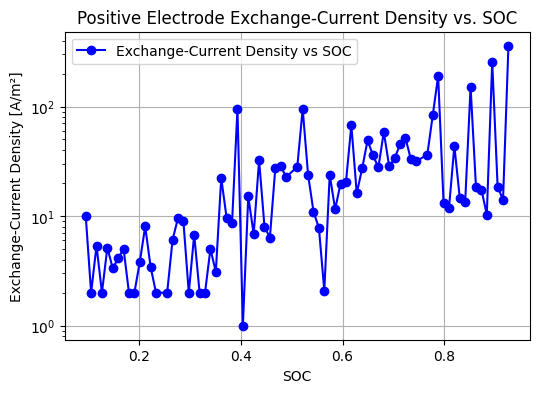

Min Exchange-Current Density: 1.0
Max Exchange-Current Density: 358.52350107170014


In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path
sys.path.append(r'C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')
from initial_cell_soc_list import initial_cell_soc_list

# Folder containing all the results folders
results_folder = r'D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full\4_params'

# Initialize lists to store pulse numbers, exchange-current density values, and SOC values
pulse_numbers = []
exchange_current_density_values = []
soc_values = []

# Regex pattern to extract the pulse number from the folder name
pulse_pattern = re.compile(r'results_pulse_(\d+)')

# Loop through each folder in the results directory
for folder_name in os.listdir(results_folder):
    folder_path = os.path.join(results_folder, folder_name)

    # Check if the folder is a result folder (containing 'results_pulse_' in the name)
    if os.path.isdir(folder_path) and folder_name.startswith("results_pulse_"):
        # Extract the pulse number from the folder name using regex
        match = pulse_pattern.search(folder_name)
        if match:
            pulse_number = int(match.group(1))  # Extracted pulse number
            pulse_numbers.append(pulse_number)

            # Link the SOC value from the imported list to the pulse number
            if pulse_number < len(initial_cell_soc_list):
                soc_values.append(initial_cell_soc_list[pulse_number])

            # Path to the parameter file
            param_file_path = os.path.join(folder_path, 'fitted_parameters.txt')

            # Check if the parameter file exists
            if os.path.exists(param_file_path):
                with open(param_file_path, 'r') as f:
                    lines = f.readlines()

                    # Look for the desired parameters in the file
                    for line in lines:
                        if "Positive electrode exchange-current density" in line:
                            exchange_current_density = float(line.split(':')[-1].strip())
                            exchange_current_density_values.append(exchange_current_density)

                    # Append parameter values to the corresponding folder
                    output_file_path = os.path.join(folder_path, 'extracted_parameters.txt')
                    with open(output_file_path, 'w') as out_file:
                        out_file.write(f"Pulse Number: {pulse_number}\n")
                        out_file.write(f"SOC: {initial_cell_soc_list[pulse_number]}\n")
                        out_file.write(f"Exchange-Current Density: {exchange_current_density}\n")

# Ensure the pulse numbers, exchange-current density values, and SOC values are sorted based on the pulse number
sorted_data = sorted(zip(pulse_numbers, exchange_current_density_values, soc_values))
pulse_numbers, exchange_current_density_values, soc_values = zip(*sorted_data)

# Plot Positive electrode exchange-current density vs. SOC
plt.figure(figsize=(6, 4))
plt.plot(soc_values, exchange_current_density_values, 'bo-', label="Exchange-Current Density vs SOC")
plt.xlabel('SOC')
plt.ylabel('Exchange-Current Density [A/m²]')
plt.title('Positive Electrode Exchange-Current Density vs. SOC')
plt.yscale('log')
plt.legend()
plt.grid(True)

# Save the figure
#plt.savefig(r'C:\Users\mugi_jo\Documents\DLR_PROJECTS\basf-raw-synthetic-positive-3ele-realist\4_params\Exchange_Current_Density_vs_SOC.png', dpi=300)

# Show the plot
plt.show()

# Optional: Print the min and max values of exchange-current density
print(f"Min Exchange-Current Density: {min(exchange_current_density_values)}")
print(f"Max Exchange-Current Density: {max(exchange_current_density_values)}")


Record created: GITT Data Analysis with ID: 8819


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)
c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Uploaded D:\DLR_Projects\pulse_test2\results\soc_analysis\Exchange_Current_Density_vs_SOC.png successfully.
Uploaded D:\DLR_Projects\pulse_test2\results\results_pulse_80\fitted_parameters.txt successfully.
Failed to initiate upload: {"code":409,"description":"A file with that name already exists.","file":{"_actions":{"delete":"https://kadi-dlr.hiu-batteries.de/api/records/8819/files/7ef4fb9e-2756-4953-b125-e11fc4060c77","edit_data":"https://kadi-dlr.hiu-batteries.de/api/records/8819/files/7ef4fb9e-2756-4953-b125-e11fc4060c77","edit_metadata":"https://kadi-dlr.hiu-batteries.de/api/records/8819/files/7ef4fb9e-2756-4953-b125-e11fc4060c77"},"_links":{"download":"https://kadi-dlr.hiu-batteries.de/api/records/8819/files/7ef4fb9e-2756-4953-b125-e11fc4060c77/download","record":"https://kadi-dlr.hiu-batteries.de/api/records/8819","self":"https://kadi-dlr.hiu-batteries.de/api/records/8819/files/7ef4fb9e-2756-4953-b125-e11fc4060c77","view":"https://kadi-dlr.hiu-batteries.de/records/8819/files/7ef

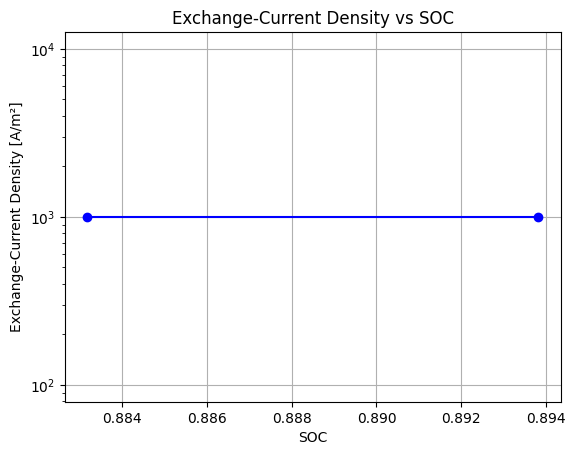

In [10]:
import os
import sys
from pathlib import Path
import logging
from logging.handlers import RotatingFileHandler
import requests
import pandas as pd
import matplotlib.pyplot as plt
import uuid
import re
import pybop
import pybamm

# Import custom modules
# from initial_cell_soc_list import initial_cell_soc_list
# from extract_model import get_model_data
# from basf_gitt_test_cell import get_basf_gitt_test_cell_parameters
sys.path.append(r'C:\Users\John\Desktop\import\Pybop\pybop\plotting')
from extract_model import get_model_data
# Load custom parameters
sys.path.append(r'C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')
from initial_cell_soc_list import initial_cell_soc_list
from basf_gitt_test_cell import get_basf_gitt_test_cell_parameters

# Configure logging
handler = RotatingFileHandler('workflow_log.log', maxBytes=5 * 1024 * 1024, backupCount=5)
logging.basicConfig(
    handlers=[handler],
    level=logging.INFO,
    format='%(asctime)s:%(levelname)s:%(message)s'
)

# Kadi4Mat API Setup
API_KEY = 'pat_a47c4e70daeb3fed8eaddeb1aca721e2c5946c42b5812922'
BASE_URL = 'https://kadi-dlr.hiu-batteries.de/api'
HEADERS = {'Authorization': f'Bearer {API_KEY}', 'Content-Type': 'application/json'}

# Folder paths
DATA_FOLDER = Path(r'D:\DLR_Projects\pulse_test2')
RESULTS_FOLDER = DATA_FOLDER / 'results'
SOC_ANALYSIS_FOLDER = RESULTS_FOLDER / 'soc_analysis'
RESULTS_FOLDER.mkdir(exist_ok=True, parents=True)
SOC_ANALYSIS_FOLDER.mkdir(exist_ok=True, parents=True)

# Function: Initialize Kadi4Mat Record
def initialize_kadi4mat_record(record_name, record_description):
    # Convert the record name to lowercase and replace invalid characters
    sanitized_record_name = re.sub(r'[^a-z0-9_-]', '_', record_name.lower())
    unique_identifier = f"{sanitized_record_name[:40]}_{uuid.uuid4().hex[:8]}"
    
    url = f"{BASE_URL}/records"
    data = {
        "identifier": unique_identifier,
        "title": record_name,
        "description": record_description
    }
    response = requests.post(url, headers=HEADERS, json=data)
    
    if response.status_code == 201:
        record_id = response.json().get('id')
        print(f"Record created: {record_name} with ID: {record_id}")
        return record_id
    else:
        print(f"Failed to create record: {response.text}")
        return None


def upload_to_kadi4mat(record_id, file_path):
    """Upload a file to Kadi4Mat record."""
    file_name = os.path.basename(file_path)
    file_size = os.path.getsize(file_path)
    # Initiate upload
    url = f"{BASE_URL}/records/{record_id}/uploads"
    data = {"name": file_name, "size": file_size}
    response = requests.post(url, headers=HEADERS, json=data)
    if response.status_code != 201:
        print(f"Failed to initiate upload: {response.text}")
        return
    upload_info = response.json()
    upload_url = upload_info["_actions"]["upload_data"]
    # Perform upload
    with open(file_path, 'rb') as f:
        response = requests.put(upload_url, headers=HEADERS, data=f)
    if response.status_code in [200, 201]:
        print(f"Uploaded {file_path} successfully.")
    else:
        print(f"Failed to upload file: {response.text}")

# Function: Process Pulse
def process_pulse(data_file, pulse_number):
    data_path = DATA_FOLDER / data_file
    data = pd.read_csv(data_path)[:7000]
    time_data = data.iloc[:, 0].values - data.iloc[0, 0]
    voltage_data = data.iloc[:, 4].values
    current_data = data.iloc[:, 1].values
    dataset = pybop.Dataset({
        "Time [s]": time_data,
        "Current function [A]": current_data,
        "Voltage [V]": voltage_data
    })
    initial_soc = initial_cell_soc_list[pulse_number]
    parameters = get_basf_gitt_test_cell_parameters(initial_soc)
    parameter_values = pybamm.ParameterValues(parameters)
    model = pybop.lithium_ion.DFN(parameter_set=parameter_values)
    model.solver = pybamm.CasadiSolver(atol=1e-3, rtol=1e-3, mode="safe")
    parameters_list = [
        pybop.Parameter(
            "Positive electrode exchange-current density [A.m-2]",
            prior=pybop.Gaussian(1, 5), bounds=[1, 1000],
            true_value=parameter_values["Positive electrode exchange-current density [A.m-2]"]
        )
    ]
    problem = pybop.FittingProblem(
        model, parameters_list, dataset,
        signal=["Voltage [V]"], parameter_values=parameter_values
    )
    optim = pybop.Optimisation(
        cost=pybop.RootMeanSquaredError(problem),
        optimiser=pybop.SciPyMinimize,
        options={'maxiter': 100, 'tol': 1e-3}
    )
    x, _ = optim.run()
    x_dict = dict(zip([p.name for p in parameters_list], x))
    result_folder = RESULTS_FOLDER / f"results_pulse_{pulse_number}"
    result_folder.mkdir(exist_ok=True)
    with open(result_folder / "fitted_parameters.txt", 'w') as f:
        for param_name, param_value in x_dict.items():
            f.write(f"{param_name}: {param_value}\n")
    return x_dict

# Function: Plot SoC Parameters
def plot_soc_parameters():
    pulse_numbers, soc_values, exchange_current_densities = [], [], []
    for folder_name in os.listdir(RESULTS_FOLDER):
        if folder_name.startswith("results_pulse_"):
            pulse_number = int(folder_name.split('_')[-1])
            pulse_numbers.append(pulse_number)
            soc_values.append(initial_cell_soc_list[pulse_number])
            param_file = RESULTS_FOLDER / folder_name / "fitted_parameters.txt"
            if param_file.exists():
                with open(param_file) as f:
                    for line in f:
                        if "Positive electrode exchange-current density" in line:
                            value = float(line.split(':')[-1].strip())
                            exchange_current_densities.append(value)
    plt.plot(soc_values, exchange_current_densities, 'bo-')
    plt.xlabel('SOC')
    plt.ylabel('Exchange-Current Density [A/m²]')
    plt.yscale('log')
    plt.title('Exchange-Current Density vs SOC')
    plt.grid(True)
    plot_path = SOC_ANALYSIS_FOLDER / "Exchange_Current_Density_vs_SOC.png"
    plt.savefig(plot_path)
    return plot_path

# Main Workflow
def main():
    record_name = "GITT Data Analysis"
    record_description = "Fitting and SOC parameter analysis for GITT data."
    record_id = initialize_kadi4mat_record(record_name, record_description)
    if not record_id:
        print("Failed to create Kadi4Mat record. Exiting.")
        return
    for data_file in os.listdir(DATA_FOLDER):
        if data_file.endswith('.csv'):
            pulse_number = int(data_file.split('_')[-1].split('.')[0])
            process_pulse(data_file, pulse_number)
    plot_path = plot_soc_parameters()
    upload_to_kadi4mat(record_id, plot_path)
    for folder_name in os.listdir(RESULTS_FOLDER):
        if folder_name.startswith("results_pulse_"):
            for file_name in os.listdir(RESULTS_FOLDER / folder_name):
                file_path = RESULTS_FOLDER / folder_name / file_name
                upload_to_kadi4mat(record_id, file_path)

if __name__ == "__main__":
    main()


In [ ]:
##simulating and saving plots in Kadi4mat directly
##caution
##this code stops when pulse have initial infinite cost function
import os
import sys
from pathlib import Path
import logging
from logging.handlers import RotatingFileHandler
import requests
import pandas as pd
import matplotlib.pyplot as plt
import uuid
import re
import pybop
import pybamm
from datetime import datetime

# Import custom modules
sys.path.append(r'C:\Users\John\Desktop\import\Pybop\pybop\plotting')
from extract_model import get_model_data
sys.path.append(r'C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')
from initial_cell_soc_list import initial_cell_soc_list
from basf_gitt_test_cell import get_basf_gitt_test_cell_parameters

# Configure logging
handler = RotatingFileHandler('workflow_log.log', maxBytes=5 * 1024 * 1024, backupCount=5)
logging.basicConfig(
    handlers=[handler],
    level=logging.INFO,
    format='%(asctime)s:%(levelname)s:%(message)s'
)

# Kadi4Mat API Setup
API_KEY = 'pat_a47c4e70daeb3fed8eaddeb1aca721e2c5946c42b5812922'
BASE_URL = 'https://kadi-dlr.hiu-batteries.de/api'
HEADERS = {'Authorization': f'Bearer {API_KEY}', 'Content-Type': 'application/json'}

# Folder paths
DATA_FOLDER = Path(r'D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full')
RESULTS_FOLDER = DATA_FOLDER / 'results'
SOC_ANALYSIS_FOLDER = RESULTS_FOLDER / 'soc_analysis'
RESULTS_FOLDER.mkdir(exist_ok=True, parents=True)
SOC_ANALYSIS_FOLDER.mkdir(exist_ok=True, parents=True)

# Function: Initialize Kadi4Mat Record
def initialize_kadi4mat_record(record_name, record_description):
    sanitized_record_name = re.sub(r'[^a-z0-9_-]', '_', record_name.lower())
    unique_identifier = f"{sanitized_record_name[:40]}_{uuid.uuid4().hex[:8]}"
    
    url = f"{BASE_URL}/records"
    data = {
        "identifier": unique_identifier,
        "title": record_name,
        "description": record_description
    }
    response = requests.post(url, headers=HEADERS, json=data)
    
    if response.status_code == 201:
        record_id = response.json().get('id')
        print(f"Record created: {record_name} with ID: {record_id}")
        return record_id
    else:
        print(f"Failed to create record: {response.text}")
        return None

# Function: Upload to Kadi4Mat with Unique File Names
def upload_to_kadi4mat(record_id, file_path):
    file_name = os.path.basename(file_path)
    file_size = os.path.getsize(file_path)
    unique_file_name = f"{Path(file_name).stem}_{datetime.now().strftime('%Y%m%d%H%M%S')}{Path(file_name).suffix}"
    data = {"name": unique_file_name, "size": file_size}
    
    url = f"{BASE_URL}/records/{record_id}/uploads"
    response = requests.post(url, headers=HEADERS, json=data)
    if response.status_code != 201:
        print(f"Failed to initiate upload: {response.text}")
        return
    upload_info = response.json()
    upload_url = upload_info["_actions"]["upload_data"]
    with open(file_path, 'rb') as f:
        response = requests.put(upload_url, headers=HEADERS, data=f)
    if response.status_code in [200, 201]:
        print(f"Uploaded {file_path} successfully as {unique_file_name}.")
    else:
        print(f"Failed to upload file: {response.text}")

# Function: Process Pulse
def process_pulse(data_file, pulse_number):
    data_path = DATA_FOLDER / data_file
    data = pd.read_csv(data_path)[:9000]
    time_data = data.iloc[:, 0].values - data.iloc[0, 0]
    voltage_data = data.iloc[:, 4].values
    current_data = data.iloc[:, 1].values
    dataset = pybop.Dataset({
        "Time [s]": time_data,
        "Current function [A]": current_data,
        "Voltage [V]": voltage_data
    })
    initial_soc = initial_cell_soc_list[pulse_number]
    parameters = get_basf_gitt_test_cell_parameters(initial_soc)
    parameter_values = pybamm.ParameterValues(parameters)
    model = pybop.lithium_ion.DFN(parameter_set=parameter_values)
    model.solver = pybamm.CasadiSolver(atol=1e-3, rtol=1e-3, mode="safe")

    # Set up optimization parameters
    parameters_list = [
        # pybop.Parameter(
        #     "Positive electrode Bruggeman coefficient (electrode)",
        #     prior=pybop.Gaussian(2.8, 3.5),
        #     bounds=[1.8, 4.2],
        #     true_value=parameter_values["Positive electrode Bruggeman coefficient (electrode)"],
        #     ),
        # pybop.Parameter(
        #     "Cation transference number",
        #     prior=pybop.Gaussian(0.3, 0.35),
        #     bounds=[0.2, 0.4],
        #     true_value=parameter_values["Cation transference number"],
        # ),
        pybop.Parameter(
            "Positive particle diffusivity [m2.s-1]",
            prior=pybop.Gaussian(5e-14, 1e-13),
            bounds=[1e-16, 1e-11],
            true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
        ),
        pybop.Parameter(
            "Positive electrode exchange-current density [A.m-2]",
            prior=pybop.Gaussian(1, 5),  # Initial guess is 1e-3 A/m² with some uncertainty
            bounds=[1e0, 1e4],  # Bounds based on typical literature values for lithium electrodes
            true_value=parameter_values["Positive electrode exchange-current density [A.m-2]"],  # Default true value
        ), 
    ]
    problem = pybop.FittingProblem(
        model, parameters_list, dataset,
        signal=["Voltage [V]"], parameter_values=parameter_values
    )
    optim = pybop.Optimisation(
        cost=pybop.RootMeanSquaredError(problem),
        optimiser=pybop.SciPyMinimize,
        options={'maxiter': 100, 'tol': 1e-3}
    )
    x, _ = optim.run()
    x_dict = dict(zip([p.name for p in parameters_list], x))
    result_folder = RESULTS_FOLDER / f"results_pulse_{pulse_number}"
    result_folder.mkdir(exist_ok=True)
    # Save fitted parameters
    param_file_path = result_folder / f"fitted_parameters_pulse_{pulse_number}.txt"
    with open(param_file_path, 'w') as f:
        for param_name, param_value in x_dict.items():
            f.write(f"{param_name}: {param_value}\n")
    # Generate and save plots
    data_output_optimized = get_model_data(problem, parameter_values=x_dict)
    plt.figure(figsize=(10, 6))
    plt.plot(dataset["Time [s]"], dataset["Voltage [V]"], 'b-', label='Experimental Data')
    plt.plot(data_output_optimized["Time [s]"], data_output_optimized["Voltage [V]"], 'r-', label='Optimized Model')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.legend()
    plt.grid(True)
    plot_file_path = result_folder / f"time_vs_voltage_pulse_{pulse_number}.png"
    plt.savefig(plot_file_path, dpi=300)
    plt.close()
    return param_file_path, plot_file_path

# Function: Plot SoC Parameters
def plot_soc_parameters():
    pulse_numbers, soc_values, exchange_current_densities, particle_diffusivities = [], [], [], []
    
    # Iterate through result folders
    for folder_name in os.listdir(RESULTS_FOLDER):
        if folder_name.startswith("results_pulse_"):
            pulse_number = int(folder_name.split('_')[-1])
            pulse_numbers.append(pulse_number)
            soc_values.append(initial_cell_soc_list[pulse_number])
            param_file = RESULTS_FOLDER / folder_name / f"fitted_parameters_pulse_{pulse_number}.txt"
            if param_file.exists():
                with open(param_file) as f:
                    for line in f:
                        if "Positive electrode exchange-current density" in line:
                            exchange_current_density = float(line.split(':')[-1].strip())
                            exchange_current_densities.append(exchange_current_density)
                        if "Positive particle diffusivity [m2.s-1]" in line:
                            particle_diffusivity = float(line.split(':')[-1].strip())
                            particle_diffusivities.append(particle_diffusivity)
    
    # Plot SOC vs Exchange-Current Density
    plt.figure(figsize=(8, 6))
    plt.plot(soc_values, exchange_current_densities, 'bo-', label="Exchange-Current Density vs SOC")
    plt.xlabel('SOC')
    plt.ylabel('Exchange-Current Density [A/m²]')
    plt.yscale('log')
    plt.title('Exchange-Current Density vs SOC')
    plt.legend()
    plt.grid(True)
    exchange_plot_path = SOC_ANALYSIS_FOLDER / "Exchange_Current_Density_vs_SOC.png"
    plt.savefig(exchange_plot_path)
    plt.close()
    print(f"Exchange-Current Density plot saved at: {exchange_plot_path}")

    # Plot SOC vs Positive Particle Diffusivity
    plt.figure(figsize=(8, 6))
    plt.plot(soc_values, particle_diffusivities, 'ro-', label="Particle Diffusivity vs SOC")
    plt.xlabel('SOC')
    plt.ylabel('Positive Particle Diffusivity [m²/s]')
    plt.yscale('log')
    plt.title('Positive Particle Diffusivity vs SOC')
    plt.legend()
    plt.grid(True)
    diffusivity_plot_path = SOC_ANALYSIS_FOLDER / "Particle_Diffusivity_vs_SOC.png"
    plt.savefig(diffusivity_plot_path)
    plt.close()
    print(f"Particle Diffusivity plot saved at: {diffusivity_plot_path}")

    # Return both plot paths
    return exchange_plot_path, diffusivity_plot_path

# Main Workflow
def main():
    record_name = "BASF__GITT_raw_synthetic_positive_three_electrode_realistic_data"
    record_description = "Fitting two parameters: Exchange-Current Density and Positive Particle Diffusivity ."
    record_id = initialize_kadi4mat_record(record_name, record_description)
    if not record_id:
        print("Failed to create Kadi4Mat record. Exiting.")
        return
    
    # Process each pulse
    for data_file in os.listdir(DATA_FOLDER):
        if data_file.endswith('.csv'):
            pulse_number = int(data_file.split('_')[-1].split('.')[0])
            param_file, plot_file = process_pulse(data_file, pulse_number)
            upload_to_kadi4mat(record_id, param_file)
            upload_to_kadi4mat(record_id, plot_file)
    
    # Generate and upload the SOC parameters plots
    exchange_plot_path, diffusivity_plot_path = plot_soc_parameters()
    upload_to_kadi4mat(record_id, exchange_plot_path)
    upload_to_kadi4mat(record_id, diffusivity_plot_path)

if __name__ == "__main__":
    main()


Record created: BASF__GITT_raw_synthetic_positive_three_electrode_realistic_data with ID: 8879


ModelError: initial condition is outside of variable bounds (Scalar(-0x6a9f3317bd7df138, 0.0, children=[], domains={}), Scalar(0x6868646306476b11, Maximum concentration in positive electrode [mol.m-3], children=[], domains={})) for variable 'Positive particle concentration [mol.m-3]'.

Record created: BASF__GITT_raw_synthetic_positive_three_electrode_realistic_data with ID: 8888


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Unexpected error in processing pulse 60: x and y must have same first dimension, but have shapes (7500,) and (1,)
Skipping upload for pulse 60: No parameter file generated.
Skipping upload for pulse 60: No plot file generated.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Unexpected error in processing pulse 61: x and y must have same first dimension, but have shapes (7500,) and (1,)
Skipping upload for pulse 61: No parameter file generated.
Skipping upload for pulse 61: No plot file generated.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Unexpected error in processing pulse 80: x and y must have same first dimension, but have shapes (7500,) and (1,)
Skipping upload for pulse 80: No parameter file generated.
Skipping upload for pulse 80: No plot file generated.


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Unexpected error in processing pulse 81: x and y must have same first dimension, but have shapes (7500,) and (1,)
Skipping upload for pulse 81: No parameter file generated.
Skipping upload for pulse 81: No plot file generated.
Exchange-Current Density plot saved at: D:\DLR_Projects\pulse_test2\results\soc_analysis\Exchange_Current_Density_vs_SOC.png
Particle Diffusivity plot saved at: D:\DLR_Projects\pulse_test2\results\soc_analysis\Particle_Diffusivity_vs_SOC.png
Uploaded D:\DLR_Projects\pulse_test2\results\soc_analysis\Exchange_Current_Density_vs_SOC.png successfully as Exchange_Current_Density_vs_SOC_20250111143437.png.
Uploaded D:\DLR_Projects\pulse_test2\results\soc_analysis\Particle_Diffusivity_vs_SOC.png successfully as Particle_Diffusivity_vs_SOC_20250111143444.png.


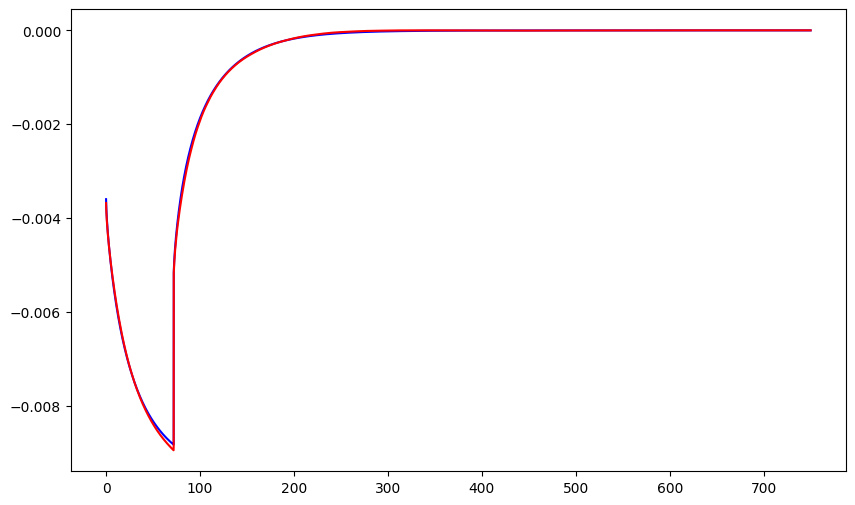

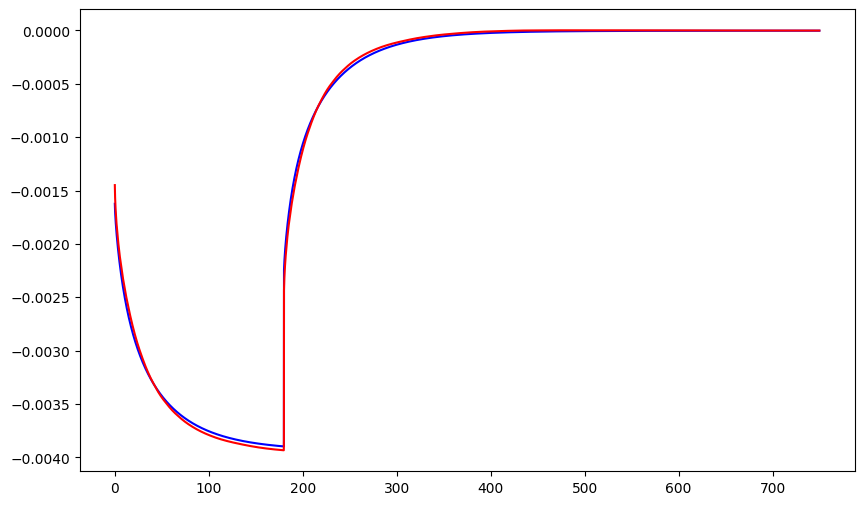

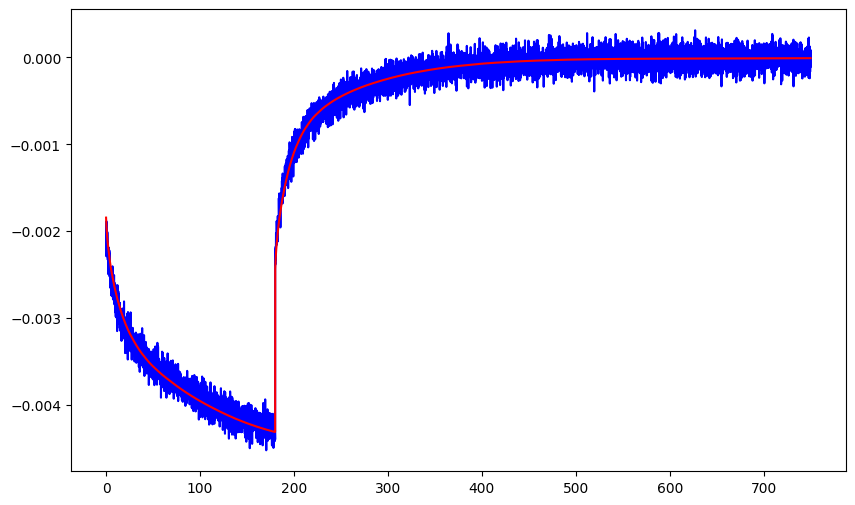

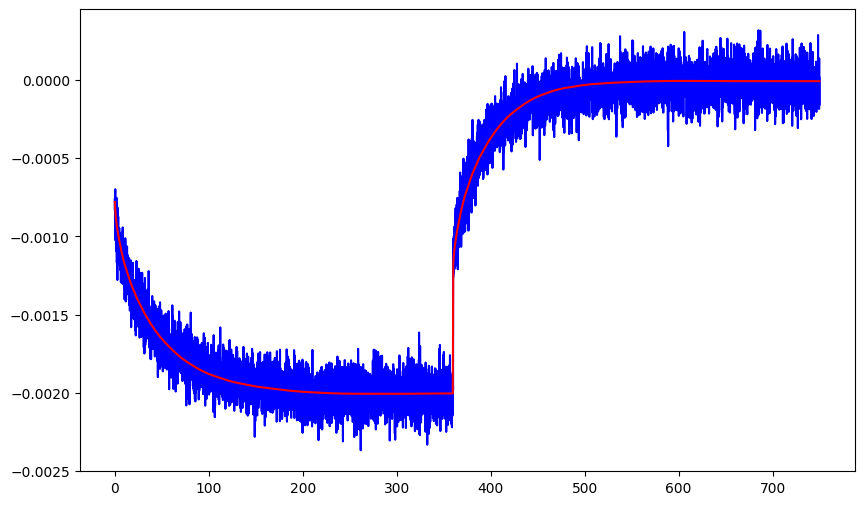

In [ ]:
##simulating and saving plots in Kadi4mat directly
##caution
##this code stops when pulse have initial infinite cost function
import os
import sys
from pathlib import Path
import logging
from logging.handlers import RotatingFileHandler
import requests
import pandas as pd
import matplotlib.pyplot as plt
import uuid
import re
import pybop
import pybamm
from datetime import datetime
from pybamm import ModelError

# Import custom modules
sys.path.append(r'C:\Users\John\Desktop\import\Pybop\pybop\plotting')
from extract_model import get_model_data
sys.path.append(r'C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')
from initial_cell_soc_list import initial_cell_soc_list
from basf_gitt_test_cell import get_basf_gitt_test_cell_parameters

# Configure logging
handler = RotatingFileHandler('workflow_log.log', maxBytes=5 * 1024 * 1024, backupCount=5)
logging.basicConfig(
    handlers=[handler],
    level=logging.INFO,
    format='%(asctime)s:%(levelname)s:%(message)s'
)

# Kadi4Mat API Setup
API_KEY = 'pat_a47c4e70daeb3fed8eaddeb1aca721e2c5946c42b5812922'
BASE_URL = 'https://kadi-dlr.hiu-batteries.de/api'
HEADERS = {'Authorization': f'Bearer {API_KEY}', 'Content-Type': 'application/json'}


# Folder paths
#DATA_FOLDER = Path(r'D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full')
DATA_FOLDER = Path(r'D:\DLR_Projects\pulse_test2')
RESULTS_FOLDER = DATA_FOLDER / 'results'
SOC_ANALYSIS_FOLDER = RESULTS_FOLDER / 'soc_analysis'
RESULTS_FOLDER.mkdir(exist_ok=True, parents=True)
SOC_ANALYSIS_FOLDER.mkdir(exist_ok=True, parents=True)

# Function: Initialize Kadi4Mat Record
def initialize_kadi4mat_record(record_name, record_description):
    sanitized_record_name = re.sub(r'[^a-z0-9_-]', '_', record_name.lower())
    unique_identifier = f"{sanitized_record_name[:40]}_{uuid.uuid4().hex[:8]}"
    
    url = f"{BASE_URL}/records"
    data = {
        "identifier": unique_identifier,
        "title": record_name,
        "description": record_description
    }
    response = requests.post(url, headers=HEADERS, json=data)
    
    if response.status_code == 201:
        record_id = response.json().get('id')
        print(f"Record created: {record_name} with ID: {record_id}")
        return record_id
    else:
        print(f"Failed to create record: {response.text}")
        return None

# Function: Upload to Kadi4Mat with Unique File Names
def upload_to_kadi4mat(record_id, file_path):
    file_name = os.path.basename(file_path)
    file_size = os.path.getsize(file_path)
    unique_file_name = f"{Path(file_name).stem}_{datetime.now().strftime('%Y%m%d%H%M%S')}{Path(file_name).suffix}"
    data = {"name": unique_file_name, "size": file_size}
    
    url = f"{BASE_URL}/records/{record_id}/uploads"
    response = requests.post(url, headers=HEADERS, json=data)
    if response.status_code != 201:
        print(f"Failed to initiate upload: {response.text}")
        return
    upload_info = response.json()
    upload_url = upload_info["_actions"]["upload_data"]
    with open(file_path, 'rb') as f:
        response = requests.put(upload_url, headers=HEADERS, data=f)
    if response.status_code in [200, 201]:
        print(f"Uploaded {file_path} successfully as {unique_file_name}.")
    else:
        print(f"Failed to upload file: {response.text}")

# Function: Process Pulse
def process_pulse(data_file, pulse_number):
    try:   
        data_path = DATA_FOLDER / data_file
        data = pd.read_csv(data_path)[:500]
        time_data = data.iloc[:, 0].values - data.iloc[0, 0]
        voltage_data = data.iloc[:, 4].values
        current_data = data.iloc[:, 1].values
        dataset = pybop.Dataset({
            "Time [s]": time_data,
            "Current function [A]": current_data,
            "Voltage [V]": voltage_data
        })
        initial_soc = initial_cell_soc_list[pulse_number]
        parameters = get_basf_gitt_test_cell_parameters(initial_soc)
        parameter_values = pybamm.ParameterValues(parameters)
        model = pybop.lithium_ion.DFN(parameter_set=parameter_values)
        model.solver = pybamm.CasadiSolver(atol=1e-3, rtol=1e-3, mode="safe")

        # Set up optimization parameters
        parameters_list = [
            # pybop.Parameter(
            #     "Positive electrode Bruggeman coefficient (electrode)",
            #     prior=pybop.Gaussian(2.8, 3.5),
            #     bounds=[1.8, 4.2],
            #     true_value=parameter_values["Positive electrode Bruggeman coefficient (electrode)"],
            #     ),
            # pybop.Parameter(
            #     "Cation transference number",
            #     prior=pybop.Gaussian(0.3, 0.35),
            #     bounds=[0.2, 0.4],
            #     true_value=parameter_values["Cation transference number"],
            # ),
            pybop.Parameter(
                "Positive particle diffusivity [m2.s-1]",
                prior=pybop.Gaussian(5e-14, 1e-13),
                bounds=[1e-16, 1e-11],
                true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
            ),
            pybop.Parameter(
                "Positive electrode exchange-current density [A.m-2]",
                prior=pybop.Gaussian(1, 5),  # Initial guess is 1e-3 A/m² with some uncertainty
                bounds=[1e0, 1e4],  # Bounds based on typical literature values for lithium electrodes
                true_value=parameter_values["Positive electrode exchange-current density [A.m-2]"],  # Default true value
            ), 
        ]
        problem = pybop.FittingProblem(
            model, parameters_list, dataset,
            signal=["Voltage [V]"], parameter_values=parameter_values
        )
        optim = pybop.Optimisation(
            cost=pybop.RootMeanSquaredError(problem),
            optimiser=pybop.SciPyMinimize,
            options={'maxiter': 50, 'tol': 1e-3}
        )
        x, _ = optim.run()
        x_dict = dict(zip([p.name for p in parameters_list], x))
        result_folder = RESULTS_FOLDER / f"results_pulse_{pulse_number}"
        result_folder.mkdir(exist_ok=True)
        # Save fitted parameters
        param_file_path = result_folder / f"fitted_parameters_pulse_{pulse_number}.txt"
        with open(param_file_path, 'w') as f:
            for param_name, param_value in x_dict.items():
                f.write(f"{param_name}: {param_value}\n")
        # Generate and save plots
        data_output_optimized = get_model_data(problem, parameter_values=x_dict)
        data_output_initial= get_model_data(problem, parameter_values=parameter_values)
        plt.figure(figsize=(8, 6))
        plt.plot(dataset["Time [s]"], dataset["Voltage [V]"], 'b-', label='Experimental Data')
        plt.plot(data_output_optimized["Time [s]"], data_output_optimized["Voltage [V]"], 'r-', label='Optimized Model')
        plt.plot(data_output_initial["Time [s]"], data_output_initial["Voltage [V]"], 'k--', label='Initial Model')
        plt.xlabel('Time (s)')
        plt.ylabel('Overpotential (V)')
        plt.title(f'Pulse Number {pulse_number}')
        plt.legend()
        plt.grid(True)
        plot_file_path = result_folder / f"time_vs_voltage_pulse_{pulse_number}.png"
        plt.savefig(plot_file_path, dpi=300)
        plt.close()
        return param_file_path, plot_file_path
   
    except pybamm.ModelError as e:
        logging.warning(f"Skipping pulse {pulse_number} due to model error: {str(e)}")
        print(f"Skipping pulse {pulse_number} due to model error: {str(e)}")
        return None, None
    except Exception as e:
        logging.error(f"Unexpected error in processing pulse {pulse_number}: {str(e)}")
        print(f"Unexpected error in processing pulse {pulse_number}: {str(e)}")
        return None, None

# Function: Plot SoC Parameters
def plot_soc_parameters():
    pulse_numbers, soc_values, exchange_current_densities, particle_diffusivities = [], [], [], []
    
    # Iterate through result folders
    for folder_name in os.listdir(RESULTS_FOLDER):
        if folder_name.startswith("results_pulse_"):
            pulse_number = int(folder_name.split('_')[-1])
            pulse_numbers.append(pulse_number)
            soc_values.append(initial_cell_soc_list[pulse_number])
            param_file = RESULTS_FOLDER / folder_name / f"fitted_parameters_pulse_{pulse_number}.txt"
            if param_file.exists():
                with open(param_file) as f:
                    for line in f:
                        if "Positive electrode exchange-current density" in line:
                            exchange_current_density = float(line.split(':')[-1].strip())
                            exchange_current_densities.append(exchange_current_density)
                        if "Positive particle diffusivity [m2.s-1]" in line:
                            particle_diffusivity = float(line.split(':')[-1].strip())
                            particle_diffusivities.append(particle_diffusivity)
    
    # Plot SOC vs Exchange-Current Density
    plt.figure(figsize=(8, 6))
    plt.plot(soc_values, exchange_current_densities, 'bo-', label="Exchange-Current Density vs SOC")
    plt.xlabel('SOC')
    plt.ylabel('Exchange-Current Density [A/m²]')
    plt.yscale('log')
    plt.title('Exchange-Current Density vs SOC')
    plt.legend()
    plt.grid(True)
    exchange_plot_path = SOC_ANALYSIS_FOLDER / "Exchange_Current_Density_vs_SOC.png"
    plt.savefig(exchange_plot_path)
    plt.close()
    print(f"Exchange-Current Density plot saved at: {exchange_plot_path}")

    # Plot SOC vs Positive Particle Diffusivity
    plt.figure(figsize=(6, 4))
    plt.plot(soc_values, particle_diffusivities, 'ro-', label="Particle Diffusivity vs SOC")
    plt.xlabel('SOC')
    plt.ylabel('Positive Particle Diffusivity [m²/s]')
    plt.yscale('log')
    plt.title('Positive Particle Diffusivity vs SOC')
    plt.legend()
    plt.grid(True)
    diffusivity_plot_path = SOC_ANALYSIS_FOLDER / "Particle_Diffusivity_vs_SOC.png"
    plt.savefig(diffusivity_plot_path)
    plt.close()
    print(f"Particle Diffusivity plot saved at: {diffusivity_plot_path}")

    # Return both plot paths
    return exchange_plot_path, diffusivity_plot_path

# Main Workflow
# Main Workflow
def main():
    record_name = "BASF__GITT_raw_synthetic_positive_three_electrode_realistic_data"
    record_description = "Fitting two parameters: Exchange-Current Density and Positive Particle Diffusivity."
    record_id = initialize_kadi4mat_record(record_name, record_description)
    if not record_id:
        print("Failed to create Kadi4Mat record. Exiting.")
        return
    
    # Process each pulse
    for data_file in os.listdir(DATA_FOLDER):
        if data_file.endswith('.csv'):
            pulse_number = int(data_file.split('_')[-1].split('.')[0])
            param_file, plot_file = process_pulse(data_file, pulse_number)
            
            # Only upload if the files are not None
            if param_file:
                upload_to_kadi4mat(record_id, param_file)
            else:
                print(f"Skipping upload for pulse {pulse_number}: No parameter file generated.")
            
            if plot_file:
                upload_to_kadi4mat(record_id, plot_file)
            else:
                print(f"Skipping upload for pulse {pulse_number}: No plot file generated.")
    
    # Generate and upload the SOC parameters plots
    exchange_plot_path, diffusivity_plot_path = plot_soc_parameters()
    if exchange_plot_path:
        upload_to_kadi4mat(record_id, exchange_plot_path)
    if diffusivity_plot_path:
        upload_to_kadi4mat(record_id, diffusivity_plot_path)


if __name__ == "__main__":
    main()


In [ ]:
##simulating and saving plots in Kadi4mat directly
##caution
##this code stops when pulse have initial infinite cost function
import os
import sys
from pathlib import Path
import logging
from logging.handlers import RotatingFileHandler
import requests
import pandas as pd
import matplotlib.pyplot as plt
import uuid
import re
import pybop
import pybamm
from datetime import datetime
from pybamm import ModelError

# Import custom modules
sys.path.append(r'C:\Users\John\Desktop\import\Pybop\pybop\plotting')
from extract_model import get_model_data
sys.path.append(r'C:/Users/John/Desktop/import/Pybop/Lib/site-packages/pybamm/input/parameters/lithium_ion')
from initial_cell_soc_list import initial_cell_soc_list
from basf_gitt_test_cell import get_basf_gitt_test_cell_parameters

# Configure logging
handler = RotatingFileHandler('workflow_log.log', maxBytes=5 * 1024 * 1024, backupCount=5)
logging.basicConfig(
    handlers=[handler],
    level=logging.INFO,
    format='%(asctime)s:%(levelname)s:%(message)s'
)

# Kadi4Mat API Setup
API_KEY = 'pat_a47c4e70daeb3fed8eaddeb1aca721e2c5946c42b5812922'
BASE_URL = 'https://kadi-dlr.hiu-batteries.de/api'
HEADERS = {'Authorization': f'Bearer {API_KEY}', 'Content-Type': 'application/json'}


# Folder paths
#DATA_FOLDER = Path(r'D:\DLR_Projects\BASF_raw_synthetic_positive_three_electrode_realistic_data_full')
DATA_FOLDER = Path(r'D:\DLR_Projects\pulse_test2')
RESULTS_FOLDER = DATA_FOLDER / 'results'
SOC_ANALYSIS_FOLDER = RESULTS_FOLDER / 'soc_analysis'
RESULTS_FOLDER.mkdir(exist_ok=True, parents=True)
SOC_ANALYSIS_FOLDER.mkdir(exist_ok=True, parents=True)

# Function: Initialize Kadi4Mat Record
def initialize_kadi4mat_record(record_name, record_description):
    sanitized_record_name = re.sub(r'[^a-z0-9_-]', '_', record_name.lower())
    unique_identifier = f"{sanitized_record_name[:40]}_{uuid.uuid4().hex[:8]}"
    
    url = f"{BASE_URL}/records"
    data = {
        "identifier": unique_identifier,
        "title": record_name,
        "description": record_description
    }
    response = requests.post(url, headers=HEADERS, json=data)
    
    if response.status_code == 201:
        record_id = response.json().get('id')
        print(f"Record created: {record_name} with ID: {record_id}")
        return record_id
    else:
        print(f"Failed to create record: {response.text}")
        return None

# Function: Upload to Kadi4Mat with Unique File Names
def upload_to_kadi4mat(record_id, file_path):
    file_name = os.path.basename(file_path)
    file_size = os.path.getsize(file_path)
    unique_file_name = f"{Path(file_name).stem}_{datetime.now().strftime('%Y%m%d%H%M%S')}{Path(file_name).suffix}"
    data = {"name": unique_file_name, "size": file_size}
    
    url = f"{BASE_URL}/records/{record_id}/uploads"
    response = requests.post(url, headers=HEADERS, json=data)
    if response.status_code != 201:
        print(f"Failed to initiate upload: {response.text}")
        return
    upload_info = response.json()
    upload_url = upload_info["_actions"]["upload_data"]
    with open(file_path, 'rb') as f:
        response = requests.put(upload_url, headers=HEADERS, data=f)
    if response.status_code in [200, 201]:
        print(f"Uploaded {file_path} successfully as {unique_file_name}.")
    else:
        print(f"Failed to upload file: {response.text}")

# Function: Process Pulse
def process_pulse(data_file, pulse_number):
    try:   
        data_path = DATA_FOLDER / data_file
        data = pd.read_csv(data_path)[:7500]
        
        # Extract time, voltage, and current data
        time_data = data.iloc[:, 0].values - data.iloc[0, 0]
        voltage_data = data.iloc[:, 4].values
        current_data = data.iloc[:, 1].values
        
        # Ensure consistent lengths
        min_length = min(len(time_data), len(voltage_data), len(current_data))
        time_data = time_data[:min_length]
        voltage_data = voltage_data[:min_length]
        current_data = current_data[:min_length]

        # Create dataset
        dataset = pybop.Dataset({
            "Time [s]": time_data,
            "Current function [A]": current_data,
            "Voltage [V]": voltage_data
        })
        
        # Set initial SOC and parameters
        initial_soc = initial_cell_soc_list[pulse_number]
        parameters = get_basf_gitt_test_cell_parameters(initial_soc)
        ##inserted to handle initial values
        exchange_current_density = parameters.get("Positive electrode exchange-current density [A.m-2]", None)
        if callable(exchange_current_density):
            # Use default arguments for evaluation
            exchange_current_density = exchange_current_density(1.0, 1.0, 1.0, 298.15)  # Example defaults
            print(f"Initial exchange current density (evaluated) for pulse {pulse_number}: {exchange_current_density}")
        else:
            print(f"Initial exchange current density (direct) for pulse {pulse_number}: {exchange_current_density}")

        # Handle potential zero or invalid values
        if exchange_current_density is None or exchange_current_density <= 0:
            logging.warning(f"Exchange current density is invalid for pulse {pulse_number}. Setting a default value.")
            parameters["Positive electrode exchange-current density [A.m-2]"] = 1e-3  # Default fallback value

        parameter_values = pybamm.ParameterValues(parameters)
        
        # Set up model and solver
        model = pybop.lithium_ion.DFN(parameter_set=parameter_values)
        model.solver = pybamm.CasadiSolver(atol=1e-3, rtol=1e-3, mode="safe")

        # Optimization parameters
        parameters_list = [
            pybop.Parameter(
                "Positive particle diffusivity [m2.s-1]",
                prior=pybop.Gaussian(5e-14, 1e-13),
                bounds=[1e-16, 1e-11],
                true_value=parameter_values["Positive particle diffusivity [m2.s-1]"],
            ),
            pybop.Parameter(
                "Positive electrode exchange-current density [A.m-2]",
                prior=pybop.Gaussian(1, 5),
                bounds=[1e0, 1e4],
                true_value=parameter_values["Positive electrode exchange-current density [A.m-2]"],
            ), 
        ]
        problem = pybop.FittingProblem(
            model,
            parameters_list,
            dataset,
            signal=["Voltage [V]"],
            parameter_values=parameter_values,
            voltage_scale=1,
            overpotential=True,
            three_electrode='positive',
            dimensionless_reference_electrode_location=0.5
        )

        # Create initial parameters dictionary
        initial_parameters_dict = {
            param.name: param.true_value() if callable(param.true_value) else param.true_value
            for param in parameters_list
        }

        # Log the initial parameters
        logging.info(f"Initial parameters for pulse {pulse_number}: {initial_parameters_dict}")
        print(f"Initial parameters for pulse {pulse_number}: {initial_parameters_dict}")

        print(initial_parameters_dict)
        # Run optimization
        optim = pybop.Optimisation(
            cost=pybop.RootMeanSquaredError(problem),
            optimiser=pybop.SciPyMinimize,
            options={'maxiter': 50, 'tol': 1e-3}
        )
        x, _ = optim.run()
        x_dict = dict(zip([p.name for p in parameters_list], x))





        # Generate initial and optimized model outputs
        data_output_initial = get_model_data(problem, parameter_values=initial_parameters_dict )
        data_output_optimized = get_model_data(problem, parameter_values=x_dict)


        time_initial = data_output_initial["Time [s]"]#[:min_length_model]
        voltage_initial = data_output_initial["Voltage [V]"]#[:min_length_model]
        time_optimized = data_output_optimized["Time [s]"]#[:min_length_model]
        voltage_optimized = data_output_optimized["Voltage [V]"]#[:min_length_model]

        # Save parameters
        result_folder = RESULTS_FOLDER / f"results_pulse_{pulse_number}"
        result_folder.mkdir(exist_ok=True)
        param_file_path = result_folder / f"fitted_parameters_pulse_{pulse_number}.txt"
        with open(param_file_path, 'w') as f:
            for param_name, param_value in x_dict.items():
                f.write(f"{param_name}: {param_value}\n")

        # Plot and save results
        plt.figure(figsize=(8, 6))
        plt.plot(time_data, voltage_data, 'b-', label='Experimental Data')
        plt.plot(time_initial, voltage_initial, 'k--', label='Initial Model')
        plt.plot(time_optimized, voltage_optimized, 'r-', label='Optimized Model')
        plt.xlabel('Time (s)')
        #plt.ylabel('Overpotental (V)')
        ylabel = 'Overpotential (V)' if problem.overpotential else 'Voltage (V)'
        plt.ylabel(ylabel)
        plt.title(f'Pulse Number {pulse_number}')
        plt.legend()
        plt.grid(True)
        plot_file_path = result_folder / f"time_vs_voltage_pulse_{pulse_number}.png"
        plt.savefig(plot_file_path, dpi=300)
        plt.close()

        return param_file_path, plot_file_path

    except pybamm.ModelError as e:
        logging.warning(f"Skipping pulse {pulse_number} due to model error: {str(e)}")
        print(f"Skipping pulse {pulse_number} due to model error: {str(e)}")
        return None, None
    except Exception as e:
        logging.error(f"Unexpected error in processing pulse {pulse_number}: {str(e)}")
        print(f"Unexpected error in processing pulse {pulse_number}: {str(e)}")
        return None, None


# Function: Plot SoC Parameters
def plot_soc_parameters():
    pulse_numbers, soc_values, exchange_current_densities, particle_diffusivities = [], [], [], []
    
    # Iterate through result folders
    for folder_name in os.listdir(RESULTS_FOLDER):
        if folder_name.startswith("results_pulse_"):
            pulse_number = int(folder_name.split('_')[-1])
            pulse_numbers.append(pulse_number)
            soc_values.append(initial_cell_soc_list[pulse_number])
            param_file = RESULTS_FOLDER / folder_name / f"fitted_parameters_pulse_{pulse_number}.txt"
            if param_file.exists():
                with open(param_file) as f:
                    for line in f:
                        if "Positive electrode exchange-current density" in line:
                            exchange_current_density = float(line.split(':')[-1].strip())
                            exchange_current_densities.append(exchange_current_density)
                        if "Positive particle diffusivity [m2.s-1]" in line:
                            particle_diffusivity = float(line.split(':')[-1].strip())
                            particle_diffusivities.append(particle_diffusivity)
    
    # Plot SOC vs Exchange-Current Density
    plt.figure(figsize=(8, 6))
    plt.plot(soc_values, exchange_current_densities, 'bo-', label="Exchange-Current Density vs SOC")
    plt.xlabel('SOC')
    plt.ylabel('Exchange-Current Density [A/m²]')
    plt.yscale('log')
    plt.title('Exchange-Current Density vs SOC')
    plt.legend()
    plt.grid(True)
    exchange_plot_path = SOC_ANALYSIS_FOLDER / "Exchange_Current_Density_vs_SOC.png"
    plt.savefig(exchange_plot_path)
    plt.close()
    print(f"Exchange-Current Density plot saved at: {exchange_plot_path}")

    # Plot SOC vs Positive Particle Diffusivity
    plt.figure(figsize=(6, 4))
    plt.plot(soc_values, particle_diffusivities, 'ro-', label="Particle Diffusivity vs SOC")
    plt.xlabel('SOC')
    plt.ylabel('Positive Particle Diffusivity [m²/s]')
    plt.yscale('log')
    plt.title('Positive Particle Diffusivity vs SOC')
    plt.legend()
    plt.grid(True)
    diffusivity_plot_path = SOC_ANALYSIS_FOLDER / "Particle_Diffusivity_vs_SOC.png"
    plt.savefig(diffusivity_plot_path)
    plt.close()
    print(f"Particle Diffusivity plot saved at: {diffusivity_plot_path}")

    # Return both plot paths
    return exchange_plot_path, diffusivity_plot_path

# Main Workflow
def main():
    record_name = "BASF__GITT_raw_synthetic_positive_three_electrode_realistic_data"
    record_description = "Fitting two parameters: Exchange-Current Density and Positive Particle Diffusivity."
    record_id = initialize_kadi4mat_record(record_name, record_description)
    if not record_id:
        print("Failed to create Kadi4Mat record. Exiting.")
        return
    
    # Process each pulse
    for data_file in os.listdir(DATA_FOLDER):
        if data_file.endswith('.csv'):
            pulse_number = int(data_file.split('_')[-1].split('.')[0])
            param_file, plot_file = process_pulse(data_file, pulse_number)
            
            # Only upload if the files are not None
            if param_file:
                upload_to_kadi4mat(record_id, param_file)
            else:
                print(f"Skipping upload for pulse {pulse_number}: No parameter file generated.")
            
            if plot_file:
                upload_to_kadi4mat(record_id, plot_file)
            else:
                print(f"Skipping upload for pulse {pulse_number}: No plot file generated.")
    
    # Generate and upload the SOC parameters plots
    exchange_plot_path, diffusivity_plot_path = plot_soc_parameters()
    if exchange_plot_path:
        upload_to_kadi4mat(record_id, exchange_plot_path)
    if diffusivity_plot_path:
        upload_to_kadi4mat(record_id, diffusivity_plot_path)


if __name__ == "__main__":
    main()


Record created: BASF__GITT_raw_synthetic_positive_three_electrode_realistic_data with ID: 8968
Initial exchange current density (evaluated) for pulse 60: 0.0
Initial parameters for pulse 60: {'Positive particle diffusivity [m2.s-1]': 2e-15, 'Positive electrode exchange-current density [A.m-2]': 0.001}
{'Positive particle diffusivity [m2.s-1]': 2e-15, 'Positive electrode exchange-current density [A.m-2]': 0.001}


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Uploaded D:\DLR_Projects\pulse_test2\results\results_pulse_60\fitted_parameters_pulse_60.txt successfully as fitted_parameters_pulse_60_20250113140704.txt.
Uploaded D:\DLR_Projects\pulse_test2\results\results_pulse_60\time_vs_voltage_pulse_60.png successfully as time_vs_voltage_pulse_60_20250113140706.png.
Initial exchange current density (evaluated) for pulse 61: 0.0
Initial parameters for pulse 61: {'Positive particle diffusivity [m2.s-1]': 2e-15, 'Positive electrode exchange-current density [A.m-2]': 0.001}
{'Positive particle diffusivity [m2.s-1]': 2e-15, 'Positive electrode exchange-current density [A.m-2]': 0.001}


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Uploaded D:\DLR_Projects\pulse_test2\results\results_pulse_61\fitted_parameters_pulse_61.txt successfully as fitted_parameters_pulse_61_20250113142353.txt.
Uploaded D:\DLR_Projects\pulse_test2\results\results_pulse_61\time_vs_voltage_pulse_61.png successfully as time_vs_voltage_pulse_61_20250113142357.png.
Initial exchange current density (evaluated) for pulse 80: 0.0
Initial parameters for pulse 80: {'Positive particle diffusivity [m2.s-1]': 2e-15, 'Positive electrode exchange-current density [A.m-2]': 0.001}
{'Positive particle diffusivity [m2.s-1]': 2e-15, 'Positive electrode exchange-current density [A.m-2]': 0.001}


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)
At t = 179.95 and h = 9.5317e-17, the corrector convergence failed repeatedly or with |h| = hmin.


Uploaded D:\DLR_Projects\pulse_test2\results\results_pulse_80\fitted_parameters_pulse_80.txt successfully as fitted_parameters_pulse_80_20250113144024.txt.
Uploaded D:\DLR_Projects\pulse_test2\results\results_pulse_80\time_vs_voltage_pulse_80.png successfully as time_vs_voltage_pulse_80_20250113144026.png.
Initial exchange current density (evaluated) for pulse 81: 0.0
Initial parameters for pulse 81: {'Positive particle diffusivity [m2.s-1]': 2e-15, 'Positive electrode exchange-current density [A.m-2]': 0.001}
{'Positive particle diffusivity [m2.s-1]': 2e-15, 'Positive electrode exchange-current density [A.m-2]': 0.001}


c:\Users\John\Desktop\import\Pybop\Lib\site-packages\pybamm\solvers\base_solver.py:762: SolverWarning: Explicit interpolation times not implemented for CasADi solver with 'safe' mode
  t_interp = self.process_t_interp(t_interp)


Uploaded D:\DLR_Projects\pulse_test2\results\results_pulse_81\fitted_parameters_pulse_81.txt successfully as fitted_parameters_pulse_81_20250113145613.txt.
Uploaded D:\DLR_Projects\pulse_test2\results\results_pulse_81\time_vs_voltage_pulse_81.png successfully as time_vs_voltage_pulse_81_20250113145615.png.
Exchange-Current Density plot saved at: D:\DLR_Projects\pulse_test2\results\soc_analysis\Exchange_Current_Density_vs_SOC.png
Particle Diffusivity plot saved at: D:\DLR_Projects\pulse_test2\results\soc_analysis\Particle_Diffusivity_vs_SOC.png
Uploaded D:\DLR_Projects\pulse_test2\results\soc_analysis\Exchange_Current_Density_vs_SOC.png successfully as Exchange_Current_Density_vs_SOC_20250113145622.png.
Uploaded D:\DLR_Projects\pulse_test2\results\soc_analysis\Particle_Diffusivity_vs_SOC.png successfully as Particle_Diffusivity_vs_SOC_20250113145628.png.


In [1]:
import sys
from pathlib import Path
import logging
import re

# Adding paths for imports
sys.path.append(r'C:\Users\John\Desktop\import\Pybop\Project')
from utils.data_processing import load_data
from utils.optimization import create_optimization_problem
#from utils.plotting import plot_results, plot_soc_parameters
from utils.plotting_soc import plot_soc_parameters
from utils.kadi4mat_api import initialize_kadi4mat_record, upload_to_kadi4mat
from utils.logging_config import setup_logging

ModuleNotFoundError: No module named 'utils'